# Title: Predicting patient drug responses using gene expresions, drugs SMILES and advanced deep learning techniques

## Group members:

### 1. David Enoma
### 2. Sasha Chernenkoff
### 3. Ariel Ghislain Kemogne Kamdoum
### 4. Mojtaba Kanani Sarcheshmeh

## Project Overview, architecture and objective

### Background Story of the Project

### Project Overview

The project aimed to create predictive models for drug sensitivity in various cancer cell lines. Utilizing extensive datasets, including Cell Model Passports, TCGA (The Cancer Genome Atlas), and the Genomics of Drug Sensitivity in Cancer (GDSC) database, the project aimed to integrate genetic and pharmacological data to predict drug efficacy based on IC50 Values (the concentration of a drug that causes Effectivity by 50% on cell lines). This endeavor combined machine learning, deep learning, and bioinformatics techniques to enhance personalized medicine approaches in oncology.

### Data Sources

1. **Cell Model Passports**: This resource provided a comprehensive collection of cancer cell lines, their genetic profiles, and related metadata. The data included information from multiple cancers, allowing for a diverse and representative dataset.
   
2. **TCGA**: The Cancer Genome Atlas provided detailed genomic, epigenomic, transcriptomic, and proteomic data from numerous cancer types. This data was instrumental in understanding the genetic landscape of the cancer cell lines.
   
3. **Genomics of Drug Sensitivity in Cancer (GDSC)**: This database contained drug response data, including IC50 values, which measure the effectiveness of drugs in inhibiting cancer cell growth. The data helped to correlate genetic profiles with drug sensitivity.

### Data Preparation

#### RNAseq Data

RNA sequencing data was processed in chunks to manage memory usage efficiently. The project focused on calculating the variance of gene expressions across all samples to identify the most variable genes, which are likely the most informative for predictive modeling. The top 1000 genes with the highest variance were selected for further analysis.

#### Drug Response Data

Drug response data was merged with SMILES (Simplified Molecular Input Line Entry System) strings for drug molecules. These SMILES were converted into Morgan fingerprints using RDKit, which provided a standardized way to represent the chemical structure of drugs. The fingerprints were then scaled for consistency and merged with the RNAseq data to form a comprehensive dataset.

### Model Development

1. **Random Forest Regressor**: A Random Forest model was trained to predict the IC50 values of drugs based on the combined genetic and pharmacological data. This ensemble method leveraged the power of multiple decision trees to improve prediction accuracy.
   
2. **Multiple Linear Regression (MLR)**: A simple linear regression model was also developed to provide a baseline for comparison with more complex models.
   
3. **Optimized Multi-Layer Perceptron (MLP)**: Using Keras Tuner, a hyperparameter search was conducted to optimize a deep learning model. This MLP model aimed to capture non-linear relationships in the data, potentially offering better predictive performance than traditional methods.

4. **Convolutional Neural Network (CNN)**:

5. **Recurrent Neural Network (RNN)**:

6. **eXplanaible AI on Deep models via SHAP with PCA and SHAP with autoencoder**: Using PCA (for hanlding linearity) and autoencoder (for handling nonlinearity) we reduce the dimension of the data to observe the contribution and importance of particular features on the model's performance and predictions

6. **Hyperparameter Tuning:** Using several deep learning hyperparameter tuning techniques, Grid Search and Bayesian optimization.

### Results and Evaluation

The models were evaluated using Mean Squared Error (MSE) and R² score metrics to measure their predictive accuracy. The optimized CNN model achieved the best performance with an MSE of 1.1598 and an R² score of 0.8316, followed by the Random Forest model with an MSE of 1.2844 and an R² score of 0.8135, and the optimized MLP model with an MSE of 1.3339 and an R² score of 0.8063. These results highlight the potential of integrating genetic and drug response data for accurately predicting drug sensitivity.

### Future Work

The project lays the groundwork for more advanced models and larger-scale studies. Future directions include:

- Incorporating more complex features from genetic data, such as epigenetic modifications and protein expression levels.
- Exploring other machine learning algorithms and deep learning architectures.
- Applying transfer learning techniques to leverage pre-trained models on similar datasets.
- Conducting prospective validation studies to test the models on new data.

### Conclusion

This project successfully combined extensive datasets and advanced machine learning techniques to predict drug sensitivity in cancer cell lines. The integration of genetic profiles with pharmacological data provides a robust framework for personalized medicine, offering a pathway towards more effective and tailored cancer treatments.

# Data processing

#### Biological processing (**Sasha**)

We utilized two primary datasets: the **GDSC** (Genomics of Drug Sensitivity in Cancer) dataset for drug response data and gene expression data from the **Cell Model Passports** repository.

The GDSC dataset provides detailed information on the sensitivity of various cancer cell lines (models) to a wide range of anti-cancer drugs. This includes dose-response data, where cell lines are exposed to different concentrations of drugs to determine the effect on cell viability. A key metric from this data is the IC50, which represents the concentration of a drug that is required to inhibit 50% of the cell population. Lower IC50 values indicate higher sensitivity of the cell line to the drug, which is important for identifying effective treatments for cancers.

The gene expression data from Cell Model Passports consists of RNA-seq read counts, which measure the number of RNA transcripts produced by genes within the models. This data provides insights into the activity of various genes and helps to understand the molecular mechanisms driving cancer. By using the gene expression profiles, we can identify patterns in expression that correlate with drug sensitivity, enabling the prediction of IC50 values and thereby determining how effectively a drug can inhibit cancer cell growth.


**Data Filtering and Transformation**

To prepare the dataset for our analysis, we performed the following steps:

1. We loaded and filtered this dataset to include only the cell lines corresponding to lung adenocarcinoma (LUAD). Filtering by a single cancer type reduces the heterogeneity in the dataset, making it easier to identify patterns and draw conclusions specific to that cancer type. In the future, this can be expanded to other cancer types.

2. The unique drug names from the filtered GDSC dataset were extracted and saved to a text file. This will be used later when we incorporate the drug structures into our dataset.

3. The RNA-seq data was loaded and filtered to retain only the models present in the filtered GDSC dataset.

4. The final gene expression feature matrix was constructed with rows representing models and columns representing genes, containing the RNA-seq read counts.

In [ ]:
# Imports
import pandas as pd

In [ ]:
### Filtering by 'LUAD'

In [ ]:
# Load data
print('Loading data...')
gdsc_df = pd.read_csv('../data/GDSC1_fitted_dose_response_27Oct23.csv')
expression_df = pd.read_csv('../data/rnaseq_read_count_20220624.csv', header=None)

In [ ]:
# Filter GDSC1_fitted_dose_response_27Oct23.csv by TCGA_DESC = LUAD
filtered_gdsc_df = gdsc_df[gdsc_df['TCGA_DESC'] == 'LUAD']

In [ ]:
# Get all unique SANGER_MODEL_ID values from the combined list
model_ids = filtered_gdsc_df['SANGER_MODEL_ID'].unique()

In [ ]:
# Create drug response feature matrix
# Drop unneeded columns
filtered_gdsc_df.drop(columns=[
    'DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'COSMIC_ID',
    'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'PUTATIVE_TARGET',
    'PATHWAY_NAME', 'COMPANY_ID', 'WEBRELEASE', 'RMSE', 'Z_SCORE',
    'AUC'
], inplace=True)

In [ ]:
drugs = filtered_gdsc_df['DRUG_NAME'].unique()
# print(drugs)
# print(len(drugs))

# Save the list to a text file
with open('../data/unique_drugs.txt', 'w') as file:
    for drug in drugs:
        file.write(f"{drug}\n")

In [ ]:
# Filter rnaseq_read_count_20220624.csv by model_ids (index by gene symbols)
# and convert to feature matrix: rows = models, cols = genes (rnaseq read counts)
names = ['model_id'] + expression_df.iloc[0, 2:].tolist()
expression_df = expression_df.iloc[5:, 1:]
expression_df.columns = names
filtered_columns = ['model_id'] + [col for col in expression_df.columns[2:] if col in model_ids]
filtered_expression_df = expression_df[filtered_columns]

In [ ]:
# Save the filtered files
print('Saving filtered files...')
filtered_gdsc_df.to_csv('../data/filtered_drug_response.csv', index=False)
filtered_expression_df.to_csv('../data/filtered_rnaseq_read_count.csv', index=False)

#### Downsize/Filtering gene expression based on variants (**David**)

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from keras.optimizers import Adam
from keras_tuner import GridSearch, BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import Hyperband

# Function to downcast data types to save memory
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype == 'int64']
    df[float_cols] = df[float_cols].astype('float32')
    df[int_cols] = df[int_cols].astype('int32')
    return df

# Load RNAseq data and calculate variances
chunk_size = 10000
rna_seq_variances = pd.Series(dtype='float32')
chunk_count = 0

for chunk in pd.read_csv('transposed_filtered_rnaseq_read_count_all.csv', chunksize=chunk_size):
    chunk = downcast_dtypes(chunk)
    chunk_count += 1
    chunk_data = chunk.drop(columns=['model_id'])
    chunk_variances = chunk_data.var(axis=0)
    rna_seq_variances = rna_seq_variances.add(chunk_variances, fill_value=0)

rna_seq_variances /= chunk_count

top_n = 1000
top_genes = rna_seq_variances.nlargest(top_n).index
top_genes_df = pd.DataFrame(top_genes, columns=['gene'])
top_genes_df.to_csv('top_genes.csv', index=False)

top_genes = pd.read_csv('top_genes.csv')
top_genes_list = top_genes['gene'].tolist()

reduced_rna_seq_df = pd.DataFrame()

for chunk in pd.read_csv('transposed_filtered_rnaseq_read_count_all.csv', chunksize=chunk_size):
    chunk = downcast_dtypes(chunk)
    reduced_chunk = chunk[['model_id'] + top_genes_list]
    reduced_rna_seq_df = pd.concat([reduced_rna_seq_df, reduced_chunk], ignore_index=True)

reduced_rna_seq_df.to_csv('reduced_rnaseq_read_count_all.csv', index=False)

# Load drug response data
drug_response_df = pd.read_csv('merged_drug_response_with_smiles_no_na.csv')


#### Drugs Chemistry and encoding of Drugs SMILES (**Ariel**)

**Biological Understanding of Molecular Fingerprint Encoding**

**Introduction**

In the realm of computational biology and chemoinformatics, the task of representing chemical compounds in a format suitable for computational analysis is paramount. One of the most widely used representations of chemical compounds is the Simplified Molecular Input Line Entry System (SMILES). However, for advanced computational tasks, such as those involving machine learning and deep learning, SMILES strings need to be converted into numerical representations that preserve the chemical and structural properties of the molecules. This section work discusses the process of encoding SMILES strings into molecular fingerprints using Morgan fingerprints, a powerful method for capturing the intricate details of molecular structures.

**SMILES to RDKit Molecule Conversion**

SMILES strings are a linear textual representation of molecular structures, where atoms are represented by their chemical symbols and bonds by specific characters. While SMILES is highly compact and human-readable, it does not directly lend itself to numerical analysis. The first step in transforming SMILES strings into a usable format is to convert them into molecular objects using a cheminformatics library like RDKit. RDKit is a widely-used toolkit that provides tools for cheminformatics, including functionalities for parsing SMILES strings into molecular objects (Mol objects).

**Morgan Fingerprints: Concept and Generation**

Morgan fingerprints, also known as circular fingerprints, are a type of molecular fingerprint that captures the presence of substructures within a molecule. They are generated using a circular substructure pattern where each atom and its neighboring atoms up to a certain radius are considered. This method provides a unique and comprehensive representation of the molecule's topology and chemical environment.

**To generate Morgan fingerprints, the following steps are undertaken:**

Initialization: Each atom in the molecule is assigned an initial identifier based on its atomic number and other properties.

Neighborhood Iteration: For a given radius, the algorithm iteratively updates each atom's identifier based on the identifiers of its neighboring atoms. This process continues for the specified number of iterations (equivalent to the radius).

Bit Vector Encoding: The final identifiers are hashed into a fixed-length bit vector, typically 1024 bits long, where each bit represents the presence or absence of a particular substructure.

This bit vector, or fingerprint, effectively captures the structural information of the molecule in a binary format that is amenable to machine learning algorithms.

**Conversion to Numerical Array**

Once the Morgan fingerprints are generated for each molecule, they are converted into a numerical array. Each molecule is represented as a vector of fixed length, where each position in the vector corresponds to a specific substructure pattern. The presence of a pattern is indicated by a bit value of 1, while its absence is indicated by a bit value of 0. This transformation results in a highly compact and information-rich numerical representation of the molecule.

**Integration with Drug Data**

In a practical scenario, the encoded fingerprints are integrated with additional drug-related data. For instance, each drug's SMILES string is associated with its name or identifier. The numerical fingerprints are concatenated with this metadata, creating a comprehensive dataset that includes both the chemical structure and relevant identifiers for each drug.

**Applications in Computational Biology**

The numerical encoding of molecular structures using Morgan fingerprints has several applications in computational biology and drug discovery:

Drug Similarity and Clustering: The fingerprints can be used to compute similarity between drugs, enabling the clustering of similar compounds and the identification of potential analogs.

Machine Learning Models: Encoded fingerprints serve as input features for machine learning models, facilitating tasks such as drug activity prediction, toxicity estimation, and virtual screening.

Feature Extraction and Analysis: The bit vectors can be analyzed to extract meaningful features that correlate with biological activity, aiding in the understanding of structure-activity relationships.

**Conclusion**

The process of converting SMILES strings to Morgan fingerprints and subsequently to numerical arrays is a critical step in the computational analysis of chemical compounds. This encoding captures the essential structural characteristics of molecules, enabling their use in a wide range of computational biology applications. By transforming textual SMILES representations into compact and informative numerical vectors, researchers can leverage advanced machine learning techniques to accelerate drug discovery and development.

**Summary**

SMILES Strings: Linear textual representation of molecular structures.

RDKit Molecules: Conversion of SMILES to molecular objects.

Morgan Fingerprints: Generation of circular fingerprints capturing substructures within molecules.

Numerical Encoding: Transformation of fingerprints into binary vectors.

Applications: Drug similarity, machine learning models, feature extraction, and analysis.


This detailed encoding process ensures that the complex structural information of molecules is preserved and made accessible for computational analysis, driving forward innovations in drug discovery and other areas of computational biology.

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 32.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the CSV file
file_path = '/content/sample_data/drugs_filtered.csv'
drugs_df = pd.read_csv(file_path)

# Convert SMILES to RDKit Mol objects
all_smiles = drugs_df['smiles']
mols = [Chem.MolFromSmiles(smiles) for smiles in all_smiles]

# Generate Morgan Fingerprints
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]

# Convert fingerprints to numpy array
fingerprints_array = np.array([np.array(fp) for fp in fingerprints])

# Add fingerprints to DataFrame
fingerprints_df = pd.DataFrame(fingerprints_array)
encoded_drugs_df = pd.concat([drugs_df['drugs'], fingerprints_df], axis=1)

# Save the final DataFrame to a new CSV file
output_file_path = '/content/sample_data/Encoded_Drugs.csv'
encoded_drugs_df.to_csv(output_file_path, index=False)

print(f"Encoded SMILES saved to: {output_file_path}")
encoded_drugs_df

Encoded SMILES saved to: /content/sample_data/Encoded_Drugs.csv


drugs  0  1  2  3  4  5  6  7  8  ...  1014  1015  1016  1017  \
0        TAK-715  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
1       CP466722  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
2     BMS-345541  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
3     GSK429286A  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
4    Ruxolitinib  0  1  1  0  1  0  0  0  0  ...     0     0     0     0   
..           ... .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   
232  Roscovitine  0  1  0  0  0  0  0  0  0  ...     0     0     0     0   
233    Lapatinib  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
234  Cyclopamine  0  0  0  0  0  0  0  0  0  ...     1     0     0     0   
235       VX-680  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
236    Erlotinib  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   

     1018  1019  1020  1021  1022  1023  
0       0     0     0     0     0     0  
1       0     0     0     0     0     0  
2       0     0     0     0     0     0  
3       0     1     0     0     0     0  
4       0     1     0     0     0     0  
..    ...   ...   ...   ...   ...   ...  
232     0     0     0     0     0     0  
233     0     0     0     0     0     0  
234     0     1     1     0     0     0  
235     0     1     0     0     0     0  
236     0     0     0     0     0     0  

[237 rows x 1025 columns]

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the CSV file
file_path = '/content/sample_data/drug_smiles.csv'
drugs_df = pd.read_csv(file_path)

# Function to validate and convert SMILES to RDKit Mol objects
def smiles_to_mol(smiles):
    try:
        return Chem.MolFromSmiles(smiles)
    except:
        return None

# Convert SMILES to RDKit Mol objects, filtering out invalid ones
all_smiles = drugs_df['smile']
mols = [smiles_to_mol(smiles) for smiles in all_smiles]
valid_indices = [i for i, mol in enumerate(mols) if mol is not None]
valid_mols = [mol for mol in mols if mol is not None]
valid_drugs = drugs_df.iloc[valid_indices]

# Generate Morgan Fingerprints for valid molecules
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in valid_mols]

# Convert fingerprints to numpy array
fingerprints_array = np.array([np.array(fp) for fp in fingerprints])

# Add fingerprints to DataFrame
fingerprints_df = pd.DataFrame(fingerprints_array)
encoded_drugs_df = pd.concat([valid_drugs.reset_index(drop=True), fingerprints_df], axis=1)

# Save the final DataFrame to a new CSV file
output_file_path = '/content/sample_data/encoded_drugs.csv'
encoded_drugs_df.to_csv(output_file_path, index=False)

print(f"Encoded SMILES saved to: {output_file_path}")
encoded_drugs_df

[19:38:14] SMILES Parse Error: syntax error while parsing: Not
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[19:38:14] SMILES Parse Error: syntax error while parsing: Not
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[19:38:14] SMILES Parse Error: syntax error while parsing: Not
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[19:38:14] SMILES Parse Error: syntax error while parsing: Not
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[19:38:14] SMILES Parse Error: syntax error while parsing: Not
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[19:38:14] SMILES Parse Error: syntax error while parsing: Not
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[19:38:14] SMILES Parse Error: syntax error while parsing: Not
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[19:38:14] SMILES Parse Err

Encoded SMILES saved to: /content/sample_data/encoded_drugs.csv


drug                                              smile  0  1  2  \
0       Erlotinib  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...  0  0  0   
1       Rapamycin  CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...  0  1  0   
2       Sunitinib  CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...  0  0  0   
3      PHA-665752  CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...  0  0  0   
4          MG-132  CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...  0  1  0   
..            ...                                                ... .. .. ..   
315       AZD1332  CC(C)OC1=NNC(=C1)NC2=NC(=NC=C2Cl)NC(C)C3=NC=C(...  0  1  0   
316         SN-38  CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...  0  0  0   
317  Pevonedistat  C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...  0  0  1   
318         PFI-3       C1C2CN(C1CN2C3=CC=CC=N3)C=CC(=O)C4=CC=CC=C4O  0  0  0   
319      I-CBP112  CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...  0  0  0   

     3  4  5  6  7  ...  1014  1015  1016  1017  1018  1019  1020  1021  1022  \
0    0  0  0  0  0  ...     0     0     0     0     0     0     0     0     0   
1    0  1  0  1  1  ...     0     0     0     0     0     1     0     0     0   
2    0  0  0  0  0  ...     0     0     0     0     0     0     0     0     0   
3    0  1  1  0  0  ...     0     0     0     0     0     1     0     0     0   
4    0  0  0  0  0  ...     0     0     0     0     1     0     0     0     0   
..  .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
315  0  0  0  0  0  ...     0     0     0     0     0     0     0     0     0   
316  0  0  0  0  0  ...     0     0     0     0     0     0     0     0     0   
317  1  0  0  0  0  ...     0     0     0     0     0     1     0     0     0   
318  0  0  0  0  0  ...     0     0     0     0     0     1     0     0     0   
319  0  1  0  0  0  ...     0     0     0     0     0     1     0     1     0   

     1023  
0       0  
1       0  
2       0  
3       0  
4       0  
..    ...  
315     0  
316     0  
317     0  
318     0  
319     0  

[320 rows x 1026 columns]

In [ ]:
encoded_drugs_df

drug                                              smile  0  1  2  \
0       Erlotinib  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...  0  0  0   
1       Rapamycin  CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...  0  1  0   
2       Sunitinib  CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...  0  0  0   
3      PHA-665752  CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...  0  0  0   
4          MG-132  CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...  0  1  0   
..            ...                                                ... .. .. ..   
315       AZD1332  CC(C)OC1=NNC(=C1)NC2=NC(=NC=C2Cl)NC(C)C3=NC=C(...  0  1  0   
316         SN-38  CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...  0  0  0   
317  Pevonedistat  C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...  0  0  1   
318         PFI-3       C1C2CN(C1CN2C3=CC=CC=N3)C=CC(=O)C4=CC=CC=C4O  0  0  0   
319      I-CBP112  CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...  0  0  0   

     3  4  5  6  7  ...  1014  1015  1016  1017  1018  1019  1020  1021  1022  \
0    0  0  0  0  0  ...     0     0     0     0     0     0     0     0     0   
1    0  1  0  1  1  ...     0     0     0     0     0     1     0     0     0   
2    0  0  0  0  0  ...     0     0     0     0     0     0     0     0     0   
3    0  1  1  0  0  ...     0     0     0     0     0     1     0     0     0   
4    0  0  0  0  0  ...     0     0     0     0     1     0     0     0     0   
..  .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
315  0  0  0  0  0  ...     0     0     0     0     0     0     0     0     0   
316  0  0  0  0  0  ...     0     0     0     0     0     0     0     0     0   
317  1  0  0  0  0  ...     0     0     0     0     0     1     0     0     0   
318  0  0  0  0  0  ...     0     0     0     0     0     1     0     0     0   
319  0  1  0  0  0  ...     0     0     0     0     0     1     0     1     0   

     1023  
0       0  
1       0  
2       0  
3       0  
4       0  
..    ...  
315     0  
316     0  
317     0  
318     0  
319     0  

[320 rows x 1026 columns]

#### Integrating the drugs encoded smiles in the data (**Ariel**)

In [ ]:
import pandas as pd

# Load the CSV files
reduced_rnaseq_read_count_path = '/content/sample_data/reduced_rnaseq_read_count_all.csv'
filtered_drug_response_path = '/content/sample_data/filtered_drug_response_all.csv'
encoded_drugs_path = '/content/sample_data/encoded_drugs (1).csv'

# Read the dataframes
reduced_rnaseq_df = pd.read_csv(reduced_rnaseq_read_count_path)
filtered_drug_response_df = pd.read_csv(filtered_drug_response_path)
encoded_drugs_df = pd.read_csv(encoded_drugs_path)

# Rename columns for consistency
filtered_drug_response_df.rename(columns={'SANGER_MODEL_ID': 'model_id', 'DRUG_NAME': 'drug'}, inplace=True)

# Print column names to identify correct columns
print("Reduced RNASeq Columns:", reduced_rnaseq_df.columns)
print("Filtered Drug Response Columns:", filtered_drug_response_df.columns)
print("Encoded Drugs Columns:", encoded_drugs_df.columns)

# Merge the drug response with encoded drugs based on 'drug' column
merged_drug_df = pd.merge(filtered_drug_response_df, encoded_drugs_df, on='drug')

# Merge the result with reduced RNASeq data based on 'model_id'
final_merged_df = pd.merge(reduced_rnaseq_df, merged_drug_df, on='model_id')

# Save the final merged dataframe to a new CSV file
output_merged_file_path = '/content/sample_data/final_merged_data.csv'
final_merged_df.to_csv(output_merged_file_path, index=False)

print(f"Merged data saved to: {output_merged_file_path}")

Reduced RNASeq Columns: Index(['model_id', 'MT-RNR2', 'FN1', 'MT-CO1', 'MT-ND4', 'EEF1A1', 'MT-CO3',
       'MT-CO2', 'COL1A2', 'COL1A1',
       ...
       'NIBAN1', 'PPP1CC', 'THY1', 'GNAI2', 'PRKCSH', 'SPOCK1', 'RDX', 'ERBB3',
       'CBX3', 'EIF3L'],
      dtype='object', length=1001)

Filtered Drug Response Columns: Index(['model_id', 'drug', 'MIN_CONC', 'MAX_CONC', 'LN_IC50'], dtype='object')
Encoded Drugs Columns: Index(['drug', 'smile', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022',
       '1023'],
      dtype='object', length=1026)
      
Merged data saved to: /content/sample_data/final_merged_data.csv

#### Deep investigations/checking of the data, checking for biological and genetics consistency/correlations among features and merging for final data (**Mojtaba**)

To ensure consistency in our approach to merging and analyzing the three different datasets, I developed a flexible and robust pipeline. This pipeline allows team members to specify their preferences for the number of genes and the type of drug chemical encodings to include in their analysis. By doing so, it caters to the varying needs and hypotheses of different team members without compromising the integrity of the process.

By automating the merging and selection process, the pipeline minimizes human error and increases the reproducibility of the analyses. Each dataset generated follows the same rigorous methodology.

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import os

In [ ]:
def memory_efficient_merge(df1, df2, left_on, right_on, how='inner', suffixes=('', '')):

  # Save df2 as csv
  df2.to_csv('/content/data/df2.csv', index=False)

  # Define the chunk size
  chunk_size = 1000  # Adjust based on your memory capacity

  # Create an empty DataFrame to store the merged results
  merged_df = pd.DataFrame()

  # Iterate over chunks of the first dataset
  for chunk in pd.read_csv('/content/data/df2.csv', chunksize=chunk_size):
      # Merge each chunk with the second dataset
      chunk_merged = pd.merge(df1, chunk, left_on=left_on, right_on=right_on, how=how, suffixes=suffixes)
      # Append the merged chunk to the result DataFrame
      merged_df = pd.concat([merged_df, chunk_merged], ignore_index=True)

  os.remove('/content/data/df2.csv')

  return merged_df

In [ ]:
def encode_smile(smile, nBits):
  mol = Chem.MolFromSmiles(smile)
  fingerprints = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=nBits)
  return list(np.array([np.array(fp) for fp in fingerprints]))

In [ ]:
def create_dataset(r_path = '/content/data/filtered_rnaseq_read_count.csv',
                   d_path = '/content/data/filtered_drug_response_all.csv',
                   s_path = '/content/data/drug_smiles.csv',
                   number_of_genes = -1,
                   drug_encoding_nBits = 1024):

  print("Reading Files ...")
  r = pd.read_csv(r_path)
  print("RNA seq Shape : ", r.shape)
  d = pd.read_csv(d_path)
  print("Drug Response Shape : ", d.shape)
  s = pd.read_csv(s_path)
  print("Drug SMILES Shape : ", s.shape)

  print("\nDropping NAs ...")
  r_na = r.index[r.iloc[:,1:].isna().sum(axis=1) > 0]
  print("Number of Rows with missing value in Response Data :",len(r_na))
  r = r.dropna().reset_index(drop=True)
  print("RNA seq Shape after dropping NAs: ", r.shape)

  if number_of_genes >= 0:
    print("\nReducing the number of Genes ...")
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    genes_index = r.select_dtypes(include=numerics).var(axis=1).sort_values(ascending=False)[:number_of_genes].index
    r = r.iloc[genes_index].reset_index(drop=True)
    print("RNA seq Shape after reducing the number of Genes: ", r.shape)

  print("\nTransposing ...")
  r = r.T.reset_index()
  r.columns = r.iloc[0]
  r = r.iloc[1:].reset_index(drop=True)
  print("RNA seq Shape after Transposing: ", r.shape)

  print("\nDropping 'Not Found' smiles ...")
  s_na = s[s['smile'] == "Not Found"].index
  print("Number of Rows with 'Not Found' in drug smiles data :",len(s_na))
  s = s[s['smile'] != "Not Found"].reset_index(drop=True)
  print("Drug SMILES Shape after dropping 'Not Found' smiles: ", s.shape)

  print('\nDropping drugs with unavailable SMILE ...')
  d_na = list(set(d['DRUG_NAME'].unique()) - set(s['drug'].unique()))
  print("Number of Rows with unavailable SMILE in drug response data :",len(d_na))
  d = d[d['DRUG_NAME'].isin(list(s['drug'].unique()))].reset_index(drop=True)
  print("Drug Response Shape after dropping drugs with unavailable SMILE: ", d.shape)

  print('\nEncoding SMILEs ...')
  s_enc = s['smile'].apply(lambda x: pd.Series(encode_smile(x, drug_encoding_nBits)))
  s_enc.columns = ['DrugChem_'+str(i+1) for i in range(drug_encoding_nBits)]
  s = pd.concat((s, s_enc), axis=1)
  s = s.drop('smile', axis=1)
  print("Drug SMILES Shape after encoding: ", s.shape)

  print('\nFiltering Unique Models in Drug Response Data ...')
  unique_models = list(set(r['model_id']))
  d = d[d['SANGER_MODEL_ID'].isin(unique_models)].reset_index(drop=True)
  print("Drug Response Shape after filtering unique models: ", d.shape)

  print('\nFiltering Unique combination of columns in Drug Response Data ...')
  d = d[~d.duplicated(subset=['SANGER_MODEL_ID', 'DRUG_NAME', 'MIN_CONC', 'MAX_CONC'])]
  print("Drug Response Shape after filtering unique combination of columns: ", d.shape)

  print('\nMerging Drug Response Data with Drug SMILES Data ...')
  merged = memory_efficient_merge(df1=d, df2=s, left_on='DRUG_NAME', right_on='drug', how='inner', suffixes=('', ''))
  print("Merged Data Shape : ", merged.shape)

  print('\nMerging Previously merged data with RNA seq Data ...')
  merged = memory_efficient_merge(df1=merged, df2=r, left_on='SANGER_MODEL_ID', right_on='model_id', how='inner', suffixes=('', ''))
  merged = merged.drop('drug', axis=1)
  print("Final Data Shape : ", merged.shape)

  file_name = 'final_'+ str(number_of_genes) if number_of_genes >= 0 else 'final_all'
  merged.to_csv('/content/data/'+str(file_name)+'.csv', index=False)
  print("Saved to : /content/data/"+str(file_name)+'.csv')

  return r, d, s, merged

In [ ]:
r, d, s, merged = create_dataset(number_of_genes = 1000, 
                                 drug_encoding_nBits = 1024)

Reading Files ...
RNA seq Shape :  (37602, 62)
Drug Response Shape :  (242036, 5)
Drug SMILES Shape :  (378, 2)

Dropping NAs ...
Number of Rows with missing value in Response Data : 339
RNA seq Shape after dropping NAs:  (37263, 62)

Reducing the number of Genes ...
RNA seq Shape after reducing the number of Genes:  (1000, 62)

Transposing ...
RNA seq Shape after Transposing:  (61, 1001)

Dropping 'Not Found' smiles ...
Number of Rows with 'Not Found' in drug smiles data : 58
Drug SMILES Shape after dropping 'Not Found' smiles:  (320, 2)

Dropping drugs with unavailable SMILE ...
Number of Rows with unavailable SMILE in drug response data : 165
Drug Response Shape after dropping drugs with unavailable SMILE:  (103237, 5)

Encoding SMILEs ...
Drug SMILES Shape after encoding:  (320, 1025)

Filtering Unique Models in Drug Response Data ...
Drug Response Shape after filtering unique models:  (6520, 5)

Filtering Unique combination of columns in Drug Response Data ...
Drug Response Shape 

In [ ]:
!zip -r /content/data/final_1000.zip /content/data/final_1000.csv

  adding: content/data/final_1000.csv (deflated 98%)


In [ ]:
r, d, s, merged = create_dataset(number_of_genes = -1,
                                 drug_encoding_nBits = 1024)

Reading Files ...
RNA seq Shape :  (37602, 62)
Drug Response Shape :  (242036, 5)
Drug SMILES Shape :  (378, 2)

Dropping NAs ...
Number of Rows with missing value in Response Data : 339
RNA seq Shape after dropping NAs:  (37263, 62)

Transposing ...
RNA seq Shape after Transposing:  (61, 37264)

Dropping 'Not Found' smiles ...
Number of Rows with 'Not Found' in drug smiles data : 58
Drug SMILES Shape after dropping 'Not Found' smiles:  (320, 2)

Dropping drugs with unavailable SMILE ...
Number of Rows with unavailable SMILE in drug response data : 165
Drug Response Shape after dropping drugs with unavailable SMILE:  (103237, 5)

Encoding SMILEs ...
Drug SMILES Shape after encoding:  (320, 1025)

Filtering Unique Models in Drug Response Data ...
Drug Response Shape after filtering unique models:  (6520, 5)

Filtering Unique combination of columns in Drug Response Data ...
Drug Response Shape after filtering unique combination of columns:  (6474, 5)

Merging Drug Response Data with Drug

In [ ]:
!zip -r /content/data/final_all.zip /content/data/final_all.csv

  adding: content/data/final_all.csv (deflated 74%)


In [ ]:
!zip -r /content/data/final.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/drug_smiles.csv (deflated 67%)
  adding: content/data/filtered_rnaseq_read_count.csv (deflated 74%)
  adding: content/data/final_1000 (deflated 98%)
  adding: content/data/final_all (deflated 74%)
  adding: content/data/filtered_drug_response_all.csv (deflated 81%)
  adding: content/data/.ipynb_checkpoints/ (stored 0%)


**I have compiled two main datasets for our analysis:**
1. **Merged with top 1000 gene expressions**:
   - Number of Samples: 6474
   - Number of Features: 1030
2. **Merged with all genes**:
   - Number of Samples: 6474
   - Number of Features: 38,293

## Exploration Data Analysis, pre-processing and cleaning (**Ariel**)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd


data = pd.read_csv('/content/sample_data/final_drug_modelid_minmaxconc_unique.csv')
data

model_id          drug  MIN_CONC  MAX_CONC    MT-RNR2       FN1  \
0     SIDM00046     Docetaxel  0.000013    0.0125   385267.0  493357.0   
1     SIDM00046     Docetaxel  0.003002    3.0000   385267.0  493357.0   
2     SIDM00046  Methotrexate  0.001001    1.0000   385267.0  493357.0   
3     SIDM00046     Tretinoin  0.010005   10.0000   385267.0  493357.0   
4     SIDM00046     Gefitinib  0.002001    2.0000   385267.0  493357.0   
...         ...           ...       ...       ...        ...       ...   
6423  SIDM01163        VX-11e  0.010005   10.0000  1867427.0  196063.0   
6424  SIDM01163    BMS-754807  0.010005   10.0000  1867427.0  196063.0   
6425  SIDM01163           JQ1  0.010005   10.0000  1867427.0  196063.0   
6426  SIDM01163         PFI-1  0.010005   10.0000  1867427.0  196063.0   
6427  SIDM01163       SGC0946  0.000500    0.5000  1867427.0  196063.0   

         MT-CO1     MT-ND4     EEF1A1     MT-CO3  ...  1015  1016  1017  1018  \
0     1218183.0  1019639.0   408627.0   370509.0  ...     0     0     1     0   
1     1218183.0  1019639.0   408627.0   370509.0  ...     0     0     1     0   
2     1218183.0  1019639.0   408627.0   370509.0  ...     0     0     0     0   
3     1218183.0  1019639.0   408627.0   370509.0  ...     0     0     1     0   
4     1218183.0  1019639.0   408627.0   370509.0  ...     0     0     0     0   
...         ...        ...        ...        ...  ...   ...   ...   ...   ...   
6423  1441024.0  1432356.0  2354063.0  1286955.0  ...     0     0     0     0   
6424  1441024.0  1432356.0  2354063.0  1286955.0  ...     0     0     0     1   
6425  1441024.0  1432356.0  2354063.0  1286955.0  ...     0     0     0     0   
6426  1441024.0  1432356.0  2354063.0  1286955.0  ...     0     0     0     0   
6427  1441024.0  1432356.0  2354063.0  1286955.0  ...     0     0     0     0   

      1019  1020  1021  1022  1023   LN_IC50  
0        1     0     0     0     0 -2.934750  
1        1     0     0     0     0  1.123513  
2        0     0     0     0     0  3.451878  
3        0     0     0     0     0  5.549727  
4        0     0     0     0     0 -0.437893  
...    ...   ...   ...   ...   ...       ...  
6423     0     0     0     0     0  4.823351  
6424     1     1     0     0     0  3.054039  
6425     1     0     0     0     0  4.684663  
6426     0     0     0     0     0  5.019540  
6427     1     0     0     0     0  2.475368  

[6428 rows x 2030 columns]

In [ ]:
# Display basic statistics and first few rows of the dataset
print(data.info())
print(data.describe(include='all'))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Columns: 2030 entries, model_id to LN_IC50
dtypes: float64(1003), int64(1024), object(3)
memory usage: 99.6+ MB
None
         model_id       drug     MIN_CONC     MAX_CONC       MT-RNR2  \
count        6428       6428  6428.000000  6428.000000  6.428000e+03   
unique         61        121          NaN          NaN           NaN   
top     SIDM00237  Docetaxel          NaN          NaN           NaN   
freq          122        108          NaN          NaN           NaN   
mean          NaN        NaN     0.008078     8.739537  6.835872e+05   
std           NaN        NaN     0.010320    10.304278  6.259297e+05   
min           NaN        NaN     0.000010     0.010000  1.276460e+05   
25%           NaN        NaN     0.002001     2.000000  2.642000e+05   
50%           NaN        NaN     0.010005    10.000000  3.991070e+05   
75%           NaN        NaN     0.010005    10.000000  7.776900e+05   
max           NaN

In [ ]:
# Check for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


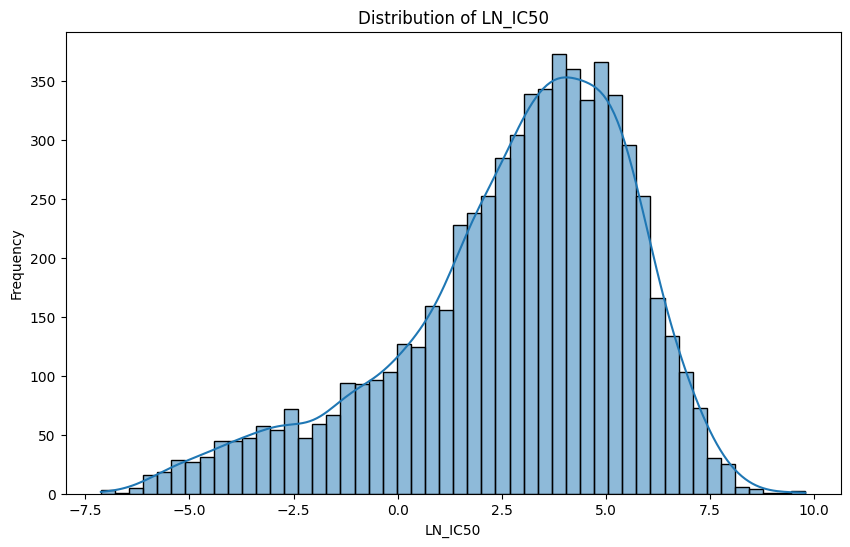

In [ ]:
# Distribution of the target variable (LN_IC50)
plt.figure(figsize=(10, 6))
sns.histplot(data['LN_IC50'], bins=50, kde=True)
plt.title('Distribution of LN_IC50')
plt.xlabel('LN_IC50')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Drop columns that contain string values
data = data.select_dtypes(exclude=['object'])

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['model_id'] = label_encoder.fit_transform(data['model_id'])
data['drug'] = label_encoder.fit_transform(data['drug'])

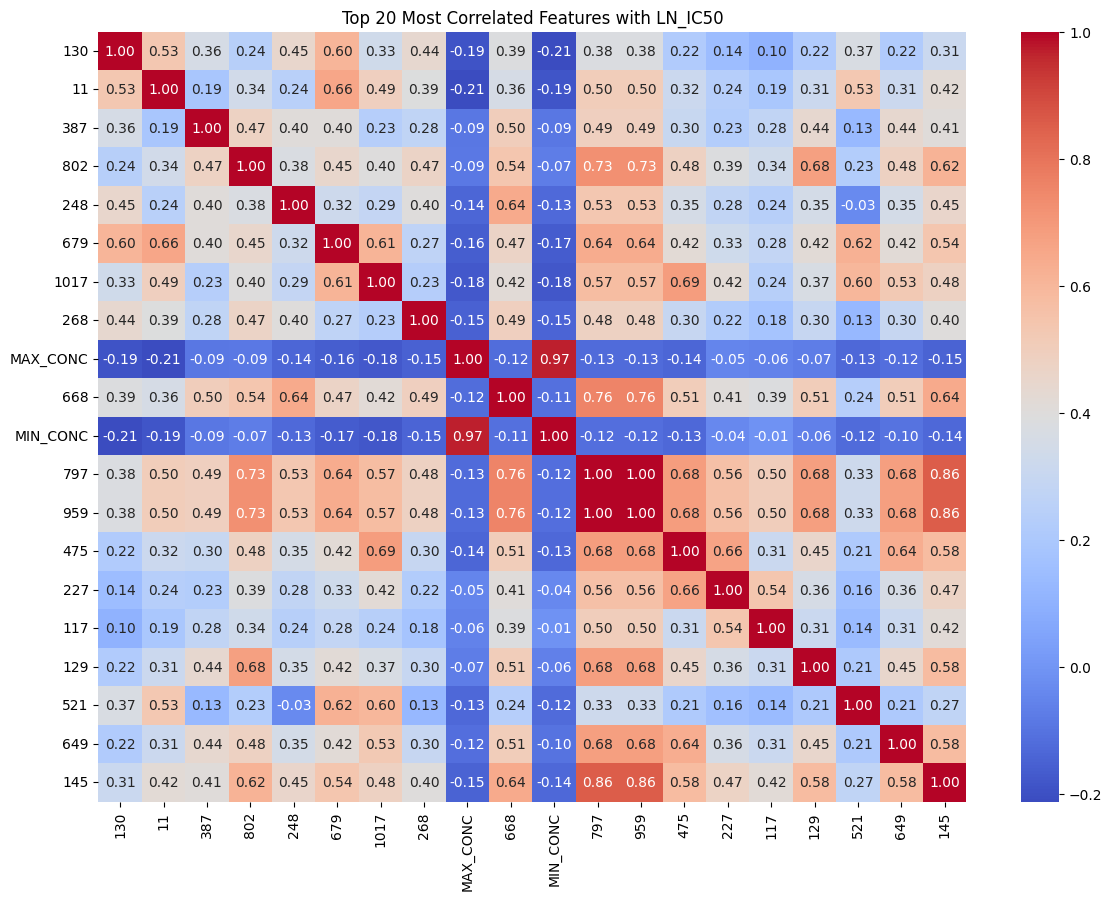

In [ ]:
# Correlation heatmap of top 20 most correlated features with LN_IC50
correlation_matrix = data.corr()
top_corr_features = correlation_matrix['LN_IC50'].abs().sort_values(ascending=False).index[1:21]
plt.figure(figsize=(14, 10))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 20 Most Correlated Features with LN_IC50')
plt.show()

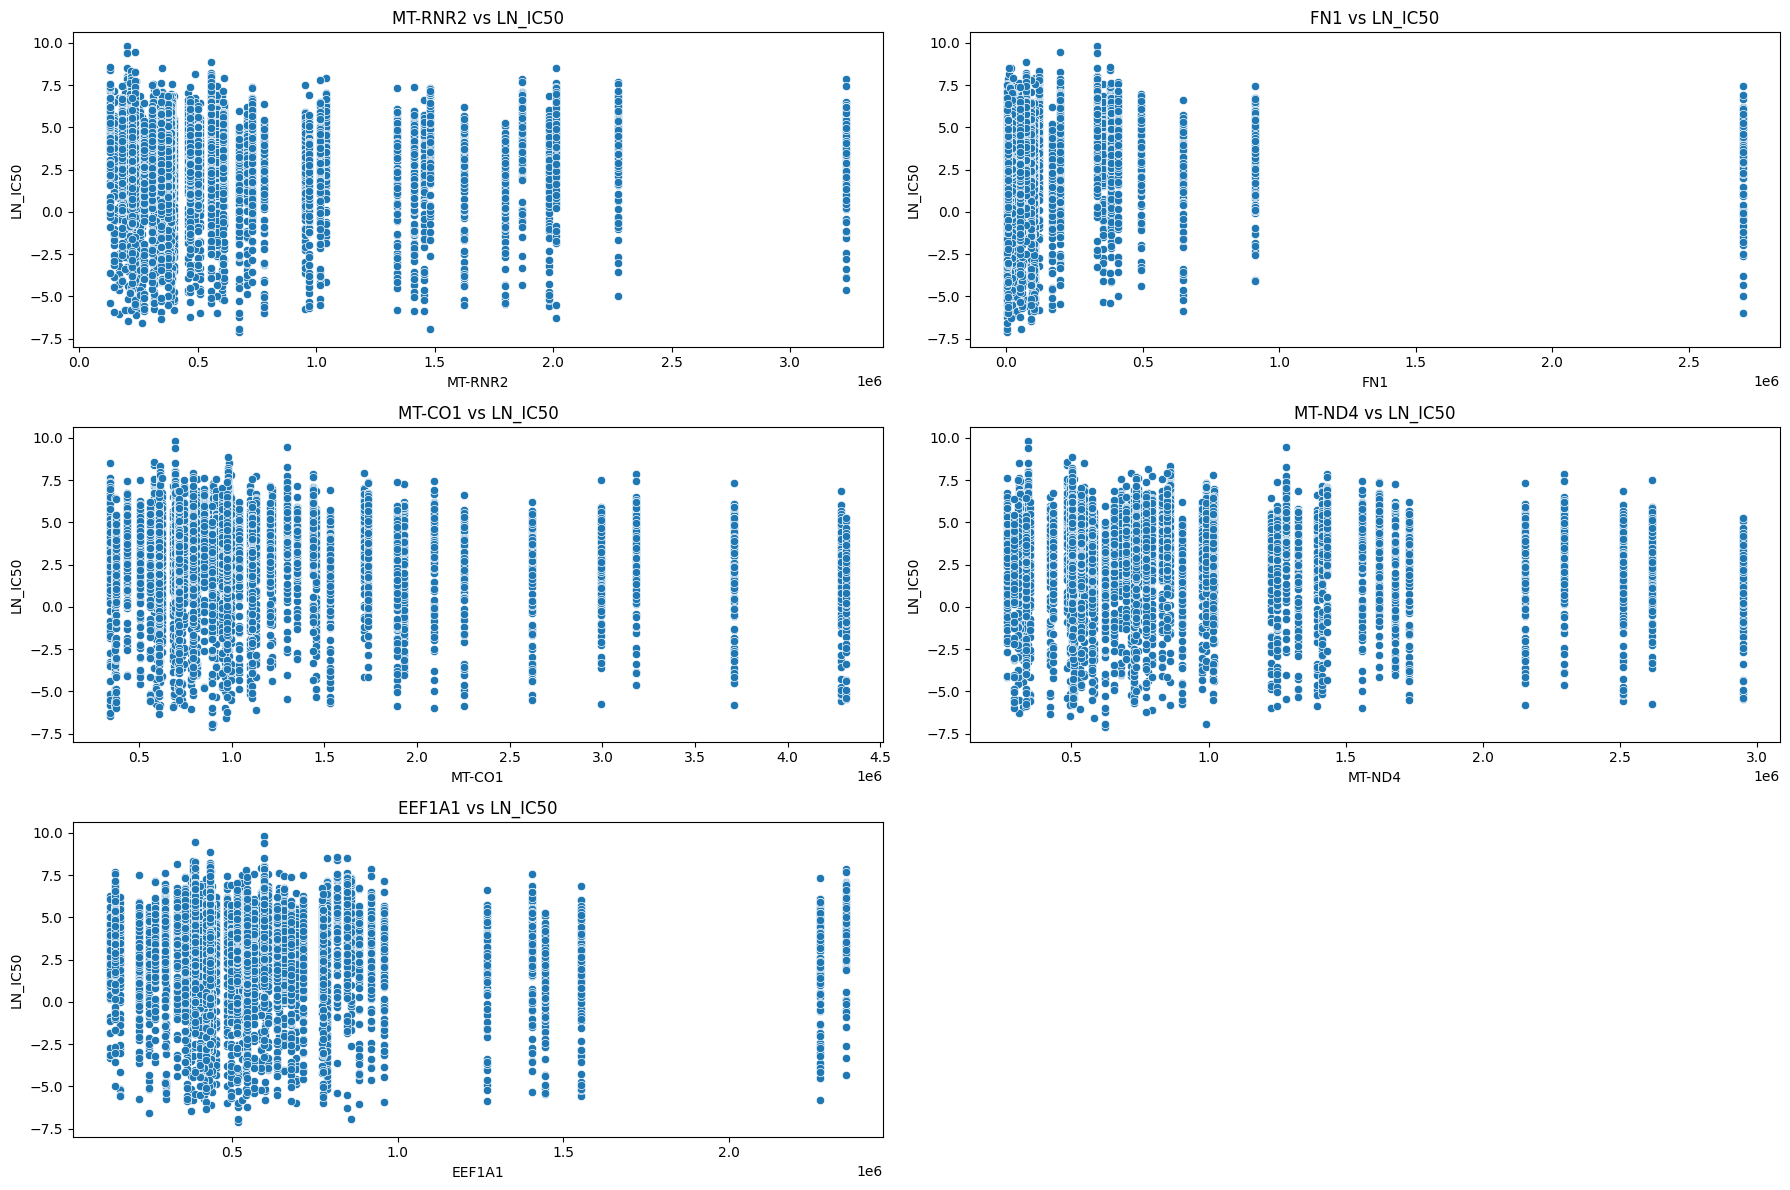

In [ ]:
# Visualizing the relationship between a few selected gene expressions and LN_IC50
selected_genes = ['MT-RNR2', 'FN1', 'MT-CO1', 'MT-ND4', 'EEF1A1']
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()
for i, gene in enumerate(selected_genes):
    sns.scatterplot(ax=axes[i], x=gene, y='LN_IC50', data=data)
    axes[i].set_title(f'{gene} vs LN_IC50')
axes[-1].axis('off')
plt.tight_layout()
plt.show()

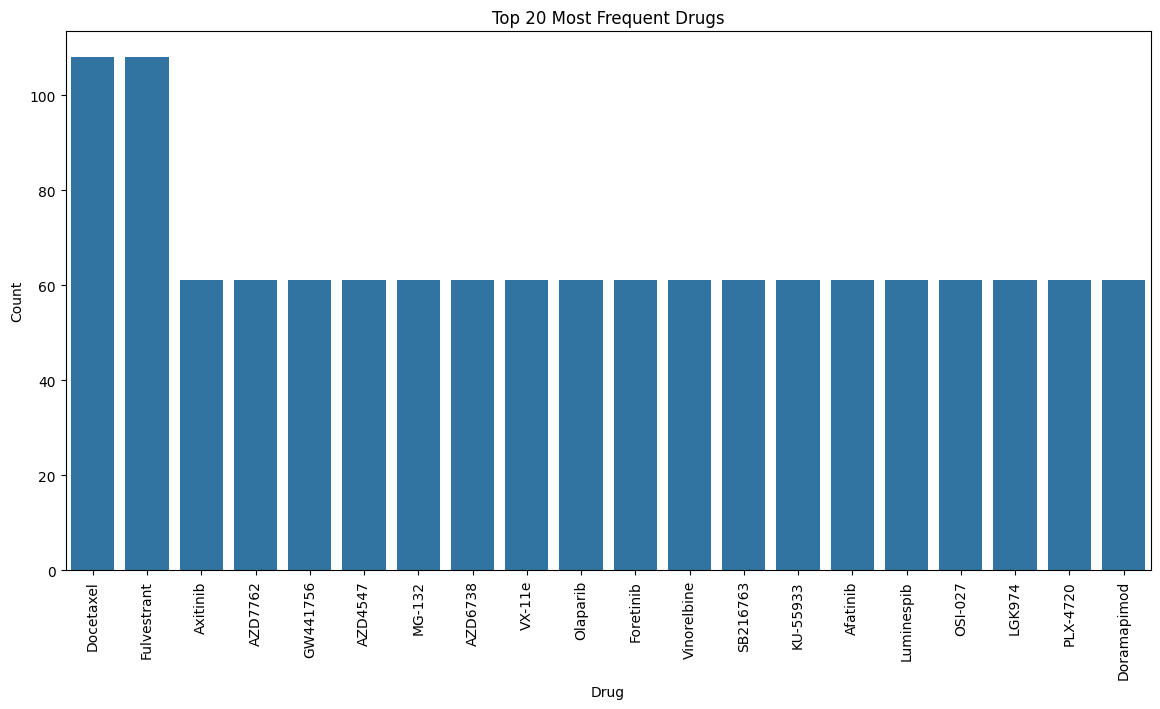

In [ ]:
# Load the dataset
file_path = '/content/sample_data/final_drug_modelid_minmaxconc_unique.csv'
data = pd.read_csv(file_path)

# Encode the 'model_id' column only
label_encoder = LabelEncoder()
data['model_id'] = label_encoder.fit_transform(data['model_id'])

# Plot the distribution of the top 20 most frequent drugs with their names
plt.figure(figsize=(14, 7))
top_20_drugs = data['drug'].value_counts().index[:20]
top_20_drug_counts = data['drug'].value_counts().values[:20]
sns.barplot(x=top_20_drugs, y=top_20_drug_counts)
plt.title('Top 20 Most Frequent Drugs')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

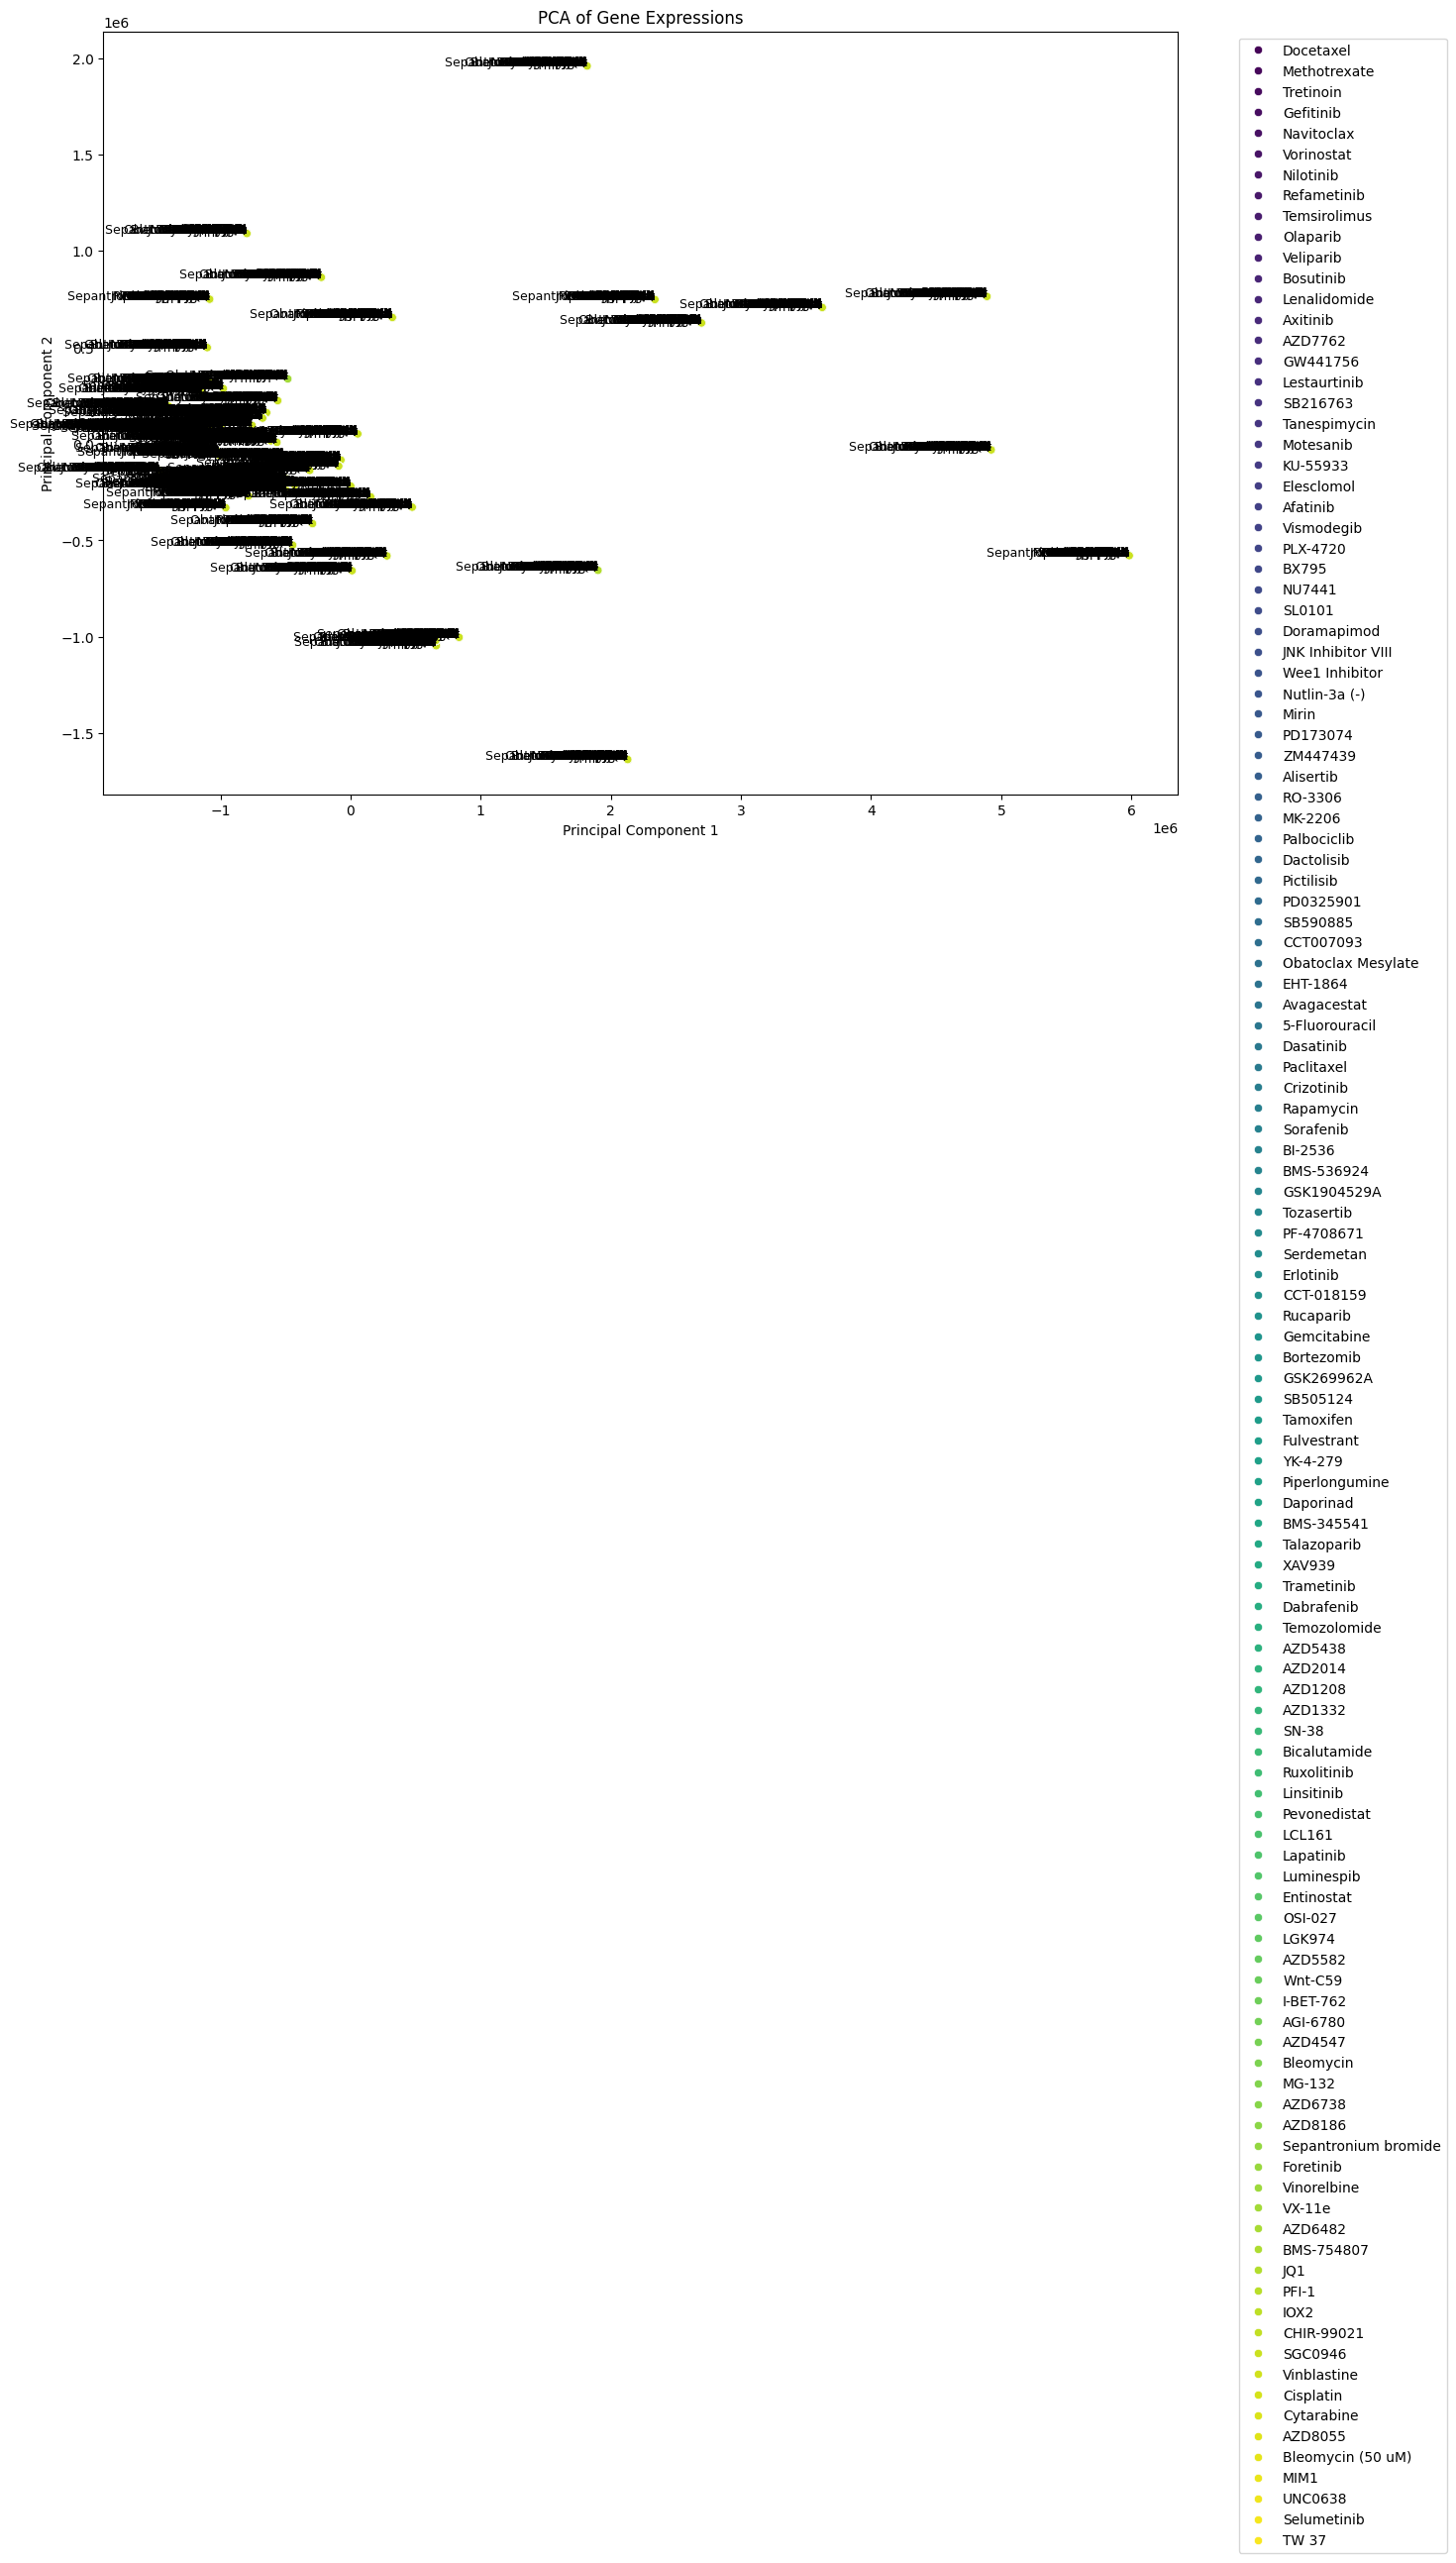

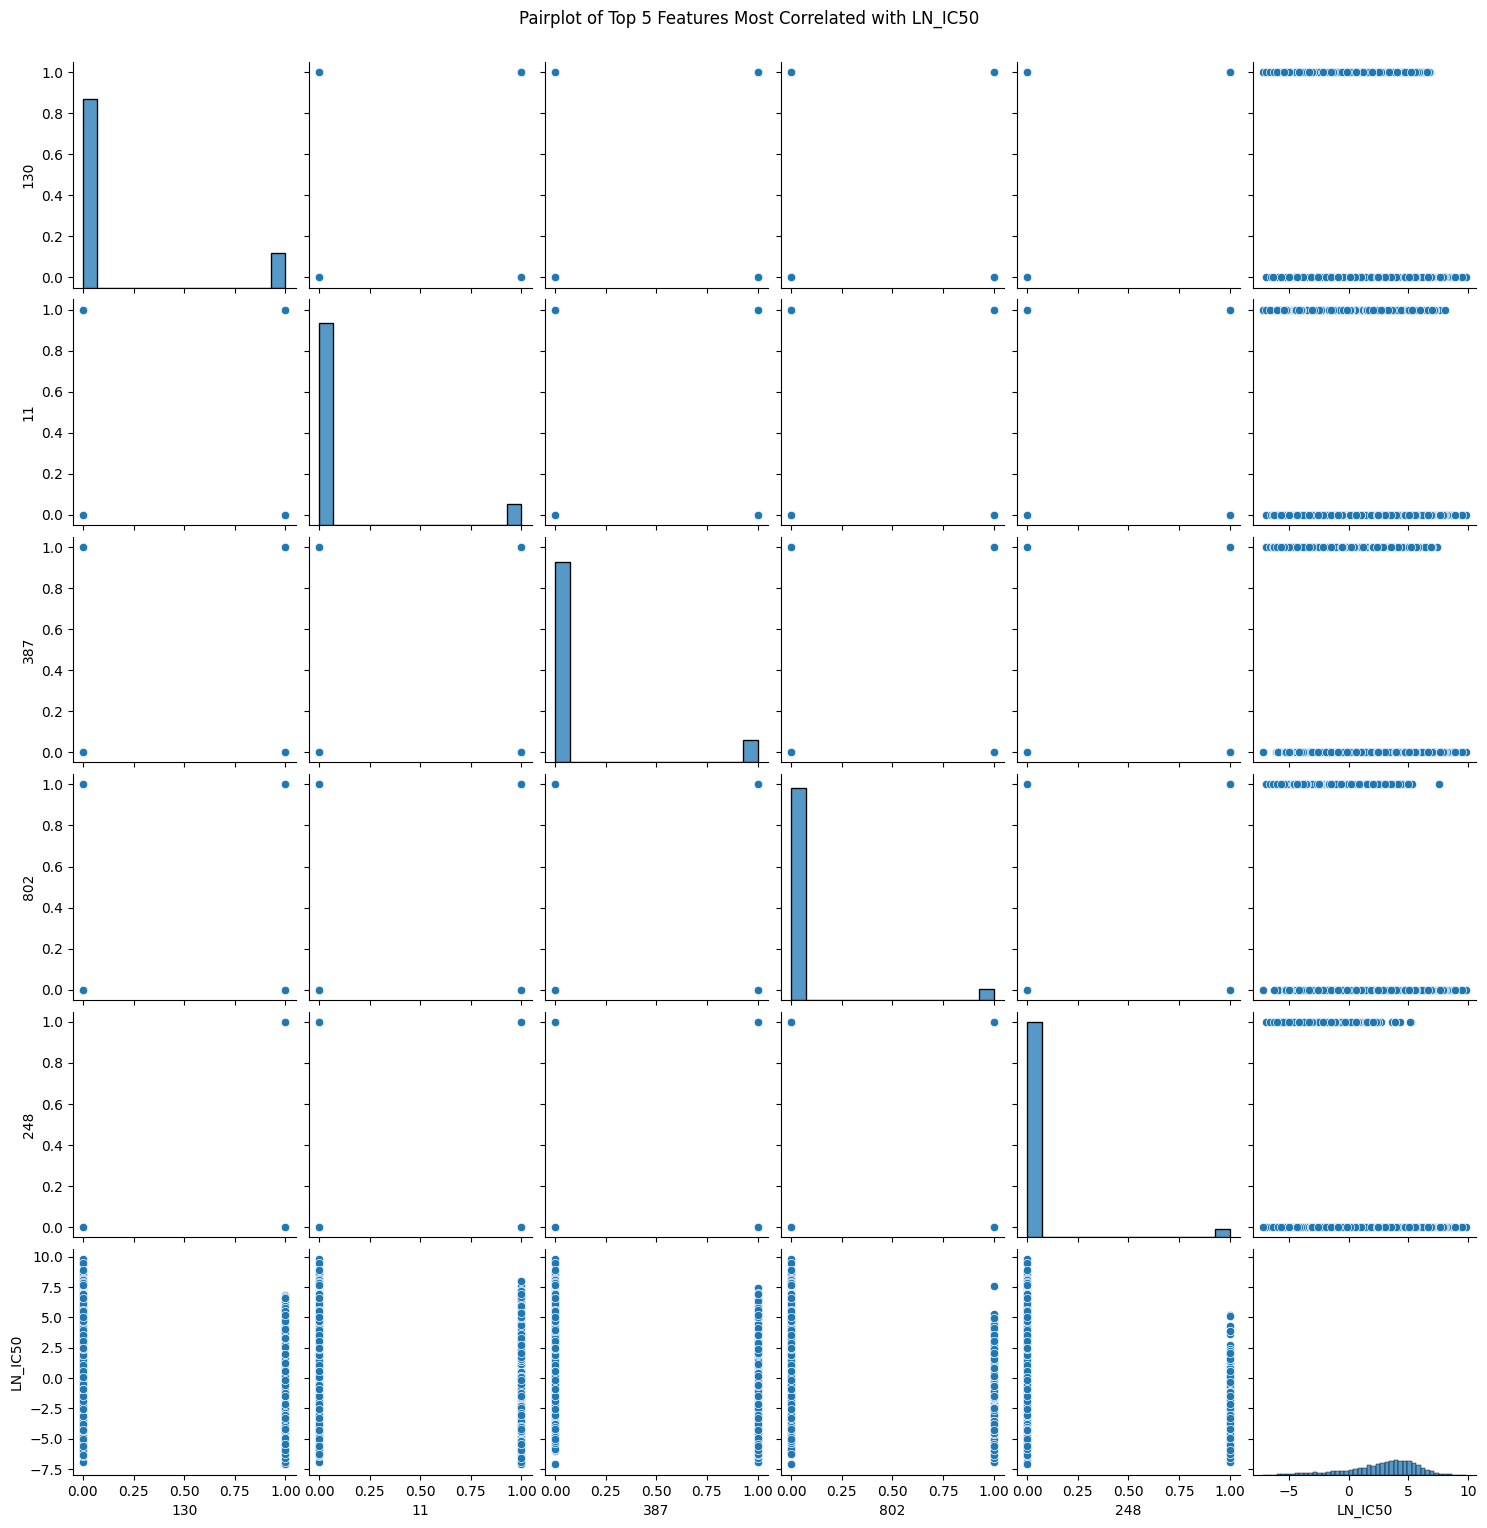

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/sample_data/final_drug_modelid_minmaxconc_unique.csv'
data = pd.read_csv(file_path)

# Encode the 'model_id' column only
label_encoder = LabelEncoder()
data['model_id'] = label_encoder.fit_transform(data['model_id'])

# Drop non-numeric columns for PCA
gene_data = data.drop(columns=['model_id', 'drug', 'MIN_CONC', 'MAX_CONC', 'LN_IC50'])

# Remove columns with all zeros
gene_data = gene_data.loc[:, (gene_data != 0).any(axis=0)]

# Ensure all columns are numeric
gene_data = gene_data.select_dtypes(include=[np.number])

# Handle missing values by filling with the mean of each column
gene_data = gene_data.fillna(gene_data.mean())

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gene_data)

# Create a DataFrame with PCA results and the drug names
pca_df = pd.DataFrame(data={'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'Drug': data['drug']})

# Create a scatter plot with annotations
plt.figure(figsize=(14, 10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Drug', palette='viridis', legend='full')

# Annotate each point with the drug name
for i in range(pca_df.shape[0]):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], str(pca_df['Drug'][i]), fontsize=9, ha='right')

plt.title('PCA of Gene Expressions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Pairplot of top 5 most correlated features with LN_IC50
top_5_corr_features = top_corr_features[:5].tolist() + ['LN_IC50']
sns.pairplot(data[top_5_corr_features])
plt.suptitle('Pairplot of Top 5 Features Most Correlated with LN_IC50', y=1.02)
plt.show()


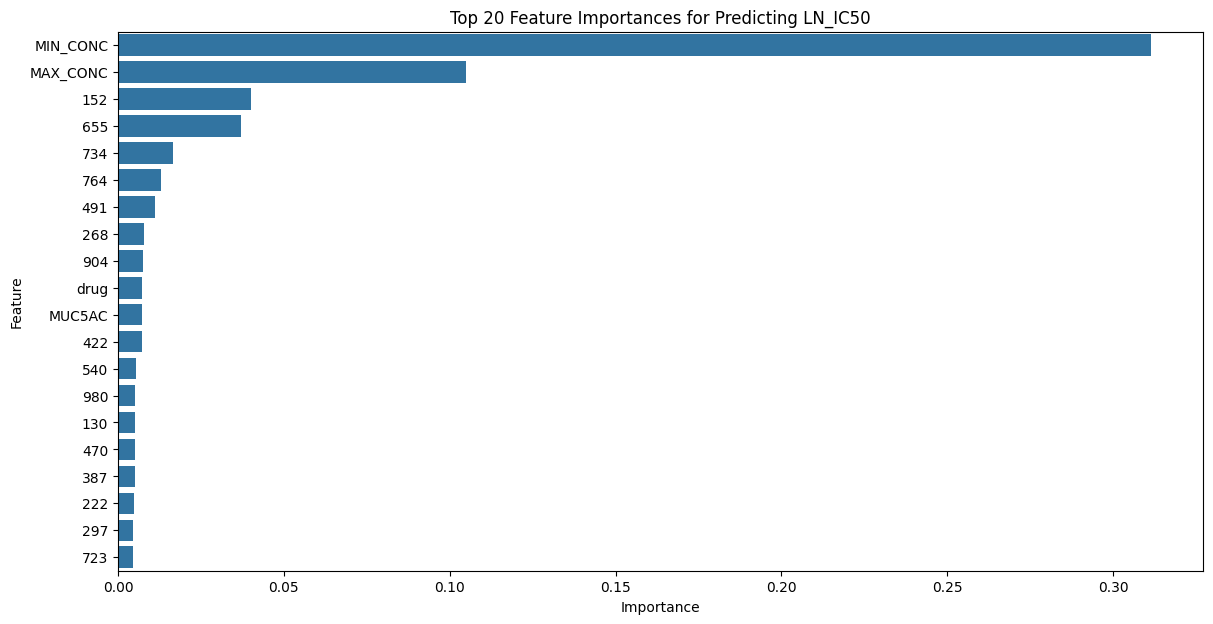

In [ ]:
#Feature Importance Using Random Forest
# We use a Random Forest model to determine the feature importance for predicting LN_IC50.

from sklearn.ensemble import RandomForestRegressor
importances = []

# Fit a Random Forest model
X = data_cleaned.drop(columns=['LN_IC50'])
y = data_cleaned['LN_IC50']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(14, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 20 Feature Importances for Predicting LN_IC50')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


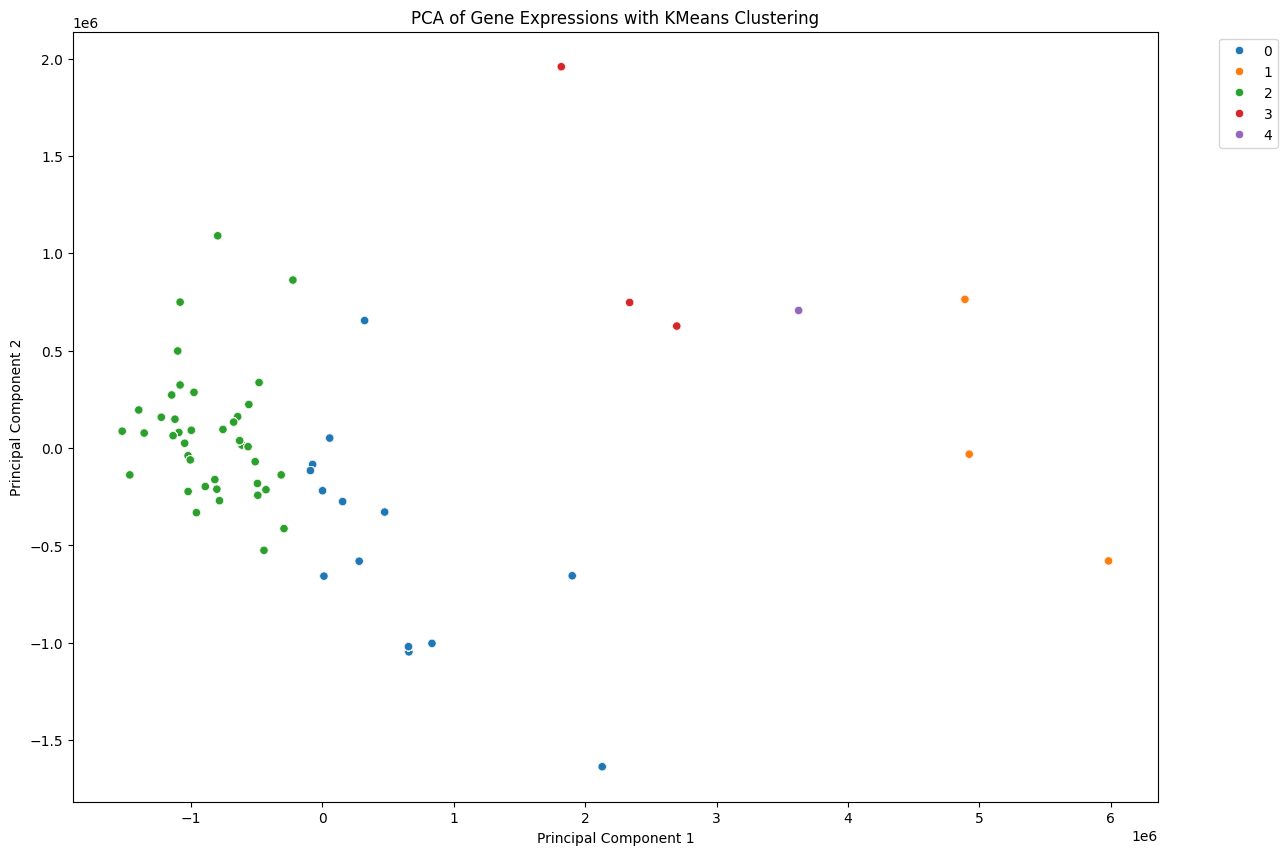

In [ ]:
#Clustering Analysis
#Perform clustering on the gene expression data to identify possible subgroups.

from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(gene_data)

# Add cluster information to the PCA DataFrame
pca_df['Cluster'] = clusters

# Plot the PCA with cluster information
plt.figure(figsize=(14, 10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', legend='full')
plt.title('PCA of Gene Expressions with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


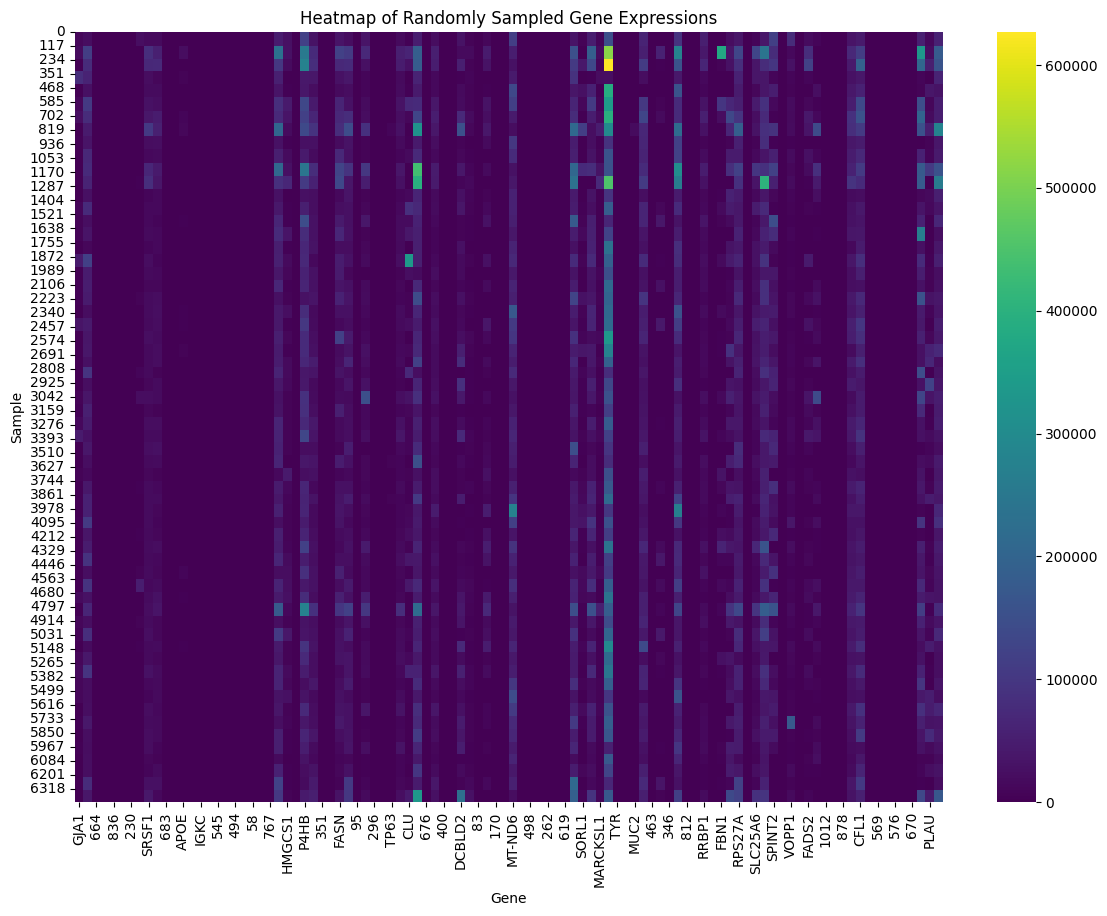

In [ ]:
#Heatmap of Gene Expression Data
#Visualize the heatmap of the gene expression data to identify patterns.

# Randomly sample 100 genes for better visualization
sampled_genes = gene_data.sample(n=100, axis=1)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(sampled_genes, cmap='viridis')
plt.title('Heatmap of Randomly Sampled Gene Expressions')
plt.xlabel('Gene')
plt.ylabel('Sample')
plt.show()


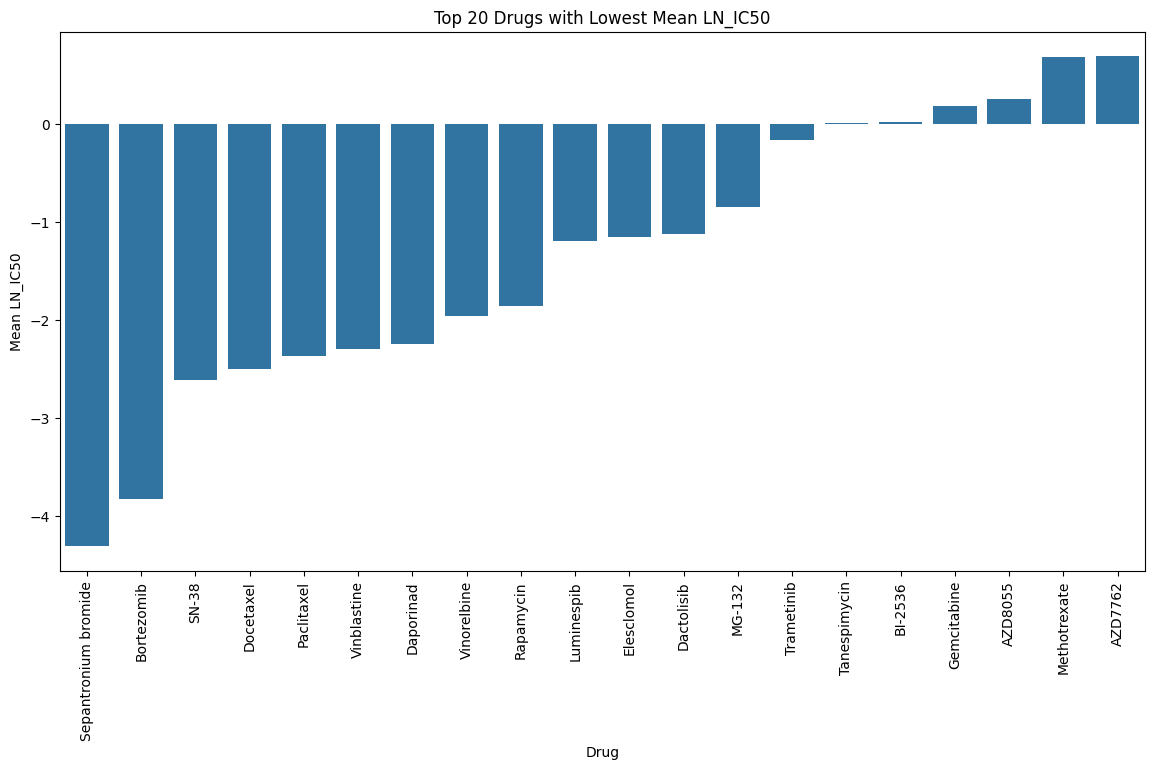

In [ ]:
#Drug Response Analysis
#Analyze how different drugs affect the LN_IC50.

# Calculate mean LN_IC50 for each drug
drug_response = data.groupby('drug')['LN_IC50'].mean().sort_values()

# Plot the drug response
plt.figure(figsize=(14, 7))
sns.barplot(x=drug_response.index[:20], y=drug_response.values[:20])
plt.title('Top 20 Drugs with Lowest Mean LN_IC50')
plt.xlabel('Drug')
plt.ylabel('Mean LN_IC50')
plt.xticks(rotation=90)
plt.show()


# Models

### Models Investigation (**Ariel**)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, SimpleRNN

# Load the dataset
file_path = '/content/sample_data/final_drug_modelid_minmaxconc_unique.csv'
data = pd.read_csv(file_path)

# Encode the 'model_id' and 'drug' columns
label_encoder = LabelEncoder()
data['model_id'] = label_encoder.fit_transform(data['model_id'])
data['drug'] = label_encoder.fit_transform(data['drug'])

# Drop columns that contain non-numeric values explicitly
data = data.select_dtypes(include=[np.number])

# Handle missing values
data = data.fillna(data.mean())

# Split data into features and target
X = data.drop(columns=['LN_IC50'])
y = data['LN_IC50']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### Random forest

In [ ]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
rf_predictions = rf_model.predict(X_test_scaled)
print(f'Random Forest - RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions))}, R2: {r2_score(y_test, rf_predictions)}')


Random Forest - RMSE: 1.230698429756732, R2: 0.8211764578774381


##### Multi-linear regression

In [ ]:
# Train a Multi Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
mlr_predictions = mlr_model.predict(X_test_scaled)
print(f'Multi Linear Regression - RMSE: {np.sqrt(mean_squared_error(y_test, mlr_predictions))}, R2: {r2_score(y_test, mlr_predictions)}')


Multi Linear Regression - RMSE: 1.2484373866852618, R2: 0.8159842771708146


##### Multi-Layer Perceptron

In [ ]:
# Train a Multi-Layer Perceptron model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
mlp_predictions = mlp_model.predict(X_test_scaled)
print(f'Multi-Layer Perceptron - RMSE: {np.sqrt(mean_squared_error(y_test, mlp_predictions))}, R2: {r2_score(y_test, mlp_predictions)}')


Multi-Layer Perceptron - RMSE: 1.365627900018081, R2: 0.7798157947540725


##### Neural network

In [ ]:
# Build a basic Neural Network model
nn_model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(50, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Neural Network model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions and evaluate the model
nn_predictions = nn_model.predict(X_test_scaled).flatten()
print(f'Neural Network - RMSE: {np.sqrt(mean_squared_error(y_test, nn_predictions))}, R2: {r2_score(y_test, nn_predictions)}')


Epoch 1/50
129/129 [==============================] - 3s 5ms/step - loss: 3.6474 - val_loss: 2.1181
Epoch 2/50
129/129 [==============================] - 0s 4ms/step - loss: 1.8080 - val_loss: 2.9009
Epoch 3/50
129/129 [==============================] - 0s 4ms/step - loss: 1.4666 - val_loss: 2.0778
Epoch 4/50
129/129 [==============================] - 0s 3ms/step - loss: 1.0909 - val_loss: 2.1968
Epoch 5/50
129/129 [==============================] - 0s 4ms/step - loss: 0.9157 - val_loss: 1.8382
Epoch 6/50
129/129 [==============================] - 0s 3ms/step - loss: 0.8090 - val_loss: 1.8570
Epoch 7/50
129/129 [==============================] - 1s 5ms/step - loss: 0.6621 - val_loss: 1.9779
Epoch 8/50
129/129 [==============================] - 1s 5ms/step - loss: 0.6617 - val_loss: 1.8887
Epoch 9/50
129/129 [==============================] - 1s 5ms/step - loss: 0.5936 - val_loss: 1.8608
Epoch 10/50
129/129 [==============================] - 1s 5ms/step - loss: 0.4944 - val_loss: 1.8766

##### Convolution neural network

In [ ]:
# Reshape data for CNN
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build a CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions and evaluate the model
cnn_predictions = cnn_model.predict(X_test_cnn).flatten()
print(f'CNN - RMSE: {np.sqrt(mean_squared_error(y_test, cnn_predictions))}, R2: {r2_score(y_test, cnn_predictions)}')


Epoch 1/50
129/129 [==============================] - 4s 9ms/step - loss: 18.1596 - val_loss: 15.2107
Epoch 2/50
129/129 [==============================] - 1s 6ms/step - loss: 15.2486 - val_loss: 14.6305
Epoch 3/50
129/129 [==============================] - 1s 6ms/step - loss: 14.6283 - val_loss: 14.0757
Epoch 4/50
129/129 [==============================] - 1s 7ms/step - loss: 14.0352 - val_loss: 13.5494
Epoch 5/50
129/129 [==============================] - 1s 6ms/step - loss: 13.4771 - val_loss: 13.0527
Epoch 6/50
129/129 [==============================] - 1s 6ms/step - loss: 12.9547 - val_loss: 12.6005
Epoch 7/50
129/129 [==============================] - 1s 7ms/step - loss: 12.4670 - val_loss: 12.1734
Epoch 8/50
129/129 [==============================] - 1s 6ms/step - loss: 12.0121 - val_loss: 11.7834
Epoch 9/50
129/129 [==============================] - 1s 6ms/step - loss: 11.5909 - val_loss: 11.4204
Epoch 10/50
129/129 [==============================] - 1s 7ms/step - loss: 11.1997

In [ ]:
# Train the CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training and validation loss for CNN
plt.figure()
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()
plt.show()

#### Deep Neural Network

The task is to predict IC50 values for drug responses using gene expression data. The part is designed of a neural network model that processes gene expression data through an encoder and then uses a fully connected predictor to output the IC50 values.

##### Model Architecture

The model is designed based on the provided diagrams, which include an encoder for gene expression data and a fully connected predictor.

Gene Expression Encoder:

Input Layer: The input layer accepts the gene expression data with a shape equal to the number of features in the training set.

Hidden Layers:
The first hidden layer has 512 neurons with ReLU activation. ReLU (Rectified Linear Unit) is a commonly used activation function that helps in mitigating the vanishing gradient problem.

A Dropout layer with a rate of 0.3 is added to prevent overfitting by randomly setting 30% of the input units to 0 during training.

The second hidden layer has 256 neurons with ReLU activation, followed by another Dropout layer with a 0.3 rate.

The third hidden layer has 128 neurons with ReLU activation. This layer represents the encoded gene expression features.
Fully Connected Predictor:

Concatenation: The encoded features from the gene expression encoder are concatenated (although in this implementation, it only includes the gene expression features).

Dense Layers:
The first dense layer in the predictor has 128 neurons with ReLU activation, followed by a Dropout layer with a 0.3 rate.
The second dense layer also has 128 neurons with ReLU activation, followed by another Dropout layer with a 0.3 rate.

Output Layer: The output layer has a single neuron with no activation function to predict the IC50 value. Since this is a regression task, no activation function is applied here.



##### Model Training and Evaluation

Model Compilation:

The model is compiled using the Adam optimizer, which is an adaptive learning rate optimization algorithm that's widely used in deep learning.

The loss function is mean squared error (MSE), appropriate for regression tasks where the goal is to minimize the squared differences between predicted and actual values.

Mean absolute error (MAE) is used as an additional metric to evaluate the performance of the model.

Training:

The model is trained for 100 epochs with a batch size of 32. An epoch is one complete pass through the training dataset.
20% of the training data is used for validation during training to monitor the model's performance on unseen data and prevent overfitting.

Evaluation:

After training, the model's performance is evaluated on the test set using MAE. The test set helps in assessing how well the model generalizes to new, unseen data.

Summary

This implementation effectively combines biological knowledge (gene expression data) with deep learning techniques to predict IC50 values for drug responses. The model architecture ensure that it is both biologically relevant and computationally efficient. By focusing on normalization, dropout for regularization, and a robust neural network design, the model aims to achieve high performance in predicting drug responses.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.utils import plot_model



# Define the gene expression encoder
gene_expression_input = Input(shape=(X_train.shape[1],), name='gene_expression_input')
x = Dense(512, activation='relu')(gene_expression_input)
x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
gene_expression_encoded = Dense(128, activation='relu', name='gene_expression_encoded')(x)

# Combine encoded features
combined = concatenate([gene_expression_encoded])

# Fully connected predictor
y = Dense(128, activation='relu')(combined)
y = Dropout(0.1)(y)
y = Dense(128, activation='relu')(y)
y = Dropout(0.1)(y)
output = Dense(1, name='output')(y)

# Define the model
model = Model(inputs=[gene_expression_input], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

#  Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test MAE: {test_mae:.4f}')


Epoch 1/100
129/129 [==============================] - 9s 46ms/step - loss: 95307072.0000 - mean_absolute_error: 5004.2939 - val_loss: 499616.6875 - val_mean_absolute_error: 453.5671
Epoch 2/100
129/129 [==============================] - 4s 30ms/step - loss: 2551651.5000 - mean_absolute_error: 1028.8053 - val_loss: 34144.7148 - val_mean_absolute_error: 124.2060
Epoch 3/100
129/129 [==============================] - 3s 25ms/step - loss: 830735.1250 - mean_absolute_error: 570.6720 - val_loss: 12213.8887 - val_mean_absolute_error: 50.0363
Epoch 4/100
129/129 [==============================] - 4s 33ms/step - loss: 331642.0938 - mean_absolute_error: 303.2201 - val_loss: 659.2042 - val_mean_absolute_error: 7.7844
Epoch 5/100
129/129 [==============================] - 4s 29ms/step - loss: 160109.0781 - mean_absolute_error: 166.2577 - val_loss: 477.7587 - val_mean_absolute_error: 7.4337
Epoch 6/100
129/129 [==============================] - 3s 20ms/step - loss: 86177.7422 - mean_absolute_error

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse:.4f}')

41/41 [==============================] - 0s 5ms/step
Test MSE: 8.4994


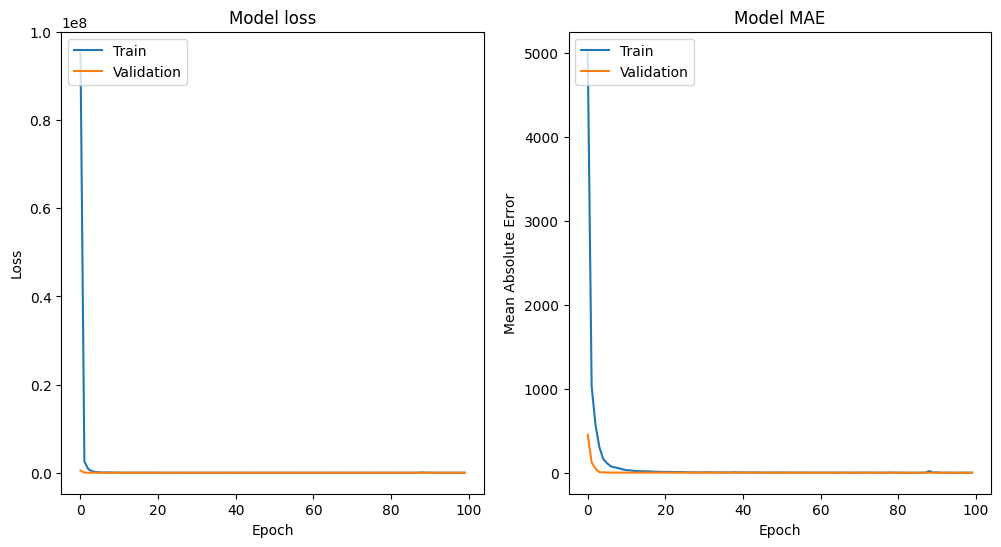

In [ ]:
#Plotting loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Multi layer perceptron

In [ ]:
pip install rdkit keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 22.3 MB/s eta 0:00:00


### Model Architecture (**David**)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from keras.src.layers import Flatten, Conv1D, MaxPooling1D
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from keras.optimizers import Adam
from keras_tuner import GridSearch, BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import Hyperband

# Function to downcast data types to save memory
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype == 'int64']
    df[float_cols] = df[float_cols].astype('float32')
    df[int_cols] = df[int_cols].astype('int32')
    return df

# Load RNAseq data and calculate variances
chunk_size = 10000
rna_seq_variances = pd.Series(dtype='float32')
chunk_count = 0

for chunk in pd.read_csv('transposed_filtered_rnaseq_read_count_all.csv', chunksize=chunk_size):
    chunk = downcast_dtypes(chunk)
    chunk_count += 1
    chunk_data = chunk.drop(columns=['model_id'])
    chunk_variances = chunk_data.var(axis=0)
    rna_seq_variances = rna_seq_variances.add(chunk_variances, fill_value=0)

rna_seq_variances /= chunk_count

top_n = 1000
top_genes = rna_seq_variances.nlargest(top_n).index
top_genes_df = pd.DataFrame(top_genes, columns=['gene'])
top_genes_df.to_csv('top_genes.csv', index=False)

top_genes = pd.read_csv('top_genes.csv')
top_genes_list = top_genes['gene'].tolist()

reduced_rna_seq_df = pd.DataFrame()

for chunk in pd.read_csv('transposed_filtered_rnaseq_read_count_all.csv', chunksize=chunk_size):
    chunk = downcast_dtypes(chunk)
    reduced_chunk = chunk[['model_id'] + top_genes_list]
    reduced_rna_seq_df = pd.concat([reduced_rna_seq_df, reduced_chunk], ignore_index=True)

reduced_rna_seq_df.to_csv('reduced_rnaseq_read_count_all.csv', index=False)

# Load drug response data
drug_response_df = pd.read_csv('merged_drug_response_with_smiles_no_na.csv')

# Example SMILES encoding using Morgan fingerprints (you can adjust as needed)
def smiles_to_morgan_fingerprint(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        return np.array(fingerprint)
    except Exception as e:
        print(f"Error processing SMILES: {smiles}, Error: {e}")
        return None

# Apply SMILES encoding to 'smile' column
drug_response_df['Morgan_Fingerprint'] = drug_response_df['smile'].apply(smiles_to_morgan_fingerprint)

# Ensure all fingerprints are valid and not None
drug_response_df = drug_response_df.dropna(subset=['Morgan_Fingerprint'])

# Stack the numpy arrays into a 2D array for scaling
fingerprint_matrix = np.stack(drug_response_df['Morgan_Fingerprint'].values)

# Optionally, you can apply StandardScaler to the fingerprint data if needed
scaler = StandardScaler()
fingerprint_matrix_scaled = scaler.fit_transform(fingerprint_matrix)

# Add scaled fingerprints back to the DataFrame as separate columns
fingerprint_columns = [f'fingerprint_{i}' for i in range(fingerprint_matrix_scaled.shape[1])]
fingerprint_df = pd.DataFrame(fingerprint_matrix_scaled, columns=fingerprint_columns)
drug_response_df = pd.concat([drug_response_df.reset_index(drop=True), fingerprint_df.reset_index(drop=True)], axis=1)

# Drop the original unscaled fingerprint column
drug_response_df.drop(columns=['Morgan_Fingerprint'], inplace=True)

# Perform one-hot encoding (dummy encoding) for categorical variables if needed
# Here we assume that smile column was categorical before being used for fingerprints and you may want to keep it
drug_response_df_encoded = pd.get_dummies(drug_response_df, columns=['smile'], drop_first=True)

# Print the dataframe to check results
print(drug_response_df.head())

# Save the dataframe if needed
drug_response_df.to_csv('encoded_drug_response.csv', index=False)

# Prepare merged dataset with RNAseq and drug response data
merged_df = pd.merge(drug_response_df, reduced_rna_seq_df, left_on='SANGER_MODEL_ID', right_on='model_id')

X = merged_df.drop(columns=['SANGER_MODEL_ID', 'DRUG_NAME', 'LN_IC50', 'model_id','smile'])
y = merged_df['LN_IC50']
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Streaming output truncated to the last 5000 lines.
[14:08:30] SMILES Parse Error: syntax error while parsing: Not
[14:08:30] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[14:08:30] SMILES Parse Error: syntax error while parsing: Not
[14:08:30] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[14:08:30] SMILES Parse Error: syntax error while parsing: Not
[14:08:30] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[14:08:30] SMILES Parse Error: syntax error while parsing: Not
[14:08:30] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[14:08:30] SMILES Parse Error: syntax error while parsing: Not
[14:08:30] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[14:08:30] SMILES Parse Error: syntax error while parsing: Not
[14:08:30] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[14:08:30] SMILES Parse Error: syntax error while parsing: Not
[14:08:30] SMILES Parse Error: Failed parsing SMILES

  SANGER_MODEL_ID  DRUG_NAME  MIN_CONC  MAX_CONC   LN_IC50  \
0       SIDM00746  Erlotinib  0.007813       2.0 -3.130315   
1       SIDM00745  Erlotinib  0.007813       2.0  3.661843   
2       SIDM00769  Erlotinib  0.007813       2.0  2.322838   
3       SIDM00921  Erlotinib  0.007813       2.0  3.009075   
4       SIDM00645  Erlotinib  0.007813       2.0  0.954770   

                                               smile  fingerprint_0  \
0  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   
1  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   
2  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   
3  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   
4  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   

   fingerprint_1  fingerprint_2  fingerprint_3  ...  fingerprint_2038  \
0      -0.540873      -0.210403      -0.099375  ...         -0.155837   
1      -0.540873      -0.210403      -0.099375  ...   

In [ ]:


### Random Forest Regressor ###
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R² Score: {r2_rf}')

joblib.dump(rf_model, 'rf_model.joblib')

### Multiple Linear Regression (MLR) ###
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_mlr = mlr_model.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)
print(f'Multiple Linear Regression Mean Squared Error: {mse_mlr}')
print(f'Multiple Linear Regression R² Score: {r2_mlr}')


Streaming output truncated to the last 5000 lines.
[03:10:05] SMILES Parse Error: syntax error while parsing: Not
[03:10:05] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[03:10:05] SMILES Parse Error: syntax error while parsing: Not
[03:10:05] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[03:10:05] SMILES Parse Error: syntax error while parsing: Not
[03:10:05] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[03:10:05] SMILES Parse Error: syntax error while parsing: Not
[03:10:05] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[03:10:05] SMILES Parse Error: syntax error while parsing: Not
[03:10:05] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[03:10:05] SMILES Parse Error: syntax error while parsing: Not
[03:10:05] SMILES Parse Error: Failed parsing SMILES 'Not' for input: 'Not'
[03:10:05] SMILES Parse Error: syntax error while parsing: Not
[03:10:05] SMILES Parse Error: Failed parsing SMILES

  SANGER_MODEL_ID  DRUG_NAME  MIN_CONC  MAX_CONC   LN_IC50  \
0       SIDM00746  Erlotinib  0.007813       2.0 -3.130315   
1       SIDM00745  Erlotinib  0.007813       2.0  3.661843   
2       SIDM00769  Erlotinib  0.007813       2.0  2.322838   
3       SIDM00921  Erlotinib  0.007813       2.0  3.009075   
4       SIDM00645  Erlotinib  0.007813       2.0  0.954770   

                                               smile  fingerprint_0  \
0  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   
1  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   
2  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   
3  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   
4  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...      -0.057824   

   fingerprint_1  fingerprint_2  fingerprint_3  ...  fingerprint_2038  \
0      -0.540873      -0.210403      -0.099375  ...         -0.155837   
1      -0.540873      -0.210403      -0.099375  ...   

Mulilayer Perceptron

In [ ]:
import tensorflow as tf
import random
import numpy as np
# Set seeds for reproducibility
random.seed(7)
np.random.seed(7)
tf.random.set_seed(7)

Trial 10 Complete [00h 01m 40s]
val_loss: 1.2886239290237427

Best val_loss So Far: 1.2886239290237427
Total elapsed time: 00h 21m 14s
Epoch 1/50
361/361 [==============================] - 5s 8ms/step - loss: 3.4288 - val_loss: 1.8906
Epoch 2/50
361/361 [==============================] - 2s 7ms/step - loss: 2.0445 - val_loss: 1.7731
Epoch 3/50
361/361 [==============================] - 2s 5ms/step - loss: 1.7093 - val_loss: 1.6486
Epoch 4/50
361/361 [==============================] - 2s 4ms/step - loss: 1.5327 - val_loss: 1.4356
Epoch 5/50
361/361 [==============================] - 2s 5ms/step - loss: 1.4120 - val_loss: 1.5210
Epoch 6/50
361/361 [==============================] - 2s 4ms/step - loss: 1.3078 - val_loss: 1.4673
Epoch 7/50
361/361 [==============================] - 2s 4ms/step - loss: 1.2449 - val_loss: 1.5376
Epoch 8/50
361/361 [==============================] - 2s 5ms/step - loss: 1.1856 - val_loss: 1.5225
Epoch 9/50
361/361 [==============================] - 2s 5ms/step

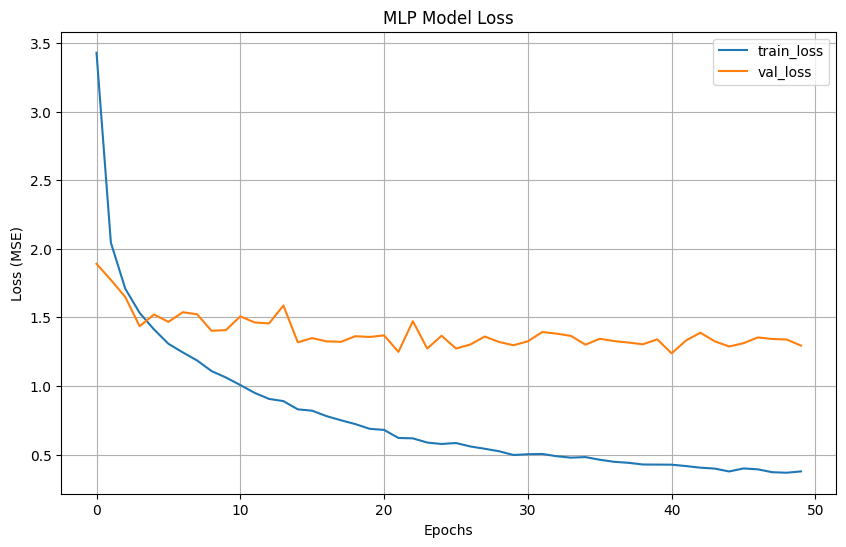

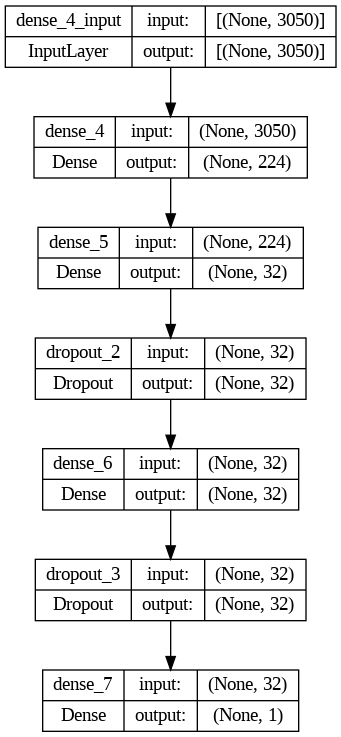

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def build_mlp_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32),
                    activation='relu',
                    kernel_initializer=hp.Choice('kernel_initializer_input', values=['glorot_uniform', 'he_normal']),
                    input_shape=(X_train.shape[1],)))

    # Number of hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=5)
    for i in range(num_layers):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                        activation='relu',
                        kernel_initializer=hp.Choice(f'kernel_initializer_{i}', values=['glorot_uniform', 'he_normal'])))
        model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    # Learning rate for Adam optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='mean_squared_error')

    return model
#
# tuner = GridSearch(
#     build_mlp_model,
#     objective='val_loss',
#     max_trials=50,
#     overwrite=True,
#     directory='keras_tuner_logs',
#     project_name='mlp_hyperparameter_tuning'
# )
tuner = BayesianOptimization(
    build_mlp_model,
    objective='val_loss',
    max_trials=10,
    directory='my_dir',
    overwrite=True,
    project_name='intro_to_kt'
)

tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hp)

history = best_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)

# Predict and evaluate the optimized MLP model
y_pred_best_mlp = best_model.predict(X_test_scaled)


mse_best_mlp = mean_squared_error(y_test, y_pred_best_mlp)
r2_best_mlp = r2_score(y_test, y_pred_best_mlp)
mae_best_mlp = mean_absolute_error(y_test, y_pred_best_mlp)
print(f'Optimized MLP Mean Squared Error: {mse_best_mlp}')
print(f'Optimized MLP R² Score: {r2_best_mlp}')
print(f'Optimized MLP Mean Absolute Error: ',{mae_best_mlp})


# Optionally, plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

from keras.utils import plot_model
# Plot the architecture of the best CNN model
plot_model(best_model, to_file='best_model_architecture.png', show_shapes=True)
# Note: Save the best model and scaler if needed
# best_model.save('best_mlp_model_tf')
# joblib.dump(scaler, 'scaler.joblib')


 # Convolutional Neural Network
 The hyperparameter optimization of the CNN involved systematically tuning filters, kernel sizes, initializers, dense units, dropout rates, and learning rates, resulting in a model with a Mean Squared Error of 1.1598 and an R² score of 0.8316, demonstrating strong predictive capability for drug sensitivity.

In [ ]:
import pandas as pd
import numpy as np
from keras.src.layers import Flatten, Conv1D, MaxPooling1D
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from keras.optimizers import Adam
from keras_tuner import GridSearch, BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import Hyperband
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers.legacy import Adam
from kerastuner.tuners import BayesianOptimization
import numpy as np

import numpy as np
import random

def build_large_cnn(hp):
    model = Sequential()

    # First Convolutional Block
    model.add(Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=16),
                     kernel_size=hp.Int('conv1_kernel', min_value=3, max_value=7, step=2),
                     activation='relu',
                     kernel_initializer=hp.Choice('conv1_init', values=['he_normal', 'glorot_uniform']),
                     input_shape=(X_train_scaled.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    # Second Convolutional Block
    model.add(Conv1D(filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=32),
                     kernel_size=hp.Int('conv2_kernel', min_value=3, max_value=7, step=2),
                     activation='relu',
                     kernel_initializer=hp.Choice('conv2_init', values=['he_normal', 'glorot_uniform'])))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    # Third Convolutional Block
    model.add(Conv1D(filters=hp.Int('conv3_filters', min_value=128, max_value=512, step=64),
                     kernel_size=hp.Int('conv3_kernel', min_value=3, max_value=7, step=2),
                     activation='relu',
                     kernel_initializer=hp.Choice('conv3_init', values=['he_normal', 'glorot_uniform'])))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))



    model.add(Flatten())

    # First Dense Block
    model.add(Dense(units=hp.Int('dense1_units', min_value=64, max_value=512, step=32),
                    activation='relu',
                    kernel_initializer=hp.Choice('dense1_init', values=['he_normal', 'glorot_uniform'])))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout1_rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Second Dense Block
    model.add(Dense(units=hp.Int('dense2_units', min_value=64, max_value=512, step=32),
                    activation='relu',
                    kernel_initializer=hp.Choice('dense2_init', values=['he_normal', 'glorot_uniform'])))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout2_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')

    return model

# Setup Keras Tuner BayesianOptimization
tuner = BayesianOptimization(
    build_large_cnn,
    objective='val_loss',
    max_trials=10,  # Adjust as needed
    directory='tuner_dir',
    project_name='large_cnn_bayesian_opt'
)

# Perform hyperparameter search
tuner.search(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1),
             y_train,
             epochs=50,
             validation_split=0.2,
             verbose=1)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best CNN model with the optimal hyperparameters
best_cnn_model = tuner.hypermodel.build(best_hp)

# Train the best CNN model
history_best_cnn = best_cnn_model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1),
                                      y_train,
                                      epochs=100,
                                      batch_size=64,
                                      validation_split=0.2,
                                      verbose=1)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best CNN model with the optimal hyperparameters
best_cnn_model = tuner.hypermodel.build(best_hp)

# Train the best CNN model
history_best_cnn = best_cnn_model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1),
                                      y_train,
                                      epochs=100,
                                      batch_size=64,
                                      validation_split=0.2,
                                      verbose=1)

# Evaluate the best CNN model
y_pred_best_cnn = best_cnn_model.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
mse_best_cnn = mean_squared_error(y_test, y_pred_best_cnn)
r2_best_cnn = r2_score(y_test, y_pred_best_cnn)
mae_best_cnn = mean_absolute_error(y_test, y_pred_best_cnn)
print(f'Optimized CNN Mean Squared Error: {mse_best_cnn}')
print(f'Optimized CNN R² Score: {r2_best_cnn}')
print(f'Optimized CNN Mean Absolute Error: {mae_best_cnn}')

# Optionally, plot the loss curve for best CNN model
plt.figure(figsize=(10, 6))
plt.plot(history_best_cnn.history['loss'], label='train_loss')
plt.plot(history_best_cnn.history['val_loss'], label='val_loss')
plt.title('Optimized CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

from keras.utils import plot_model
# Plot the architecture of the best CNN model
plot_model(best_cnn_model, to_file='best_cnn_model_architecture.png', show_shapes=True)

Trial 10 Complete [00h 16m 08s]

val_loss: 1.1374574899673462

Best val_loss So Far: 1.125758409500122

Total elapsed time: 02h 52m 55s

Epoch 1/100

181/181 [==============================] - 17s 77ms/step - loss: 4.6184 - val_loss: 6.0083

Epoch 2/100

181/181 [==============================] - 14s 76ms/step - loss: 3.4721 - val_loss: 2.5209

Epoch 3/100

181/181 [==============================] - 14s 76ms/step - loss: 2.5376 - val_loss: 1.6751

Epoch 4/100

181/181 [==============================] - 14s 77ms/step - loss: 2.1764 - val_loss: 1.5335

Epoch 5/100

181/181 [==============================] - 14s 76ms/step - loss: 2.0647 - val_loss: 1.5430

Epoch 6/100

181/181 [==============================] - 14s 77ms/step - loss: 1.9771 - val_loss: 1.8228

Epoch 7/100

181/181 [==============================] - 14s 77ms/step - loss: 1.8787 - val_loss: 1.9231

Epoch 8/100

181/181 [==============================] - 14s 77ms/step - loss: 1.8560 - val_loss: 1.5346

Epoch 9/100

181/181 [==============================] - 14s 77ms/step - loss: 1.7746 - val_loss: 1.6702

Epoch 10/100

181/181 [==============================] - 14s 79ms/step - loss: 1.8342 - val_loss: 1.3929

Epoch 11/100

181/181 [==============================] - 14s 79ms/step - loss: 1.7505 - val_loss: 1.4773

Epoch 12/100

181/181 [==============================] - 14s 78ms/step - loss: 1.7553 - val_loss: 1.4600

Epoch 13/100

181/181 [==============================] - 14s 77ms/step - loss: 1.7482 - val_loss: 1.4592

Epoch 14/100

181/181 [==============================] - 14s 78ms/step - loss: 1.7440 - val_loss: 1.3404

Epoch 15/100

181/181 [==============================] - 14s 79ms/step - loss: 1.6695 - val_loss: 1.4794

Epoch 16/100

181/181 [==============================] - 14s 76ms/step - loss: 1.6853 - val_loss: 1.3347

Epoch 17/100

181/181 [==============================] - 14s 79ms/step - loss: 1.6974 - val_loss: 1.3381

Epoch 18/100

181/181 [==============================] - 14s 80ms/step - loss: 1.6491 - val_loss: 1.4196

Epoch 19/100

181/181 [==============================] - 14s 78ms/step - loss: 1.6376 - val_loss: 1.3096

Epoch 20/100

181/181 [==============================] - 14s 77ms/step - loss: 1.6008 - val_loss: 1.4136

Epoch 21/100

181/181 [==============================] - 14s 78ms/step - loss: 1.6385 - val_loss: 1.3488

Epoch 22/100

181/181 [==============================] - 14s 80ms/step - loss: 1.5854 - val_loss: 1.3346

Epoch 23/100

181/181 [==============================] - 14s 79ms/step - loss: 1.5927 - val_loss: 1.2921

Epoch 24/100

181/181 [==============================] - 14s 78ms/step - loss: 1.5789 - val_loss: 1.2617

Epoch 25/100

181/181 [==============================] - 14s 79ms/step - loss: 1.6097 - val_loss: 1.2692

Epoch 26/100

181/181 [==============================] - 14s 79ms/step - loss: 1.6380 - val_loss: 1.3953

Epoch 27/100

181/181 [==============================] - 14s 79ms/step - loss: 1.5039 - val_loss: 1.4189

Epoch 28/100

181/181 [==============================] - 14s 79ms/step - loss: 1.5580 - val_loss: 1.3473

Epoch 29/100

181/181 [==============================] - 14s 78ms/step - loss: 1.5902 - val_loss: 1.3216

Epoch 30/100

181/181 [==============================] - 14s 76ms/step - loss: 1.5421 - val_loss: 1.3202

Epoch 31/100

181/181 [==============================] - 14s 79ms/step - loss: 1.4975 - val_loss: 1.3271

Epoch 32/100

181/181 [==============================] - 14s 78ms/step - loss: 1.5914 - val_loss: 1.4039

Epoch 33/100

181/181 [==============================] - 14s 78ms/step - loss: 1.5127 - val_loss: 1.1959

Epoch 34/100

181/181 [==============================] - 15s 81ms/step - loss: 1.5154 - val_loss: 1.2790

Epoch 35/100

181/181 [==============================] - 14s 78ms/step - loss: 1.5359 - val_loss: 1.2761

Epoch 36/100

181/181 [==============================] - 14s 78ms/step - loss: 1.4848 - val_loss: 1.2965

Epoch 37/100

181/181 [==============================] - 14s 78ms/step - loss: 1.4684 - val_loss: 1.3201

Epoch 38/100

181/181 [==============================] - 14s 77ms/step - loss: 1.4534 - val_loss: 1.3646

Epoch 39/100

181/181 [==============================] - 14s 77ms/step - loss: 1.4464 - val_loss: 1.2939

Epoch 40/100

181/181 [==============================] - 14s 77ms/step - loss: 1.4554 - val_loss: 1.2239

Epoch 41/100

181/181 [==============================] - 14s 78ms/step - loss: 1.4187 - val_loss: 1.5246

Epoch 42/100

181/181 [==============================] - 14s 76ms/step - loss: 1.4711 - val_loss: 1.2304

Epoch 43/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3998 - val_loss: 1.2382

Epoch 44/100

181/181 [==============================] - 14s 80ms/step - loss: 1.4615 - val_loss: 1.3684

Epoch 45/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3655 - val_loss: 1.2273

Epoch 46/100

181/181 [==============================] - 14s 78ms/step - loss: 1.4022 - val_loss: 1.2026

Epoch 47/100

181/181 [==============================] - 14s 78ms/step - loss: 1.3652 - val_loss: 1.1909

Epoch 48/100

181/181 [==============================] - 14s 78ms/step - loss: 1.3748 - val_loss: 1.3573

Epoch 49/100

181/181 [==============================] - 14s 77ms/step - loss: 1.3701 - val_loss: 1.1964

Epoch 50/100

181/181 [==============================] - 14s 78ms/step - loss: 1.3700 - val_loss: 1.2314

Epoch 51/100

181/181 [==============================] - 14s 77ms/step - loss: 1.3666 - val_loss: 1.1796

Epoch 52/100

181/181 [==============================] - 14s 77ms/step - loss: 1.2899 - val_loss: 1.2010

Epoch 53/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3666 - val_loss: 1.2219

Epoch 54/100

181/181 [==============================] - 14s 78ms/step - loss: 1.3027 - val_loss: 1.2633

Epoch 55/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3303 - val_loss: 1.1887

Epoch 56/100

181/181 [==============================] - 14s 76ms/step - loss: 1.3009 - val_loss: 1.3772

Epoch 57/100

181/181 [==============================] - 14s 78ms/step - loss: 1.2799 - val_loss: 1.2540

Epoch 58/100

181/181 [==============================] - 14s 76ms/step - loss: 1.2368 - val_loss: 1.2490

Epoch 59/100

181/181 [==============================] - 14s 76ms/step - loss: 1.2707 - val_loss: 1.2978

Epoch 60/100

181/181 [==============================] - 14s 76ms/step - loss: 1.2650 - val_loss: 1.1904

Epoch 61/100

181/181 [==============================] - 14s 78ms/step - loss: 1.3167 - val_loss: 1.2288

Epoch 62/100

181/181 [==============================] - 14s 78ms/step - loss: 1.2325 - val_loss: 1.1927

Epoch 63/100

181/181 [==============================] - 14s 77ms/step - loss: 1.2293 - val_loss: 1.2846

Epoch 64/100

181/181 [==============================] - 14s 79ms/step - loss: 1.2314 - val_loss: 1.4002

Epoch 65/100

181/181 [==============================] - 14s 78ms/step - loss: 1.2299 - val_loss: 1.1920

Epoch 66/100

181/181 [==============================] - 14s 78ms/step - loss: 1.2879 - val_loss: 1.3107

Epoch 67/100

181/181 [==============================] - 14s 76ms/step - loss: 1.2647 - val_loss: 1.2584

Epoch 68/100

181/181 [==============================] - 14s 79ms/step - loss: 1.2543 - val_loss: 1.2125

Epoch 69/100

181/181 [==============================] - 14s 79ms/step - loss: 1.2383 - val_loss: 1.5669

Epoch 70/100

181/181 [==============================] - 14s 76ms/step - loss: 1.2236 - val_loss: 1.2023

Epoch 71/100

181/181 [==============================] - 14s 76ms/step - loss: 1.2082 - val_loss: 1.3382

Epoch 72/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1876 - val_loss: 1.1585

Epoch 73/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1800 - val_loss: 1.1623

Epoch 74/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1538 - val_loss: 1.1810

Epoch 75/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1997 - val_loss: 1.2433

Epoch 76/100

181/181 [==============================] - 14s 78ms/step - loss: 1.1903 - val_loss: 1.1276

Epoch 77/100

181/181 [==============================] - 14s 79ms/step - loss: 1.2157 - val_loss: 1.2319

Epoch 78/100

181/181 [==============================] - 14s 78ms/step - loss: 1.1864 - val_loss: 1.1919

Epoch 79/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1516 - val_loss: 1.1877

Epoch 80/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1810 - val_loss: 1.2191

Epoch 81/100

181/181 [==============================] - 14s 77ms/step - loss: 1.1705 - val_loss: 1.1618

Epoch 82/100

181/181 [==============================] - 14s 76ms/step - loss: 1.1895 - val_loss: 1.1223

Epoch 83/100

181/181 [==============================] - 14s 78ms/step - loss: 1.1565 - val_loss: 1.1931

Epoch 84/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1174 - val_loss: 1.1141

Epoch 85/100

181/181 [==============================] - 14s 77ms/step - loss: 1.1579 - val_loss: 1.2544

Epoch 86/100

181/181 [==============================] - 14s 78ms/step - loss: 1.1288 - val_loss: 1.1740

Epoch 87/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1213 - val_loss: 1.2454

Epoch 88/100

181/181 [==============================] - 14s 80ms/step - loss: 1.1275 - val_loss: 1.3487

Epoch 89/100

181/181 [==============================] - 14s 77ms/step - loss: 1.1359 - val_loss: 1.2038

Epoch 90/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1651 - val_loss: 1.2441

Epoch 91/100

181/181 [==============================] - 14s 77ms/step - loss: 1.1030 - val_loss: 1.1790

Epoch 92/100

181/181 [==============================] - 14s 80ms/step - loss: 1.0925 - val_loss: 1.1741

Epoch 93/100

181/181 [==============================] - 14s 80ms/step - loss: 1.0933 - val_loss: 1.1585

Epoch 94/100

181/181 [==============================] - 14s 77ms/step - loss: 1.0875 - val_loss: 1.1667

Epoch 95/100

181/181 [==============================] - 14s 76ms/step - loss: 1.0989 - val_loss: 1.1958

Epoch 96/100

181/181 [==============================] - 14s 80ms/step - loss: 1.0779 - val_loss: 1.1820

Epoch 97/100

181/181 [==============================] - 14s 79ms/step - loss: 1.0644 - val_loss: 1.2756

Epoch 98/100

181/181 [==============================] - 14s 79ms/step - loss: 1.0768 - val_loss: 1.1532

Epoch 99/100

181/181 [==============================] - 14s 78ms/step - loss: 1.0833 - val_loss: 1.2422

Epoch 100/100

181/181 [==============================] - 15s 81ms/step - loss: 1.0900 - val_loss: 1.1669

Epoch 1/100

181/181 [==============================] - 16s 82ms/step - loss: 4.7483 - val_loss: 4.2487

Epoch 2/100

181/181 [==============================] - 14s 78ms/step - loss: 2.8341 - val_loss: 23.0929

Epoch 3/100

181/181 [==============================] - 14s 77ms/step - loss: 2.6042 - val_loss: 1.6967

Epoch 4/100

181/181 [==============================] - 14s 79ms/step - loss: 2.1821 - val_loss: 1.4908

Epoch 5/100

181/181 [==============================] - 14s 77ms/step - loss: 2.0339 - val_loss: 1.4662

Epoch 6/100

181/181 [==============================] - 14s 80ms/step - loss: 1.9217 - val_loss: 1.4449

Epoch 7/100

181/181 [==============================] - 14s 79ms/step - loss: 1.8775 - val_loss: 2.1325

Epoch 8/100

181/181 [==============================] - 14s 78ms/step - loss: 1.9064 - val_loss: 1.5755

Epoch 9/100

181/181 [==============================] - 14s 80ms/step - loss: 1.8003 - val_loss: 1.4900

Epoch 10/100

181/181 [==============================] - 14s 78ms/step - loss: 1.8028 - val_loss: 1.4772

Epoch 11/100

181/181 [==============================] - 14s 79ms/step - loss: 1.7554 - val_loss: 1.4119

Epoch 12/100

181/181 [==============================] - 14s 79ms/step - loss: 1.7586 - val_loss: 1.4106

Epoch 13/100

181/181 [==============================] - 14s 78ms/step - loss: 1.7306 - val_loss: 1.4527

Epoch 14/100

181/181 [==============================] - 14s 80ms/step - loss: 1.7220 - val_loss: 1.3568

Epoch 15/100

181/181 [==============================] - 14s 79ms/step - loss: 1.6868 - val_loss: 1.4658

Epoch 16/100

181/181 [==============================] - 14s 79ms/step - loss: 1.7072 - val_loss: 1.4151

Epoch 17/100

181/181 [==============================] - 14s 79ms/step - loss: 1.7273 - val_loss: 1.5529

Epoch 18/100

181/181 [==============================] - 14s 78ms/step - loss: 1.6719 - val_loss: 1.3300

Epoch 19/100

181/181 [==============================] - 14s 79ms/step - loss: 1.6360 - val_loss: 1.3652

Epoch 20/100

181/181 [==============================] - 14s 76ms/step - loss: 1.6391 - val_loss: 1.3425

Epoch 21/100

181/181 [==============================] - 14s 77ms/step - loss: 1.6679 - val_loss: 1.4860

Epoch 22/100

181/181 [==============================] - 14s 80ms/step - loss: 1.6219 - val_loss: 2.9139

Epoch 23/100

181/181 [==============================] - 15s 81ms/step - loss: 1.6600 - val_loss: 1.3883

Epoch 24/100

181/181 [==============================] - 14s 76ms/step - loss: 1.6399 - val_loss: 1.4320

Epoch 25/100

181/181 [==============================] - 14s 78ms/step - loss: 1.6642 - val_loss: 1.3862

Epoch 26/100

181/181 [==============================] - 15s 81ms/step - loss: 1.6705 - val_loss: 1.3539

Epoch 27/100

181/181 [==============================] - 14s 80ms/step - loss: 1.5773 - val_loss: 1.4140

Epoch 28/100

181/181 [==============================] - 14s 77ms/step - loss: 1.6022 - val_loss: 1.3321

Epoch 29/100

181/181 [==============================] - 14s 77ms/step - loss: 1.6412 - val_loss: 1.3755

Epoch 30/100

181/181 [==============================] - 14s 78ms/step - loss: 1.5900 - val_loss: 1.4074

Epoch 31/100

181/181 [==============================] - 14s 78ms/step - loss: 1.5463 - val_loss: 1.3686

Epoch 32/100

181/181 [==============================] - 14s 76ms/step - loss: 1.6527 - val_loss: 1.4180

Epoch 33/100

181/181 [==============================] - 14s 77ms/step - loss: 1.5786 - val_loss: 1.2842

Epoch 34/100

181/181 [==============================] - 14s 77ms/step - loss: 1.5921 - val_loss: 1.4670

Epoch 35/100

181/181 [==============================] - 14s 77ms/step - loss: 1.5921 - val_loss: 1.4075

Epoch 36/100

181/181 [==============================] - 15s 80ms/step - loss: 1.5680 - val_loss: 1.5650

Epoch 37/100

181/181 [==============================] - 14s 79ms/step - loss: 1.5284 - val_loss: 1.2480

Epoch 38/100

181/181 [==============================] - 14s 78ms/step - loss: 1.5071 - val_loss: 1.3400

Epoch 39/100

181/181 [==============================] - 14s 79ms/step - loss: 1.5081 - val_loss: 1.2771

Epoch 40/100

181/181 [==============================] - 14s 76ms/step - loss: 1.5082 - val_loss: 1.2204

Epoch 41/100

181/181 [==============================] - 14s 77ms/step - loss: 1.4962 - val_loss: 1.3582

Epoch 42/100

181/181 [==============================] - 14s 80ms/step - loss: 1.5359 - val_loss: 10.0026

Epoch 43/100

181/181 [==============================] - 14s 78ms/step - loss: 1.4746 - val_loss: 1.1781

Epoch 44/100

181/181 [==============================] - 14s 76ms/step - loss: 1.4929 - val_loss: 1.4806

Epoch 45/100

181/181 [==============================] - 14s 79ms/step - loss: 1.4328 - val_loss: 1.1845

Epoch 46/100

181/181 [==============================] - 14s 77ms/step - loss: 1.4710 - val_loss: 1.2297

Epoch 47/100

181/181 [==============================] - 14s 77ms/step - loss: 1.4193 - val_loss: 1.2804

Epoch 48/100

181/181 [==============================] - 14s 76ms/step - loss: 1.4843 - val_loss: 1.4117

Epoch 49/100

181/181 [==============================] - 14s 79ms/step - loss: 1.4634 - val_loss: 1.2008

Epoch 50/100

181/181 [==============================] - 14s 80ms/step - loss: 1.4534 - val_loss: 1.3737

Epoch 51/100

181/181 [==============================] - 14s 80ms/step - loss: 1.4240 - val_loss: 1.2124

Epoch 52/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3650 - val_loss: 2.4793

Epoch 53/100

181/181 [==============================] - 14s 78ms/step - loss: 1.4257 - val_loss: 1.2477

Epoch 54/100

181/181 [==============================] - 14s 77ms/step - loss: 1.4042 - val_loss: 1.2400

Epoch 55/100

181/181 [==============================] - 15s 80ms/step - loss: 1.3893 - val_loss: 1.2295

Epoch 56/100

181/181 [==============================] - 14s 78ms/step - loss: 1.3749 - val_loss: 1.2828

Epoch 57/100

181/181 [==============================] - 14s 76ms/step - loss: 1.3555 - val_loss: 1.3341

Epoch 58/100

181/181 [==============================] - 14s 78ms/step - loss: 1.3140 - val_loss: 1.2239

Epoch 59/100

181/181 [==============================] - 14s 78ms/step - loss: 1.3213 - val_loss: 1.3776

Epoch 60/100

181/181 [==============================] - 14s 77ms/step - loss: 1.3419 - val_loss: 1.1653

Epoch 61/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3799 - val_loss: 1.4432

Epoch 62/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3102 - val_loss: 1.2107

Epoch 63/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3100 - val_loss: 1.2179

Epoch 64/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3122 - val_loss: 1.2797

Epoch 65/100

181/181 [==============================] - 14s 77ms/step - loss: 1.3099 - val_loss: 1.2220

Epoch 66/100

181/181 [==============================] - 15s 81ms/step - loss: 1.3560 - val_loss: 1.4410

Epoch 67/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3140 - val_loss: 1.2366

Epoch 68/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3040 - val_loss: 13.5265

Epoch 69/100

181/181 [==============================] - 14s 79ms/step - loss: 1.3077 - val_loss: 1.4415

Epoch 70/100

181/181 [==============================] - 14s 80ms/step - loss: 1.2918 - val_loss: 1.1712

Epoch 71/100

181/181 [==============================] - 15s 80ms/step - loss: 1.2896 - val_loss: 1.5028

Epoch 72/100

181/181 [==============================] - 14s 78ms/step - loss: 1.2832 - val_loss: 1.1669

Epoch 73/100

181/181 [==============================] - 14s 79ms/step - loss: 1.2200 - val_loss: 1.1437

Epoch 74/100

181/181 [==============================] - 14s 80ms/step - loss: 1.2119 - val_loss: 1.1330

Epoch 75/100

181/181 [==============================] - 14s 78ms/step - loss: 1.2557 - val_loss: 1.2149

Epoch 76/100

181/181 [==============================] - 14s 78ms/step - loss: 1.2752 - val_loss: 1.1825

Epoch 77/100

181/181 [==============================] - 14s 79ms/step - loss: 1.2576 - val_loss: 1.2350

Epoch 78/100

181/181 [==============================] - 14s 80ms/step - loss: 1.2401 - val_loss: 1.2103

Epoch 79/100

181/181 [==============================] - 14s 79ms/step - loss: 1.2124 - val_loss: 1.1441

Epoch 80/100

181/181 [==============================] - 14s 80ms/step - loss: 1.2310 - val_loss: 1.1677

Epoch 81/100

181/181 [==============================] - 14s 77ms/step - loss: 1.2298 - val_loss: 1.1342

Epoch 82/100

181/181 [==============================] - 14s 80ms/step - loss: 1.2226 - val_loss: 1.1700

Epoch 83/100

181/181 [==============================] - 14s 80ms/step - loss: 1.2237 - val_loss: 1.2041

Epoch 84/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1787 - val_loss: 1.1363

Epoch 85/100

181/181 [==============================] - 14s 79ms/step - loss: 1.2208 - val_loss: 1.2891

Epoch 86/100

181/181 [==============================] - 14s 77ms/step - loss: 1.1664 - val_loss: 1.2407

Epoch 87/100

181/181 [==============================] - 15s 80ms/step - loss: 1.1592 - val_loss: 1.2006

Epoch 88/100

181/181 [==============================] - 14s 78ms/step - loss: 1.1521 - val_loss: 1.2927

Epoch 89/100

181/181 [==============================] - 14s 77ms/step - loss: 1.1661 - val_loss: 1.2537

Epoch 90/100

181/181 [==============================] - 14s 77ms/step - loss: 1.2021 - val_loss: 1.2343

Epoch 91/100

181/181 [==============================] - 14s 80ms/step - loss: 1.1689 - val_loss: 1.1946

Epoch 92/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1354 - val_loss: 1.1757

Epoch 93/100

181/181 [==============================] - 14s 78ms/step - loss: 1.1363 - val_loss: 1.2004

Epoch 94/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1396 - val_loss: 1.1629

Epoch 95/100

181/181 [==============================] - 14s 80ms/step - loss: 1.1518 - val_loss: 1.1840

Epoch 96/100

181/181 [==============================] - 14s 78ms/step - loss: 1.1249 - val_loss: 1.1898

Epoch 97/100

181/181 [==============================] - 14s 77ms/step - loss: 1.1016 - val_loss: 1.2513

Epoch 98/100

181/181 [==============================] - 14s 78ms/step - loss: 1.1292 - val_loss: 1.2210

Epoch 99/100

181/181 [==============================] - 14s 80ms/step - loss: 1.1843 - val_loss: 1.3042

Epoch 100/100

181/181 [==============================] - 14s 79ms/step - loss: 1.1399 - val_loss: 1.1593

113/113 [==============================] - 2s 12ms/step

Optimized CNN Mean Squared Error: 1.1598000528145025

Optimized CNN R² Score: 0.8316135433207437

Optimized CNN Mean Absolute Error: 0.8099045273050759

![](https://i.imgur.com/72Pces0.png)

![](https://i.imgur.com/4E9iiK0.png)

### Multimodal RNN & CNN (**Sasha**)

**Building up the network architecture**

I chose to implement a multimodal CNN & RNN in order to most effectively process the different types of data in our dataset. I used a CNN to process the gene expression data and an RNN to process the encoded SMILES data. The final IC50 prediction also incorporates the remaining data (model id, drug name, and concentration) through a FCNN before making the final IC50 prediction.

**Model architecture**

*CNN for gene expression data*

I chose to implement a CNN to process the gene expression data due to the CNNs ability to effectively capture spatial information and patterns in sig-dimensional data. The gene expression data involves tens of thousands of genes, and  CNNs are well-suited for handling this high-dimensional input. The key reasons for selecting CNN include:

**Feature extraction**: CNNs are capable of learning and extracting relevant features from the data, which helps in identifying important gene interactions and patterns.

**Spatial invariance**: CNNs can recognize patterns regardless of their spatial position in the input, which is beneficial for gene expression data where the relative positioning of gene expression values may vary.

**Computational efficiency**: The use of pooling layers in CNNs reduces the dimensionality of the data, leading to more efficient processing and reduced computational complexity.

*RNN for SMILES encodings*

I chose to use an LSTM, a type of RNN, to process the SMILES encodings of the drug compounds. SMILES encodings represent the chemical structures of the drugs as sequences of characters, and I thought an RNN may be able to effectively capture patterns related to the drug structure from this sequential data. I chose to implement an LSTM specifically because the long SMILES encodings contain important information throughout the entire sequence, so maintaining the memory is important. The reasons for choosing RNN include:

**Sequential data handling**: RNNs are designed to handle sequential data, so they are well-suited for processing the SMILES encodings where the order of the data is critical for accurately representing chemical structures.

**Memory and context**: LSTMs have the ability to maintain long-term dependencies and context, which is important for capturing the information and relationships within the entire drug chemical sequence.

**Pattern recognition**: RNNs can learn and recognize patterns within sequences, which allows the model to understand and predict the chemical properties of drugs based on their SMILES encodings.

**Integration and prediction**

The outputs from the CNN processing of the gene expression data and the RNN processing of the SMILES encodings are concatenated along with additional drug information features (drug name, model id, and concentration). This is then passed through a series of fully connected layers to make the final IC50 prediction.

#### Data preprocessing

This involved:

* Normalizing the numerical features (gene expression, concentrations) and one-hot encoding the categorical features (model id, drug name)
* Splitting the dataset to feed into different parts of the neural network:
  * Gene expression data -> CNN
  * SMILES encodings -> RNN
  * Remaining drug information -> FCNN for final prediction

In [ ]:
# Imports
!pip install keras-tuner

# import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydot
import tensorflow as tf
import keras_tuner as kt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
### Loading and inspecting data

In [ ]:
# The data file consists of a model, drug, min and max conc, gene expression for multiple genes,
# a SMILES of the drug, an encoded vector representing the drug's SMILE, and an IC50 (which is our target)
df = pd.read_csv('final_1000.csv')
df.head()

SANGER_MODEL_ID    DRUG_NAME  MIN_CONC  MAX_CONC   LN_IC50  DrugChem_1  \
0       SIDM00922  Vinblastine  0.000100    0.1000  2.145181           1   
1       SIDM00922    Cisplatin  0.004002    6.0000  4.622762           0   
2       SIDM00922   Cytarabine  0.002001    2.0000  4.979953           0   
3       SIDM00922    Docetaxel  0.000013    0.0125 -1.072924           0   
4       SIDM00922    Docetaxel  0.003002    3.0000  1.601416           0   

   DrugChem_2  DrugChem_3  DrugChem_4  DrugChem_5  ...   CKAP5    CHP1  \
0           0           0           0           0  ...  8794.0  2761.0   
1           0           0           0           0  ...  8794.0  2761.0   
2           0           0           0           0  ...  8794.0  2761.0   
3           1           0           0           0  ...  8794.0  2761.0   
4           1           0           0           0  ...  8794.0  2761.0   

   MAP4K4  WDR45B   HMGN3   USP9X     GDI2  GALNT10     CCT2   SERF2  
0  8008.0  4489.0  3329.0  7727.0  12137.0   5605.0  20189.0  5050.0  
1  8008.0  4489.0  3329.0  7727.0  12137.0   5605.0  20189.0  5050.0  
2  8008.0  4489.0  3329.0  7727.0  12137.0   5605.0  20189.0  5050.0  
3  8008.0  4489.0  3329.0  7727.0  12137.0   5605.0  20189.0  5050.0  
4  8008.0  4489.0  3329.0  7727.0  12137.0   5605.0  20189.0  5050.0  

[5 rows x 2030 columns]

In [ ]:
df.shape

(6474, 2030)

In [ ]:
# Model_id is in the dataset twice, so we can drop one
df.drop(columns=['model_id'], inplace=True)
df.shape

(6474, 2029)

In [ ]:
# Save the drug SMILES and all the genes as lists
smiles_names = df.columns[5:1029].tolist()
gene_names = df.columns[1029:].tolist()
smiles_names, gene_names

(['DrugChem_1',
  'DrugChem_2',
  'DrugChem_3',
  'DrugChem_4',
  'DrugChem_5',
  'DrugChem_6',
  'DrugChem_7',
  'DrugChem_8',
  'DrugChem_9',
  'DrugChem_10',
  'DrugChem_11',
  'DrugChem_12',
  'DrugChem_13',
  'DrugChem_14',
  'DrugChem_15',
  'DrugChem_16',
  'DrugChem_17',
  'DrugChem_18',
  'DrugChem_19',
  'DrugChem_20',
  'DrugChem_21',
  'DrugChem_22',
  'DrugChem_23',
  'DrugChem_24',
  'DrugChem_25',
  'DrugChem_26',
  'DrugChem_27',
  'DrugChem_28',
  'DrugChem_29',
  'DrugChem_30',
  'DrugChem_31',
  'DrugChem_32',
  'DrugChem_33',
  'DrugChem_34',
  'DrugChem_35',
  'DrugChem_36',
  'DrugChem_37',
  'DrugChem_38',
  'DrugChem_39',
  'DrugChem_40',
  'DrugChem_41',
  'DrugChem_42',
  'DrugChem_43',
  'DrugChem_44',
  'DrugChem_45',
  'DrugChem_46',
  'DrugChem_47',
  'DrugChem_48',
  'DrugChem_49',
  'DrugChem_50',
  'DrugChem_51',
  'DrugChem_52',
  'DrugChem_53',
  'DrugChem_54',
  'DrugChem_55',
  'DrugChem_56',
  'DrugChem_57',
  'DrugChem_58',
  'DrugChem_59',
  'Dru

In [ ]:
len(smiles_names), len(gene_names)

(1024, 1000)

In [ ]:
### Data normalization process and splitting into train/val/test sets

In [ ]:
# Investigate how many unqiue drugs there are. We will need a way to
# encode this for our neural network. Similarily, model_id will need to also be encoded
len(df['DRUG_NAME'].unique()), len(df['SANGER_MODEL_ID'].unique())

(121, 61)

In [ ]:
# I will be using one-hot encoding for the categorical variables (SANGER_MODEL_ID and DRUG_NAME)
# We will fit the OneHotEncoder before splitting the dataset
# One-hot encode 'SANGER_MODEL_ID' and 'DRUG_NAME' columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoder.fit(df[['SANGER_MODEL_ID', 'DRUG_NAME']])

OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Now, I'll split the data into training, validation, and test sets
# I'll use an 80/10/10 split
df_train, df_temp = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)
df_train.shape, df_val.shape, df_test.shape

((5179, 2029), (647, 2029), (648, 2029))

In [ ]:
# Function to apply the one-hot encoding
def apply_one_hot_encoding(df, encoder):
    encoded_categorical = encoder.transform(df[['SANGER_MODEL_ID', 'DRUG_NAME']])
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['SANGER_MODEL_ID', 'DRUG_NAME']))
    df_encoded = pd.concat([df.drop(['SANGER_MODEL_ID', 'DRUG_NAME'], axis=1).reset_index(drop=True), encoded_categorical_df], axis=1)
    return df_encoded

In [ ]:
df_train = apply_one_hot_encoding(df_train, one_hot_encoder)
df_val = apply_one_hot_encoding(df_val, one_hot_encoder)
df_test = apply_one_hot_encoding(df_test, one_hot_encoder)
df_train.shape, df_val.shape, df_test.shape

((5179, 2207), (647, 2207), (648, 2207))

In [ ]:
# Now, I will use min max scaling to scale the numerical data
# This will be the MIN_CONC, MAX_CONC, and all genes in gene_names
numerical_cols = ['MIN_CONC', 'MAX_CONC'] + gene_names

# Here, we define the scaler, fit it to the training data and then apply the scaler to
# all the datasets
scaler = MinMaxScaler()

df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])


df_val[numerical_cols] = scaler.transform(df_val[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

df_train.shape, df_val.shape, df_test.shape

((5179, 2207), (647, 2207), (648, 2207))

In [ ]:
df_train.head()

MIN_CONC  MAX_CONC   LN_IC50  DrugChem_1  DrugChem_2  DrugChem_3  \
0  0.000100  0.000100 -3.384253           0           1           0   
1  0.009906  0.009901  2.993759           0           1           0   
2  0.019901  0.019902  3.142846           0           0           0   
3  0.049909  0.099910  3.495959           0           0           0   
4  0.019901  0.019902  2.212564           0           0           0   

   DrugChem_4  DrugChem_5  DrugChem_6  DrugChem_7  ...  DRUG_NAME_Veliparib  \
0           0           1           0           1  ...                  0.0   
1           0           0           0           0  ...                  0.0   
2           0           0           0           0  ...                  0.0   
3           0           0           0           0  ...                  0.0   
4           0           0           0           0  ...                  0.0   

   DRUG_NAME_Vinblastine  DRUG_NAME_Vinorelbine  DRUG_NAME_Vismodegib  \
0                    0.0                    0.0                   0.0   
1                    0.0                    0.0                   0.0   
2                    0.0                    0.0                   0.0   
3                    0.0                    0.0                   0.0   
4                    0.0                    0.0                   0.0   

   DRUG_NAME_Vorinostat  DRUG_NAME_Wee1 Inhibitor  DRUG_NAME_Wnt-C59  \
0                   0.0                       0.0                0.0   
1                   0.0                       0.0                0.0   
2                   0.0                       0.0                0.0   
3                   0.0                       0.0                0.0   
4                   0.0                       0.0                0.0   

   DRUG_NAME_XAV939  DRUG_NAME_YK-4-279  DRUG_NAME_ZM447439  
0               0.0                 0.0                 0.0  
1               0.0                 0.0                 0.0  
2               0.0                 0.0                 0.0  
3               0.0                 0.0                 0.0  
4               0.0                 0.0                 0.0  

[5 rows x 2207 columns]

In [ ]:
# Here, I'm going to figure out the input data sizes for the inputs to different parts of the network

genex_input_size = len(gene_names)
smiles_input_size = len(smiles_names)

total_columns = len(df_train.columns)
drug_info_input_size = total_columns - (genex_input_size + smiles_input_size + 1)

# Define input shapes
genex_input_shape = (genex_input_size,)
smiles_input_shape = (smiles_input_size,)
drug_info_input_shape = (drug_info_input_size,)

df_train.shape, genex_input_shape, smiles_input_shape, drug_info_input_shape

((5179, 2207), (1000,), (1024,), (182,))

In [ ]:
# I'm going to have to split up the datasets to feed to different parts of the network

genex_train = df_train[gene_names]
smiles_train = df_train[smiles_names]
drug_train = df_train.drop(columns=gene_names + smiles_names + ['LN_IC50'])
target_train = df_train['LN_IC50']

genex_val = df_val[gene_names]
smiles_val = df_val[smiles_names]
drug_val = df_val.drop(columns=gene_names + smiles_names + ['LN_IC50'])
target_val = df_val['LN_IC50']

genex_test = df_test[gene_names]
smiles_test = df_test[smiles_names]
drug_test = df_test.drop(columns=gene_names + smiles_names + ['LN_IC50'])
target_test = df_test['LN_IC50']

genex_train.shape, smiles_train.shape, drug_train.shape, target_train.shape

((5179, 1000), (5179, 1024), (5179, 182), (5179,))

In [ ]:
# Setting up the data pipelines with tf.data to improve training speed
batch_size = 32

In [ ]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(((genex_train, smiles_train, drug_train), target_train))
val_dataset = tf.data.Dataset.from_tensor_slices(((genex_val, smiles_val, drug_val), target_val))
test_dataset = tf.data.Dataset.from_tensor_slices(((genex_test, smiles_test, drug_test), target_test))

In [ ]:
# Batch and prefetch data
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#### Bayesian hyperparameter tuning

**Summary of search spaces and best values:**

Datasets:
* all genes vs. top 1000 genes (best: top 1000)
* (6474, 2030) vs. (6474, 38293)


CNN:
* Num CNN layers tested: 1-8 (best: 7)
* Kernel size: 3, 5 (best: 3)
* Pooling size: 2, 3 (best: 2)
* CNN activation: relu vs. tanh (best: relu)
* L2 regularization coefficient: 0.01 to 0.0001 (log sampling) (best: 0.0002)
* Dropout: 0.2 to 0.7 (best: 0.4)

RNN:
* Num RNN layers tested: 1-8 (best: 2)
* LSTM units: 32, 64 (best: 64)
* L2 regularization: 0.01 to 0.0001 (log sampling) (best: 0.0009)
* Dropout: 0.2 to 0.7 (best: 0.6)

FCNN:
* Num dense layers tested: 1-8 (best: 1)
* Num hidden units: 64 to 192 (best: 192)
* Activation: relu, tanh (best: relu)
* L2 regularization: 0.01 to 0.0001 (log sampling) (best: 0.0001)
* Dropout: 0.2 to 0.7 (best: 0.2)

Optimization:
* Optimizer: adam, rmsprop (best: adam)
* Learning rate: 0.01 to 0.00001 (log sampling) (best: 0.001)

*Note: hyperparameter tuning was performed in separate notebooks, so I've pasted the code and outputs to the section below.*

I had issues with controlling the size of my model so training wouldn't take an excessively large time. I had to implement a custom callback to monitor the training time at each epoch and skip the trial if the epoch would take a long time to train (> 10 min). Because of this, the first few tuners I ran were having difficulty converging.

Ultimately, I had to reduce the search space to a maximum of 8 layers at each part of the neural network to keep training to a reasonable timeframe.

Tuner 1 (all data)

In [ ]:
def build_model(hp):
    try:
        print("Building model with hyperparameters:")

        genex_input = Input(shape=genex_input_shape, name='genex_input')
        x = tf.keras.layers.Reshape((genex_input_shape[0], 1))(genex_input)
        num_cnn_layers = hp.Int('num_cnn_layers', 1, 20)
        print(f"Number of CNN layers: {num_cnn_layers}")

        base_filters = hp.Choice('base_filters', values=[32, 64, 128])

        for i in range(num_cnn_layers):
            filters_increment = hp.Choice(f'filters_increment_{i}', values=[4, 8, 12])
            filters = base_filters + filters_increment * i
            kernel_size = hp.Choice(f'cnn_kernel_size_{i}', values=[3, 5])
            activation = hp.Choice(f'cnn_activation_{i}', values=['relu', 'tanh', 'sigmoid'])
            l2_reg = hp.Float(f'cnn_l2_{i}', 0.0001, 0.01, sampling='LOG')
            print(f"CNN layer {i}: filters={filters}, kernel_size={kernel_size}, activation={activation}, l2_reg={l2_reg}")

            x = Conv1D(filters=filters, kernel_size=kernel_size, activation=None, kernel_regularizer=l2(l2_reg))(x)
            x = BatchNormalization()(x)
            x = Activation(activation)(x)

            # Dynamically adjust pool size based on current input length
            current_length = x.shape[1]
            if current_length is not None:
                max_pool_size = min(3, current_length)
                pool_size = hp.Choice(f'cnn_pool_size_{i}', values=[2, max_pool_size])
                if pool_size > current_length:
                    break
                x = MaxPooling1D(pool_size=pool_size)(x)

        x = Flatten()(x)
        genex_output = Dense(128, activation='relu')(x)

        smiles_input = Input(shape=smiles_input_shape, name='smiles_input')
        y = tf.keras.layers.Reshape((smiles_input_shape[0], 1))(smiles_input)
        num_rnn_layers = hp.Int('num_rnn_layers', 1, 20)
        print(f"Number of RNN layers: {num_rnn_layers}")

        for i in range(num_rnn_layers):
            lstm_units = hp.Choice(f'lstm_units_{i}', values=[32, 64, 128])
            return_sequences = i < (num_rnn_layers - 1)
            lstm_l2_reg = hp.Float(f'lstm_l2_{i}', 0.0001, 0.01, sampling='LOG')
            print(f"RNN layer {i}: units={lstm_units}, return_sequences={return_sequences}, l2_reg={lstm_l2_reg}")

            y = LSTM(units=lstm_units, return_sequences=return_sequences, kernel_regularizer=l2(lstm_l2_reg))(y)

        y = Dense(128, activation='relu')(y)
        smiles_output = y

        concat = Concatenate()([genex_output, smiles_output])
        drug_input = Input(shape=drug_info_input_shape, name='drug_input')
        concat = Concatenate()([concat, drug_input])
        num_dense_layers = hp.Int('num_dense_layers', 1, 20)
        print(f"Number of Dense layers: {num_dense_layers}")

        for i in range(num_dense_layers):
            dense_units = hp.Int(f'dense_units_{i}', min_value=64, max_value=256, step=64)
            dense_activation = hp.Choice(f'dense_activation_{i}', values=['relu', 'tanh', 'sigmoid'])
            dense_l2_reg = hp.Float(f'dense_l2_{i}', 0.0001, 0.01, sampling='LOG')
            dropout_rate = hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)
            print(f"Dense layer {i}: units={dense_units}, activation={dense_activation}, l2_reg={dense_l2_reg}, dropout_rate={dropout_rate}")

            concat = Dense(units=dense_units, activation=dense_activation, kernel_regularizer=l2(dense_l2_reg))(concat)
            concat = Dropout(rate=dropout_rate)(concat)

        output = Dense(1)(concat)

        model = Model(inputs=[genex_input, smiles_input, drug_input], outputs=output)

        optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
        print(f"Optimizer: {optimizer}")

        model.compile(
            optimizer=optimizer,
            loss='mean_squared_error',
            metrics=['mean_squared_error']
        )

        return model
    except Exception as e:
        print(f"Error while building model: {e}")
        raise

In [ ]:
# Implementing a custom callback to monitor epoch training time. If it excessive, we stop the
# training for this trial and move on.
class TimeLimitCallback(tf.keras.callbacks.Callback):
    def __init__(self, max_epoch_duration):
        super(TimeLimitCallback, self).__init__()
        self.max_epoch_duration = max_epoch_duration
        self.epoch_start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        if self.epoch_start_time is not None:
            epoch_duration = time.time() - self.epoch_start_time
            if epoch_duration > self.max_epoch_duration:
                self.model.stop_training = True
                print(f"\nEpoch exceeded time limit of {self.max_epoch_duration} seconds. Stopping training for this trial.")
                self.epoch_start_time = None

max_epoch_duration = 600  # 10 minutes

In [ ]:
# Initialize the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_mean_squared_error',
    max_trials=25,
    executions_per_trial=1,
    directory='tuner_4',
    project_name='bayesian_optimization_large_range'
)

Building model with hyperparameters:

Number of CNN layers: 1

CNN layer 0: filters=32, kernel_size=3, activation=relu, l2_reg=0.0001

Number of RNN layers: 1

RNN layer 0: units=32, return_sequences=False, l2_reg=0.0001

Number of Dense layers: 1

Dense layer 0: units=64, activation=relu, l2_reg=0.0001, dropout_rate=0.2
Optimizer: adam

In [ ]:
# Display search space summary
tuner.search_space_summary()

Search space summary

Default search space size: 16

num_cnn_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}

base_filters (Choice)

{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}

filters_increment_0 (Choice)

{'default': 4, 'conditions': [], 'values': [4, 8, 12], 'ordered': True}

cnn_kernel_size_0 (Choice)

{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
cnn_activation_0 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}

cnn_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}

cnn_pool_size_0 (Choice)

{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}

num_rnn_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}

lstm_units_0 (Choice)

{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}

lstm_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}

num_dense_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}

dense_units_0 (Int)

{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}

dense_activation_0 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}

dense_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}

dropout_0 (Float)

{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}

optimizer (Choice)

{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}

In [ ]:
# Perform the search
tuner.search(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # Fewer epochs
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
        TimeLimitCallback(max_epoch_duration=max_epoch_duration)
    ]
)

Trial 25 Complete [00h 10m 45s]
val_mean_squared_error: 13.991835594177246

Best val_mean_squared_error So Far: 7.4978203773498535
Total elapsed time: 03h 30m 29s

In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

Building model with hyperparameters:

Number of CNN layers: 8

CNN layer 0: filters=32, kernel_size=5, activation=tanh, l2_reg=0.002964232517209841

CNN layer 1: filters=36, kernel_size=3, activation=sigmoid, l2_reg=0.0001766550135741773

CNN layer 2: filters=48, kernel_size=5, activation=sigmoid, l2_reg=0.00022957242854062995

CNN layer 3: filters=68, kernel_size=5, activation=sigmoid, l2_reg=0.0028756103802461295

CNN layer 4: filters=80, kernel_size=5, activation=sigmoid, l2_reg=0.0015163507627744552

CNN layer 5: filters=92, kernel_size=3, activation=relu, l2_reg=0.004494779269255927

CNN layer 6: filters=80, kernel_size=3, activation=tanh, l2_reg=0.0002573368609029779

CNN layer 7: filters=60, kernel_size=3, activation=relu, l2_reg=0.00029765041890868964

Number of RNN layers: 9

RNN layer 0: units=128, return_sequences=True, l2_reg=0.005820326357694492

RNN layer 1: units=128, return_sequences=True, l2_reg=0.00020025649269210183

RNN layer 2: units=64, return_sequences=True, l2_reg=0.0016353834910664364

RNN layer 3: units=64, return_sequences=True, l2_reg=0.00029819396759250306

RNN layer 4: units=128, return_sequences=True, l2_reg=0.00016139888070254604

RNN layer 5: units=128, return_sequences=True, l2_reg=0.00043726276928826086

RNN layer 6: units=64, return_sequences=True, l2_reg=0.003754109692673946

RNN layer 7: units=64, return_sequences=True, l2_reg=0.00026090423234247735

RNN layer 8: units=128, return_sequences=False, l2_reg=0.0007390559019877479

Number of Dense layers: 3

Dense layer 0: units=256, activation=sigmoid, l2_reg=0.000684513248849381, dropout_rate=0.4

Dense layer 1: units=64, activation=tanh, l2_reg=0.00015145142387649443, dropout_rate=0.2

Dense layer 2: units=256, activation=relu, l2_reg=0.003425317024450299, dropout_rate=0.2

Optimizer: adam

In [ ]:
# Evaluate on test data
test_loss, test_mse = best_model.evaluate(test_dataset)
print(f"Test MSE: {test_mse}")

11/11 [==============================] - 39s 3s/step - loss: 10.1757 - mean_squared_error: 8.4957

Test MSE: 8.49571704864502

Tuner 2 (all data)

In [ ]:
def build_model(hp):
    try:
        print("Building model with hyperparameters:")

        genex_input = Input(shape=genex_input_shape, name='genex_input')
        x = tf.keras.layers.Reshape((genex_input_shape[0], 1))(genex_input)
        num_cnn_layers = hp.Int('num_cnn_layers', 1, 8)
        print(f"Number of CNN layers: {num_cnn_layers}")

        base_filters = hp.Choice('base_filters', values=[32, 64])

        for i in range(num_cnn_layers):
            filters_increment = hp.Choice(f'filters_increment_{i}', values=[4, 8])
            filters = base_filters + filters_increment * i
            kernel_size = hp.Choice(f'cnn_kernel_size_{i}', values=[3])
            activation = hp.Choice(f'cnn_activation_{i}', values=['relu', 'tanh'])
            l2_reg = hp.Float(f'cnn_l2_{i}', 0.0001, 0.001, sampling='LOG')
            print(f"CNN layer {i}: filters={filters}, kernel_size={kernel_size}, activation={activation}, l2_reg={l2_reg}")

            x = Conv1D(filters=filters, kernel_size=kernel_size, activation=None, kernel_regularizer=l2(l2_reg))(x)
            x = BatchNormalization()(x)
            x = Activation(activation)(x)

            current_length = x.shape[1]
            if current_length is not None:
                max_pool_size = min(3, current_length)
                pool_size = hp.Choice(f'cnn_pool_size_{i}', values=[2])
                if pool_size > current_length:
                    break
                x = MaxPooling1D(pool_size=pool_size)(x)

        x = Flatten()(x)
        genex_output = Dense(128, activation='relu')(x)

        smiles_input = Input(shape=smiles_input_shape, name='smiles_input')
        y = tf.keras.layers.Reshape((smiles_input_shape[0], 1))(smiles_input)
        num_rnn_layers = hp.Int('num_rnn_layers', 1, 8)
        print(f"Number of RNN layers: {num_rnn_layers}")

        for i in range(num_rnn_layers):
            lstm_units = hp.Choice(f'lstm_units_{i}', values=[32, 64])
            return_sequences = i < (num_rnn_layers - 1)
            lstm_l2_reg = hp.Float(f'lstm_l2_{i}', 0.0001, 0.001, sampling='LOG')
            print(f"RNN layer {i}: units={lstm_units}, return_sequences={return_sequences}, l2_reg={lstm_l2_reg}")

            y = LSTM(units=lstm_units, return_sequences=return_sequences, kernel_regularizer=l2(lstm_l2_reg))(y)

        y = Dense(128, activation='relu')(y)
        smiles_output = y

        concat = Concatenate()([genex_output, smiles_output])
        drug_input = Input(shape=drug_info_input_shape, name='drug_input')
        concat = Concatenate()([concat, drug_input])
        num_dense_layers = hp.Int('num_dense_layers', 1, 8)
        print(f"Number of Dense layers: {num_dense_layers}")

        for i in range(num_dense_layers):
            dense_units = hp.Int(f'dense_units_{i}', min_value=64, max_value=192, step=64)
            dense_activation = hp.Choice(f'dense_activation_{i}', values=['relu', 'tanh'])
            dense_l2_reg = hp.Float(f'dense_l2_{i}', 0.0001, 0.001, sampling='LOG')
            dropout_rate = hp.Float(f'dropout_{i}', 0.2, 0.4, step=0.1)
            print(f"Dense layer {i}: units={dense_units}, activation={dense_activation}, l2_reg={dense_l2_reg}, dropout_rate={dropout_rate}")

            concat = Dense(units=dense_units, activation=dense_activation, kernel_regularizer=l2(dense_l2_reg))(concat)
            concat = Dropout(rate=dropout_rate)(concat)

        output = Dense(1)(concat)

        model = Model(inputs=[genex_input, smiles_input, drug_input], outputs=output)

        optimizer = hp.Choice('optimizer', values=['adam'])
        print(f"Optimizer: {optimizer}")

        model.compile(
            optimizer=optimizer,
            loss='mean_squared_error',
            metrics=['mean_squared_error']
        )

        return model
    except Exception as e:
        print(f"Error while building model: {e}")
        raise

In [ ]:
# Implementing a custom callback to monitor epoch training time. If it excessive, we stop the
# training for this trial and move on.
class TimeLimitCallback(tf.keras.callbacks.Callback):
    def __init__(self, max_epoch_duration):
        super(TimeLimitCallback, self).__init__()
        self.max_epoch_duration = max_epoch_duration
        self.epoch_start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        if self.epoch_start_time is not None:
            epoch_duration = time.time() - self.epoch_start_time
            if epoch_duration > self.max_epoch_duration:
                self.model.stop_training = True
                print(f"\nEpoch exceeded time limit of {self.max_epoch_duration} seconds. Stopping training for this trial.")
                self.epoch_start_time = None

max_epoch_duration = 600  # 10 minutes

In [ ]:
# Initialize the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_mean_squared_error',
    max_trials=25,
    executions_per_trial=1,
    directory='tuner_1',
    project_name='bayesian_optimization_large_range'
)

Building model with hyperparameters:

Number of CNN layers: 1

CNN layer 0: filters=32, kernel_size=3, activation=relu, l2_reg=0.0001

Number of RNN layers: 1

RNN layer 0: units=32, return_sequences=False, l2_reg=0.0001
Number of Dense layers: 1

Dense layer 0: units=64, activation=relu, l2_reg=0.0001, dropout_rate=0.2

Optimizer: adam

In [ ]:
# Display search space summary
tuner.search_space_summary()

Search space summary

Default search space size: 16

num_cnn_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

base_filters (Choice)

{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}

filters_increment_0 (Choice)

{'default': 4, 'conditions': [], 'values': [4, 8], 'ordered': True}

cnn_kernel_size_0 (Choice)

{'default': 3, 'conditions': [], 'values': [3], 'ordered': True}

cnn_activation_0 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}

cnn_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

cnn_pool_size_0 (Choice)

{'default': 2, 'conditions': [], 'values': [2], 'ordered': True}

num_rnn_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

lstm_units_0 (Choice)

{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}

lstm_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

num_dense_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

dense_units_0 (Int)

{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 192, 'step': 64, 'sampling': 'linear'}

dense_activation_0 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}

dense_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

dropout_0 (Float)

{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.4, 'step': 0.1, 'sampling': 'linear'}

optimizer (Choice)

{'default': 'adam', 'conditions': [], 'values': ['adam'], 'ordered': False}

In [ ]:
# Perform the search
tuner.search(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # Fewer epochs
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
        TimeLimitCallback(max_epoch_duration=max_epoch_duration)
    ]
)

Trial 25 Complete [01h 07m 08s]

val_mean_squared_error: 7.435006618499756

Best val_mean_squared_error So Far: 7.435006618499756

Total elapsed time: 06h 04m 58s

In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

Building model with hyperparameters:

Number of CNN layers: 1

CNN layer 0: filters=32, kernel_size=3, activation=relu, l2_reg=0.0004580243812180815

Number of RNN layers: 4

RNN layer 0: units=64, return_sequences=True, l2_reg=0.0002437193999253251

RNN layer 1: units=32, return_sequences=True, l2_reg=0.0005475402544712501

RNN layer 2: units=32, return_sequences=True, l2_reg=0.0007878717022859297

RNN layer 3: units=32, return_sequences=False, l2_reg=0.0005526681328434792

Number of Dense layers: 2

Dense layer 0: units=64, activation=relu, l2_reg=0.00025819359223544676, dropout_rate=0.4

Dense layer 1: units=64, activation=tanh, l2_reg=0.00020014210253147807, dropout_rate=0.30000000000000004

Optimizer: adam

In [ ]:
# Evaluate on test data
test_loss, test_mse = best_model.evaluate(test_dataset)
print(f"Test MSE: {test_mse}")

11/11 [==============================] - 11s 919ms/step - loss: 8.4966 - mean_squared_error: 8.4775

Test MSE: 8.477503776550293

Tuner 3 (all data)

In [ ]:
def build_model(hp):
    try:
        print("Building model with hyperparameters:")

        genex_input = Input(shape=genex_input_shape, name='genex_input')
        x = tf.keras.layers.Reshape((genex_input_shape[0], 1))(genex_input)
        num_cnn_layers = hp.Int('num_cnn_layers', 1, 8)
        print(f"Number of CNN layers: {num_cnn_layers}")

        base_filters = hp.Choice('base_filters', values=[32, 64])

        for i in range(num_cnn_layers):
            filters_increment = hp.Choice(f'filters_increment_{i}', values=[4, 8])
            filters = base_filters + filters_increment * i
            kernel_size = hp.Choice(f'cnn_kernel_size_{i}', values=[3])
            activation = hp.Choice(f'cnn_activation_{i}', values=['relu', 'tanh'])
            l2_reg = hp.Float(f'cnn_l2_{i}', 0.0001, 0.001, sampling='LOG')
            print(f"CNN layer {i}: filters={filters}, kernel_size={kernel_size}, activation={activation}, l2_reg={l2_reg}")

            x = Conv1D(filters=filters, kernel_size=kernel_size, activation=None, kernel_regularizer=l2(l2_reg))(x)
            x = BatchNormalization()(x)
            x = Activation(activation)(x)

            current_length = x.shape[1]
            if current_length is not None:
                max_pool_size = min(3, current_length)
                pool_size = hp.Choice(f'cnn_pool_size_{i}', values=[2])
                if pool_size > current_length:
                    break
                x = MaxPooling1D(pool_size=pool_size)(x)

        x = Flatten()(x)
        genex_output = Dense(128, activation='relu')(x)

        smiles_input = Input(shape=smiles_input_shape, name='smiles_input')
        y = tf.keras.layers.Reshape((smiles_input_shape[0], 1))(smiles_input)
        num_rnn_layers = hp.Int('num_rnn_layers', 1, 8)
        print(f"Number of RNN layers: {num_rnn_layers}")

        for i in range(num_rnn_layers):
            lstm_units = hp.Choice(f'lstm_units_{i}', values=[32, 64])
            return_sequences = i < (num_rnn_layers - 1)
            lstm_l2_reg = hp.Float(f'lstm_l2_{i}', 0.0001, 0.001, sampling='LOG')
            print(f"RNN layer {i}: units={lstm_units}, return_sequences={return_sequences}, l2_reg={lstm_l2_reg}")

            y = LSTM(units=lstm_units, return_sequences=return_sequences, kernel_regularizer=l2(lstm_l2_reg))(y)

        y = Dense(128, activation='relu')(y)
        smiles_output = y

        concat = Concatenate()([genex_output, smiles_output])
        drug_input = Input(shape=drug_info_input_shape, name='drug_input')
        concat = Concatenate()([concat, drug_input])
        num_dense_layers = hp.Int('num_dense_layers', 1, 8)
        print(f"Number of Dense layers: {num_dense_layers}")

        for i in range(num_dense_layers):
            dense_units = hp.Int(f'dense_units_{i}', min_value=64, max_value=192, step=64)
            dense_activation = hp.Choice(f'dense_activation_{i}', values=['relu', 'tanh'])
            dense_l2_reg = hp.Float(f'dense_l2_{i}', 0.0001, 0.001, sampling='LOG')
            dropout_rate = hp.Float(f'dropout_{i}', 0.2, 0.4, step=0.1)
            print(f"Dense layer {i}: units={dense_units}, activation={dense_activation}, l2_reg={dense_l2_reg}, dropout_rate={dropout_rate}")

            concat = Dense(units=dense_units, activation=dense_activation, kernel_regularizer=l2(dense_l2_reg))(concat)
            concat = Dropout(rate=dropout_rate)(concat)

        output = Dense(1)(concat)

        model = Model(inputs=[genex_input, smiles_input, drug_input], outputs=output)

        optimizer = hp.Choice('optimizer', values=['adam'])
        print(f"Optimizer: {optimizer}")

        model.compile(
            optimizer=optimizer,
            loss='mean_squared_error',
            metrics=['mean_squared_error']
        )

        return model
    except Exception as e:
        print(f"Error while building model: {e}")
        raise

In [ ]:
# Implementing a custom callback to monitor epoch training time. If it excessive, we stop the
# training for this trial and move on.
class TimeLimitCallback(tf.keras.callbacks.Callback):
    def __init__(self, max_epoch_duration):
        super(TimeLimitCallback, self).__init__()
        self.max_epoch_duration = max_epoch_duration
        self.epoch_start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        if self.epoch_start_time is not None:
            epoch_duration = time.time() - self.epoch_start_time
            if epoch_duration > self.max_epoch_duration:
                self.model.stop_training = True
                print(f"\nEpoch exceeded time limit of {self.max_epoch_duration} seconds. Stopping training for this trial.")
                self.epoch_start_time = None

max_epoch_duration = 600  # 10 minutes

In [ ]:
# Initialize the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_mean_squared_error',
    max_trials=25,
    executions_per_trial=1,
    directory='tuner_2',
    project_name='bayesian_optimization_large_range'
)

Building model with hyperparameters:

Number of CNN layers: 1

CNN layer 0: filters=32, kernel_size=3, activation=relu, l2_reg=0.0001

Number of RNN layers: 1

RNN layer 0: units=32, return_sequences=False, l2_reg=0.0001

Number of Dense layers: 1

Dense layer 0: units=64, activation=relu, l2_reg=0.0001, dropout_rate=0.2

Optimizer: adam

In [ ]:
# Display search space summary
tuner.search_space_summary()

Search space summary

Default search space size: 16

num_cnn_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

base_filters (Choice)

{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}

filters_increment_0 (Choice)

{'default': 4, 'conditions': [], 'values': [4, 8], 'ordered': True}

cnn_kernel_size_0 (Choice)

{'default': 3, 'conditions': [], 'values': [3], 'ordered': True}

cnn_activation_0 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}

cnn_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

cnn_pool_size_0 (Choice)

{'default': 2, 'conditions': [], 'values': [2], 'ordered': True}

num_rnn_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

lstm_units_0 (Choice)

{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}

lstm_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

num_dense_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

dense_units_0 (Int)

{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 192, 'step': 64, 'sampling': 'linear'}

dense_activation_0 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}

dense_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

dropout_0 (Float)

{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.4, 'step': 0.1, 'sampling': 'linear'}

optimizer (Choice)

{'default': 'adam', 'conditions': [], 'values': ['adam'], 'ordered': False}

In [ ]:
# Perform the search
tuner.search(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # Fewer epochs
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
        TimeLimitCallback(max_epoch_duration=max_epoch_duration)
    ]
)

Trial 25 Complete [00h 11m 31s]

val_mean_squared_error: 14.31574821472168

Best val_mean_squared_error So Far: 7.503501892089844

Total elapsed time: 06h 18m 15s

In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

Building model with hyperparameters:

Number of CNN layers: 1

CNN layer 0: filters=32, kernel_size=3, activation=tanh, l2_reg=0.0008286250144341136

Number of RNN layers: 4

RNN layer 0: units=64, return_sequences=True, l2_reg=0.0003368565560195872

RNN layer 1: units=32, return_sequences=True, l2_reg=0.0006568646374871568

RNN layer 2: units=64, return_sequences=True, l2_reg=0.00013238911196226567

RNN layer 3: units=32, return_sequences=False, l2_reg=0.0007207145441880665

Number of Dense layers: 6

Dense layer 0: units=192, activation=tanh, l2_reg=0.00020347688879831076, dropout_rate=0.4

Dense layer 1: units=64, activation=tanh, l2_reg=0.00014973302684492598, dropout_rate=0.2

Dense layer 2: units=192, activation=relu, l2_reg=0.0003603972973319901, dropout_rate=0.4

Dense layer 3: units=64, activation=tanh, l2_reg=0.0004889149353520644, dropout_rate=0.4

Dense layer 4: units=64, activation=tanh, l2_reg=0.0005121282316649108, dropout_rate=0.2

Dense layer 5: units=64, activation=relu, l2_reg=0.0009688868042551546, dropout_rate=0.4

Optimizer: adam

In [ ]:
# Evaluate on test data
test_loss, test_mse = best_model.evaluate(test_dataset)
print(f"Test MSE: {test_mse}")

21/21 [==============================] - 14s 624ms/step - loss: 8.7322 - mean_squared_error: 8.5174

Test MSE: 8.517355918884277

Tuner 4 (all data)

In [ ]:
def build_model(hp):
    try:
        print("Building model with hyperparameters:")

        genex_input = Input(shape=genex_input_shape, name='genex_input')
        x = tf.keras.layers.Reshape((genex_input_shape[0], 1))(genex_input)
        num_cnn_layers = hp.Int('num_cnn_layers', 1, 8)
        print(f"Number of CNN layers: {num_cnn_layers}")

        base_filters = hp.Choice('base_filters', values=[4, 8, 16])

        for i in range(num_cnn_layers):
            filters = base_filters + 4*i
            kernel_size = hp.Choice(f'cnn_kernel_size_{i}', values=[3])
            activation = hp.Choice(f'cnn_activation_{i}', values=['relu', 'tanh'])
            l2_reg = hp.Float(f'cnn_l2_{i}', 0.0001, 0.001, sampling='LOG')
            print(f"CNN layer {i}: filters={filters}, kernel_size={kernel_size}, activation={activation}, l2_reg={l2_reg}")

            x = Conv1D(filters=filters, kernel_size=kernel_size, activation=None, kernel_regularizer=l2(l2_reg))(x)
            x = BatchNormalization()(x)
            x = Activation(activation)(x)

            current_length = x.shape[1]
            if current_length is not None:
                max_pool_size = min(3, current_length)
                pool_size = hp.Choice(f'cnn_pool_size_{i}', values=[2])
                if pool_size > current_length:
                    break
                x = MaxPooling1D(pool_size=pool_size)(x)

        x = Flatten()(x)
        genex_output = Dense(128, activation='relu')(x)

        smiles_input = Input(shape=smiles_input_shape, name='smiles_input')
        y = tf.keras.layers.Reshape((smiles_input_shape[0], 1))(smiles_input)
        num_rnn_layers = hp.Int('num_rnn_layers', 1, 8)
        print(f"Number of RNN layers: {num_rnn_layers}")

        for i in range(num_rnn_layers):
            lstm_units = hp.Choice(f'lstm_units_{i}', values=[32, 64])
            return_sequences = i < (num_rnn_layers - 1)
            lstm_l2_reg = hp.Float(f'lstm_l2_{i}', 0.0001, 0.001, sampling='LOG')
            print(f"RNN layer {i}: units={lstm_units}, return_sequences={return_sequences}, l2_reg={lstm_l2_reg}")

            y = LSTM(units=lstm_units, return_sequences=return_sequences, kernel_regularizer=l2(lstm_l2_reg))(y)

        y = Dense(128, activation='relu')(y)
        smiles_output = y

        concat = Concatenate()([genex_output, smiles_output])
        drug_input = Input(shape=drug_info_input_shape, name='drug_input')
        concat = Concatenate()([concat, drug_input])
        num_dense_layers = hp.Int('num_dense_layers', 1, 8)
        print(f"Number of Dense layers: {num_dense_layers}")

        for i in range(num_dense_layers):
            dense_units = hp.Int(f'dense_units_{i}', min_value=64, max_value=192, step=64)
            dense_activation = hp.Choice(f'dense_activation_{i}', values=['relu', 'tanh'])
            dense_l2_reg = hp.Float(f'dense_l2_{i}', 0.0001, 0.001, sampling='LOG')
            dropout_rate = hp.Float(f'dropout_{i}', 0.2, 0.4, step=0.1)
            print(f"Dense layer {i}: units={dense_units}, activation={dense_activation}, l2_reg={dense_l2_reg}, dropout_rate={dropout_rate}")

            concat = Dense(units=dense_units, activation=dense_activation, kernel_regularizer=l2(dense_l2_reg))(concat)
            concat = Dropout(rate=dropout_rate)(concat)

        output = Dense(1)(concat)

        model = Model(inputs=[genex_input, smiles_input, drug_input], outputs=output)

        optimizer = hp.Choice('optimizer', values=['adam'])
        print(f"Optimizer: {optimizer}")

        model.compile(
            optimizer=optimizer,
            loss='mean_squared_error',
            metrics=['mean_squared_error']
        )

        return model
    except Exception as e:
        print(f"Error while building model: {e}")
        raise

In [ ]:
# Implementing a custom callback to monitor epoch training time. If it excessive, we stop the
# training for this trial and move on.
class TimeLimitCallback(tf.keras.callbacks.Callback):
    def __init__(self, max_epoch_duration):
        super(TimeLimitCallback, self).__init__()
        self.max_epoch_duration = max_epoch_duration
        self.epoch_start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        if self.epoch_start_time is not None:
            epoch_duration = time.time() - self.epoch_start_time
            if epoch_duration > self.max_epoch_duration:
                self.model.stop_training = True
                print(f"\nEpoch exceeded time limit of {self.max_epoch_duration} seconds. Stopping training for this trial.")
                self.epoch_start_time = None

max_epoch_duration = 600  # 10 minutes

In [ ]:
# Initialize the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_mean_squared_error',
    max_trials=25,
    executions_per_trial=1,
    directory='tuner_3',
    project_name='bayesian_optimization_large_range'
)

Building model with hyperparameters:

Number of CNN layers: 1

CNN layer 0: filters=4, kernel_size=3, activation=relu, l2_reg=0.0001

Number of RNN layers: 1

RNN layer 0: units=32, return_sequences=False, l2_reg=0.0001

Number of Dense layers: 1

Dense layer 0: units=64, activation=relu, l2_reg=0.0001, dropout_rate=0.2

Optimizer: adam

In [ ]:
# Display search space summary
tuner.search_space_summary()

Search space summary

Default search space size: 15

num_cnn_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

base_filters (Choice)

{'default': 4, 'conditions': [], 'values': [4, 8, 16], 'ordered': True}

cnn_kernel_size_0 (Choice)

{'default': 3, 'conditions': [], 'values': [3], 'ordered': True}

cnn_activation_0 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}

cnn_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

cnn_pool_size_0 (Choice)

{'default': 2, 'conditions': [], 'values': [2], 'ordered': True}

num_rnn_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

lstm_units_0 (Choice)

{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}

lstm_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

num_dense_layers (Int)

{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}

dense_units_0 (Int)

{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 192, 'step': 64, 'sampling': 'linear'}

dense_activation_0 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}

dense_l2_0 (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}

dropout_0 (Float)

{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.4, 'step': 0.1, 'sampling': 'linear'}

optimizer (Choice)

{'default': 'adam', 'conditions': [], 'values': ['adam'], 'ordered': False}

In [ ]:
# Perform the search
tuner.search(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # Fewer epochs
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
        TimeLimitCallback(max_epoch_duration=max_epoch_duration)
    ]
)

Trial 25 Complete [00h 41m 09s]

val_mean_squared_error: 7.6037678718566895

Best val_mean_squared_error So Far: 1.283095359802246

Total elapsed time: 1d 09h 32m 02s

In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

Building model with hyperparameters:

Number of CNN layers: 7

CNN layer 0: filters=4, kernel_size=3, activation=tanh, l2_reg=0.000556382819853942

CNN layer 1: filters=8, kernel_size=3, activation=relu, l2_reg=0.0005863132798308241

CNN layer 2: filters=12, kernel_size=3, activation=tanh, l2_reg=0.00043368285835344145

CNN layer 3: filters=16, kernel_size=3, activation=tanh, l2_reg=0.0009552333078765621

CNN layer 4: filters=20, kernel_size=3, activation=tanh, l2_reg=0.0002088805446219863

CNN layer 5: filters=24, kernel_size=3, activation=tanh, l2_reg=0.0005426960566131394

CNN layer 6: filters=28, kernel_size=3, activation=tanh, l2_reg=0.0003467640694860635

Number of RNN layers: 2

RNN layer 0: units=64, return_sequences=True, l2_reg=0.0002083156638825633

RNN layer 1: units=64, return_sequences=False, l2_reg=0.0006896110565621875

Number of Dense layers: 1

Dense layer 0: units=192, activation=relu, l2_reg=0.0001355378473677375, dropout_rate=0.2

Optimizer: adam

In [ ]:
# Evaluate on test data
test_loss, test_mse = best_model.evaluate(test_dataset)
print(f"Test MSE: {test_mse}")

21/21 [==============================] - 11s 470ms/step - loss: 1.3327 - mean_squared_error: 1.2274

Test MSE: 1.2273997068405151

Tuner 5 (top 1000 genes)

After running the optimal model found above on the top 1000 genes vs. all genes, I found I had better performance with the top 1000 genes.

Here, I simplified the tuning process and performed one last tuning on the learning rate, dropout rate, and regularization parameter using the model architecture found at the previous tuning step.

In [ ]:
def build_model(hp):
    # Hyperparameters to tune
    cnn_dropout_rate = hp.Float('cnn_dropout_rate', min_value=0.2, max_value=0.7, step=0.1)
    lstm_dropout_rate = hp.Float('lstm_dropout_rate', min_value=0.2, max_value=0.7, step=0.1)
    dense_dropout_rate = hp.Float('dense_dropout_rate', min_value=0.2, max_value=0.7, step=0.1)
    l2_reg_cnn = hp.Float('l2_reg_cnn', min_value=0.0001, max_value=0.01, sampling='log')
    l2_reg_lstm = hp.Float('l2_reg_lstm', min_value=0.0001, max_value=0.01, sampling='log')
    l2_reg_dense = hp.Float('l2_reg_dense', min_value=0.0001, max_value=0.01, sampling='log')
    learning_rate = hp.Float('learning_rate', min_value=0.00001, max_value=0.01, sampling='log')

    # CNN for gene expression data
    genex_input = Input(shape=genex_input_shape, name='genex_input')
    x = tf.keras.layers.Reshape((genex_input_shape[0], 1))(genex_input)

    filters = 4
    for _ in range(7):
        x = Conv1D(filters=filters, kernel_size=3, activation='relu', kernel_regularizer=l2(l2_reg_cnn))(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(cnn_dropout_rate)(x)
        filters += 4

    x = Flatten()(x)
    genex_output = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg_dense))(x)

    # RNN for SMILES data
    smiles_input = Input(shape=smiles_input_shape, name='smiles_input')
    y = tf.keras.layers.Reshape((smiles_input_shape[0], 1))(smiles_input)
    y = LSTM(64, return_sequences=True, kernel_regularizer=l2(l2_reg_lstm))(y)
    y = Dropout(lstm_dropout_rate)(y)
    y = LSTM(64, kernel_regularizer=l2(l2_reg_lstm))(y)
    y = Dropout(lstm_dropout_rate)(y)
    smiles_output = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg_dense))(y)

    # Concatenate outputs of CNN and RNN
    concat = Concatenate()([genex_output, smiles_output])

    # Add drug information input
    drug_input = Input(shape=drug_info_input_shape, name='drug_input')
    concat = Concatenate()([concat, drug_input])

    # Final fully connected network for prediction
    z = Dense(192, activation='relu', kernel_regularizer=l2(l2_reg_dense))(concat)
    z = Dropout(dense_dropout_rate)(z)
    output = Dense(1)(z)

    # Define the model
    model = Model(inputs=[genex_input, smiles_input, drug_input], outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mean_squared_error'])

    return model

In [ ]:
# Initialize the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_mean_squared_error',
    max_trials=20,
    directory='tuner_1000_1',
    project_name='bayesian_optimization'
)

In [ ]:
# Display search space summary
tuner.search_space_summary()

Search space summary

Default search space size: 7

cnn_dropout_rate (Float)

{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.7, 'step': 0.1, 'sampling': 'linear'}

lstm_dropout_rate (Float)

{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.7, 'step': 0.1, 'sampling': 'linear'}

dense_dropout_rate (Float)

{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.7, 'step': 0.1, 'sampling': 'linear'}

l2_reg_cnn (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}

l2_reg_lstm (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}

l2_reg_dense (Float)

{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}

learning_rate (Float)

{'default': 0.00001, 'conditions': [], 'min_value': 0.00001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}

In [ ]:
# Perform the search
tuner.search(train_dataset, validation_data=val_dataset, epochs=10, callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
])

Trial 20 Complete [00h 33m 43s]

val_mean_squared_error: 1.4151867628097534

Best val_mean_squared_error So Far: 1.3867371082305908

Total elapsed time: 11h 13m 08s

In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)

{'cnn_dropout_rate': 0.4, 'lstm_dropout_rate': 0.6000000000000001, 'dense_dropout_rate': 0.2, 'l2_reg_cnn': 0.00021061282184364007, 'l2_reg_lstm': 0.0009330271267839813, 'l2_reg_dense': 0.00010528859711436023, 'learning_rate': 0.00098736458392475861}

In [ ]:
# Evaluate on test data
test_loss, test_mse = best_model.evaluate(test_dataset)
test_mse

21/21 [==============================] - 5s 184ms/step - loss: 1.4133 - mean_squared_error: 1.3251

1.3251237869262695

#### Model training and evaluation

In [ ]:
# CNN for gene expression data
genex_input = Input(shape=genex_input_shape, name='genex_input')
x = tf.keras.layers.Reshape((genex_input_shape[0], 1))(genex_input)

base_filters = 4
for _ in range(7):
    x = Conv1D(filters=base_filters, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0002))(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.4)(x)
    base_filters += 4

x = Flatten()(x)
genex_output = Dense(128, activation='relu', kernel_regularizer=l2(0.0003))(x)

In [ ]:
# RNN for SMILES data
smiles_input = Input(shape=smiles_input_shape, name='smiles_input')
y = tf.keras.layers.Reshape((smiles_input_shape[0], 1))(smiles_input)
y = LSTM(64, return_sequences=True, kernel_regularizer=l2(0.0009))(y)
y = Dropout(0.6)(y)
y = LSTM(64, kernel_regularizer=l2(0.0009))(y)
y = Dropout(0.6)(y)
smiles_output = Dense(128, activation='relu', kernel_regularizer=l2(0.0003))(y)

In [ ]:
# Concatenate outputs of CNN and RNN
concat = Concatenate()([genex_output, smiles_output])

In [ ]:
# Add drug information input
drug_input = Input(shape=drug_info_input_shape, name='drug_input')
concat = Concatenate()([concat, drug_input])

In [ ]:
# Final fully connected network for prediction
z = Dense(192, activation='relu', kernel_regularizer=l2(0.0001))(concat)
z = Dropout(0.2)(z)
output = Dense(1)(z)

In [ ]:
# Define the model
model = Model(inputs=[genex_input, smiles_input, drug_input], outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
# Print the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 genex_input (InputLayer)    [(None, 1000)]               0         []                            
                                                                                                  
 reshape_2 (Reshape)         (None, 1000, 1)              0         ['genex_input[0][0]']         
                                                                                                  
 conv1d_7 (Conv1D)           (None, 998, 4)               16        ['reshape_2[0][0]']           
                                                                                                  
 max_pooling1d_7 (MaxPoolin  (None, 499, 4)               0         ['conv1d_7[0][0]']            
 g1D)                                                                                       

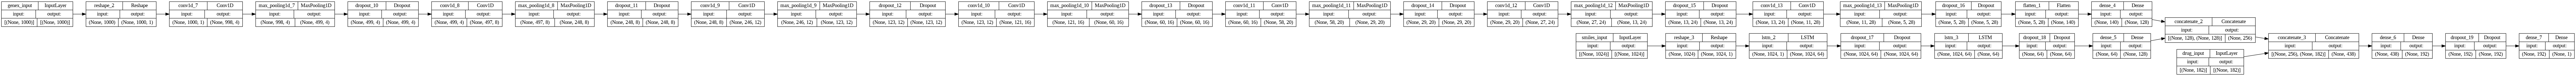

In [ ]:
# Visual of the model
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=250,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint(filepath='cp_stat601_sasha_1000_2', save_weights_only=False)
    ]
)

Epoch 1/250
162/162 [==============================] - 29s 142ms/step - loss: 7.1187 - mean_squared_error: 6.9611 - val_loss: 4.0685 - val_mean_squared_error: 3.9273
Epoch 2/250
162/162 [==============================] - 19s 117ms/step - loss: 3.0143 - mean_squared_error: 2.8763 - val_loss: 1.9682 - val_mean_squared_error: 1.8330
Epoch 3/250
162/162 [==============================] - 19s 120ms/step - loss: 1.9685 - mean_squared_error: 1.8362 - val_loss: 1.6578 - val_mean_squared_error: 1.5287
Epoch 4/250
162/162 [==============================] - 19s 119ms/step - loss: 1.7717 - mean_squared_error: 1.6451 - val_loss: 1.6162 - val_mean_squared_error: 1.4921
Epoch 5/250
162/162 [==============================] - 20s 126ms/step - loss: 1.6890 - mean_squared_error: 1.5672 - val_loss: 1.5812 - val_mean_squared_error: 1.4616
Epoch 6/250
162/162 [==============================] - 19s 117ms/step - loss: 1.6459 - mean_squared_error: 1.5284 - val_loss: 1.5664 - val_mean_squared_error: 1.4511
Epoc

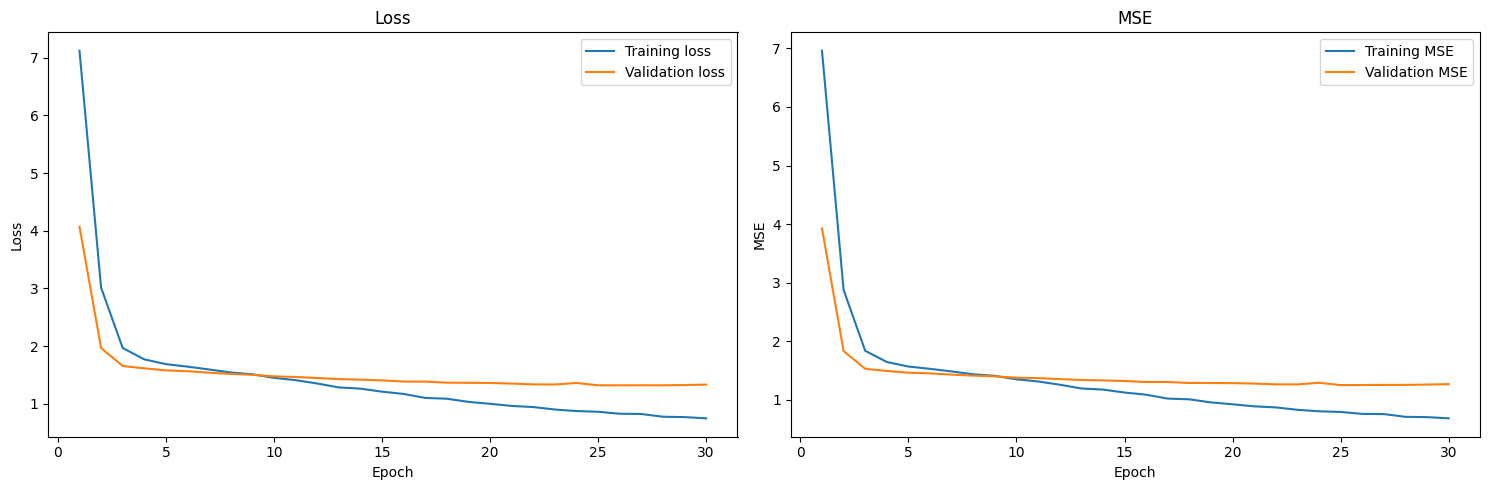

In [ ]:
# Visualize the training curves

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']

plt.figure(figsize=(15, 5))

# Plot the loss curves
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the MSE curves
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_mse) + 1), train_mse, label='Training MSE')
plt.plot(range(1, len(val_mse) + 1), val_mse, label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_mse = model.evaluate(test_dataset)
test_mse

21/21 [==============================] - 1s 33ms/step - loss: 1.3158 - mean_squared_error: 1.2441


1.2441377639770508

### Cross-Validation and Hyperparameter Tuning (**Ariel**)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, SimpleRNN, LSTM
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/sample_data/final_drug_modelid_minmaxconc_unique.csv'
data = pd.read_csv(file_path)

# Encode the 'model_id' and 'drug' columns
label_encoder = LabelEncoder()
data['model_id'] = label_encoder.fit_transform(data['model_id'])
data['drug'] = label_encoder.fit_transform(data['drug'])

# Drop columns that contain non-numeric values explicitly
data = data.select_dtypes(include=[np.number])

# Handle missing values
data = data.fillna(data.mean())

# Split data into features and target
X = data.drop(columns=['LN_IC50'])
y = data['LN_IC50']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### Random Forest with Hyperparameter Tuning

In [ ]:
# Define the Random Forest model with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Evaluate the model
best_rf = grid_search_rf.best_estimator_
rf_predictions = best_rf.predict(X_test_scaled)
print(f'Random Forest - Best Parameters: {grid_search_rf.best_params_}')
print(f'Random Forest - RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions))}, R2: {r2_score(y_test, rf_predictions)}')


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for Random Forest
title = "Learning Curves (Random Forest)"
plot_learning_curve(best_rf, title, X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()


##### Multi Linear Regression with Cross-Validation

In [ ]:
# Define the Multi Linear Regression model
mlr = LinearRegression()

# Perform cross-validation
cv_scores_mlr = cross_val_score(mlr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mlr.fit(X_train_scaled, y_train)
mlr_predictions = mlr.predict(X_test_scaled)

print(f'Multi Linear Regression - Cross-Validation RMSE: {np.sqrt(-cv_scores_mlr.mean())}')
print(f'Multi Linear Regression - RMSE: {np.sqrt(mean_squared_error(y_test, mlr_predictions))}, R2: {r2_score(y_test, mlr_predictions)}')


##### Multi-Layer Perceptron with Hyperparameter Tuning

In [ ]:
# Define the MLP model with hyperparameter tuning
mlp = MLPRegressor(random_state=42)
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500, 1000]
}

# Perform grid search with cross-validation
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_mlp.fit(X_train_scaled, y_train)

# Evaluate the model
best_mlp = grid_search_mlp.best_estimator_
mlp_predictions = best_mlp.predict(X_test_scaled)
print(f'MLP - Best Parameters: {grid_search_mlp.best_params_}')
print(f'MLP - RMSE: {np.sqrt(mean_squared_error(y_test, mlp_predictions))}, R2: {r2_score(y_test, mlp_predictions)}')


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


MLP - Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'max_iter': 500, 'solver': 'adam'}
MLP - RMSE: 1.3014668299636791, R2: 0.800019519343733


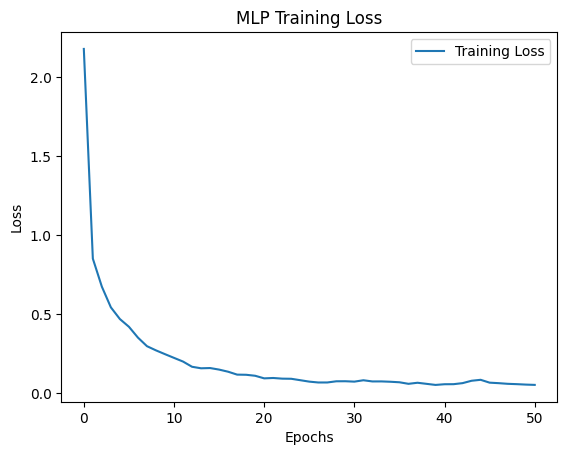

MLP - RMSE: 1.3656279000180809, R2: 0.7798157947540726


In [ ]:
import matplotlib.pyplot as plt

# Train a Multi-Layer Perceptron model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

history = mlp_model.fit(X_train_scaled, y_train)

# Plot training loss
plt.figure()
plt.plot(history.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Training Loss')
plt.legend()
plt.show()

# Evaluate the model
mlp_predictions = mlp_model.predict(X_test_scaled)
print(f'MLP - RMSE: {np.sqrt(mean_squared_error(y_test, mlp_predictions))}, R2: {r2_score(y_test, mlp_predictions)}')


### Explainable AI (XAI) with SHAP (**Ariel**)

###### Explanation:

DeepExplainer: This SHAP explainer is used for deep learning models. It helps to interpret the neural network's predictions.

shap_values: Calculated SHAP values for the test set. These values indicate the contribution of each feature to the model's predictions.

Visualizations:

Force Plot: Shows the contribution of each feature to a single prediction. This plot helps to understand the impact of individual features.

Summary Plot: Provides a global interpretation by showing the SHAP values for all features across all predictions. It highlights the most important features and their impact on the predictions.

Visualization Details

Force Plot:

Visualizes the contribution of each feature to a single prediction. The base value (expected value) is the average model output over the training dataset. Each feature's contribution is shown as pushing the prediction higher or lower.

Summary Plot:

Displays a summary of feature importance across the dataset. Each point represents a SHAP value for a feature and an instance. The color indicates the feature value (red for high, blue for low).

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.8 MB/s eta 0:00:00


#### SHAP with PCA

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


MLP - Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'sgd'}
MLP - RMSE: 1.8769026793445611, R2: 0.5840846885651342


  0%|          | 0/1286 [00:00<?, ?it/s]

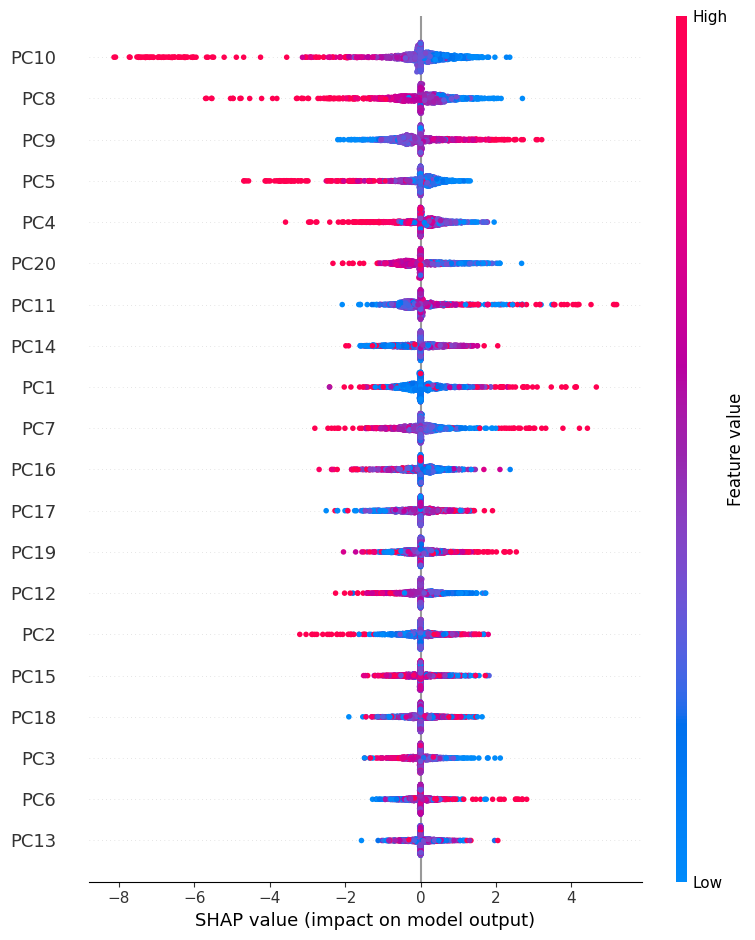

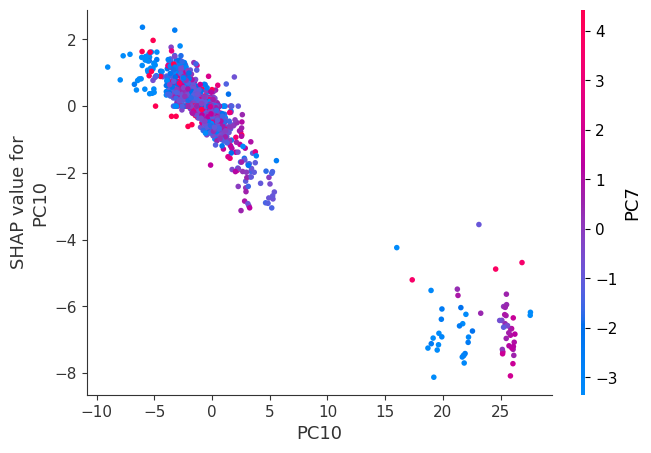

In [ ]:
import shap
from sklearn.decomposition import PCA

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=20)  # Adjust the number of components to 20
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the MLP model with hyperparameter tuning
mlp = MLPRegressor(random_state=42)
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500, 1000]
}

# Perform grid search with cross-validation
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_mlp.fit(X_train_pca, y_train)

# Evaluate the model
best_mlp = grid_search_mlp.best_estimator_
mlp_predictions = best_mlp.predict(X_test_pca)
print(f'MLP - Best Parameters: {grid_search_mlp.best_params_}')
print(f'MLP - RMSE: {np.sqrt(mean_squared_error(y_test, mlp_predictions))}, R2: {r2_score(y_test, mlp_predictions)}')

# Use SHAP to explain the MLP model
explainer = shap.KernelExplainer(best_mlp.predict, X_train_pca[:100])  # Using a subset for the background data
shap_values = explainer.shap_values(X_test_pca, nsamples=100)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_pca, feature_names=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Plot the SHAP dependence plot for the most important feature
most_important_feature = np.argmax(np.abs(shap_values).mean(0))fffff
shap.dependence_plot(most_important_feature, shap_values, X_test_pca, feature_names=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

Explanation of SHAP Outputs

The outputs include two types of SHAP visualizations: a summary plot and a dependence plot. Let's delve into what each of these plots tells us about our model and its predictions.

**Summary Plot**

The summary plot is a comprehensive visualization of feature importance and their impacts on the model's output.

**Feature Importance:**

The features are listed on the y-axis in descending order of their importance. In our plot, PC10, PC8, PC9, etc., are the most important features.

**The importance of each feature is determined by the mean absolute value of the SHAP values for that feature across all samples.**

**SHAP Values:**

The x-axis represents the **SHAP value**, which **indicates the impact of that feature on the prediction**. **Positive SHAP values** push the **prediction highe**r, while **negative SHAP values** push it **lower**.

Each dot represents a SHAP value for a particular instance. The spread of dots along the x-axis for a single feature shows how varied the impact of that feature is across different instances.

**Feature Value:**

The color of the dots represents the feature value (from low to high, using a blue to red gradient). For example, a red dot for PC10 means that instance had a high value for PC10, while a blue dot means it had a low value.

The distribution of colors helps to see if high or low feature values are associated with positive or negative impacts on the prediction.

From the summary plot, we can infer which principal components (PCs) are most influential in our model and how they generally affect the predictions. For example, PC10 has a significant impact, and high values of PC10 (red dots) generally decrease the prediction (negative SHAP values).

**Dependence Plot**

The dependence plot provides a deeper look at how a specific feature (the most important one in this case, PC10) influences the model's prediction while accounting for the effect of another feature (PC7).

**SHAP Values:**

The y-axis represents the SHAP value for PC10. As mentioned, positive values increase the model's prediction, while negative values decrease it.

**Feature Value (PC10):**

The x-axis shows the actual values of PC10.

**Interaction with Another Feature (PC7):**

The color of the dots represents the values of PC7. This helps to visualize how the interaction between PC10 and PC7 affects the prediction.

**In the dependence plot, we can observe:**

As the value of PC10 increases (moving right along the x-axis), the SHAP value generally decreases, indicating that higher PC10 values tend to lower the prediction.

The interaction with PC7 is also visible: instances with high PC7 values (red dots) might have a different trend compared to those with low PC7 values (blue dots).

**Combined Insights**

**Feature Importance:**

PC10 is the most critical feature in our model, followed by PC8, PC9, and so on.

**Impact of PC10:**

Higher values of PC10 generally decrease the model's predictions. This is evident from both the summary and dependence plots.

**Interactions:**

The dependence plot shows the nuanced interaction between PC10 and PC7, suggesting that the relationship between PC10 and the prediction is influenced by the values of PC7.

**Conclusion**

These SHAP plots provide valuable insights into our MLP model's behavior:

The summary plot highlights which principal components are most important and their overall effect on predictions.

The dependence plot offers a detailed view of how the most important feature (PC10) interacts with another significant feature (PC7) to influence predictions.

These visualizations are crucial for understanding model behavior, validating model predictions, and gaining trust in the model, especially when dealing with high-dimensional data reduced via PCA.

#### SHAP with autoencoder

41/41 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

MLP - Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'max_iter': 500, 'solver': 'sgd'}
MLP - RMSE: 1.567672489798804, R2: 0.7098436532459829


  0%|          | 0/1286 [00:00<?, ?it/s]

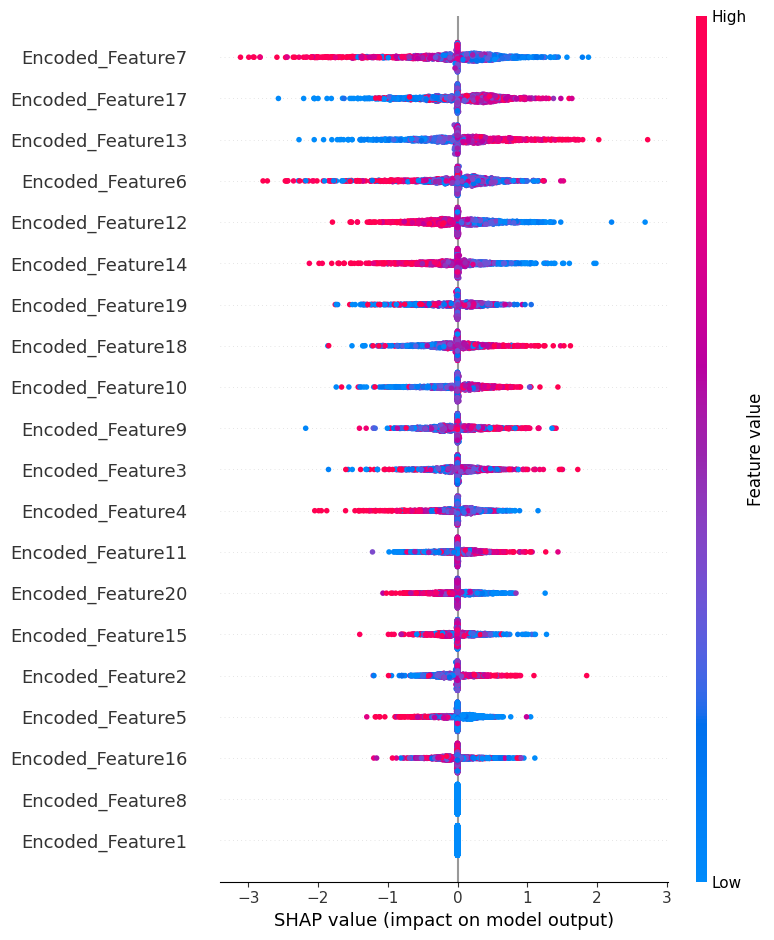

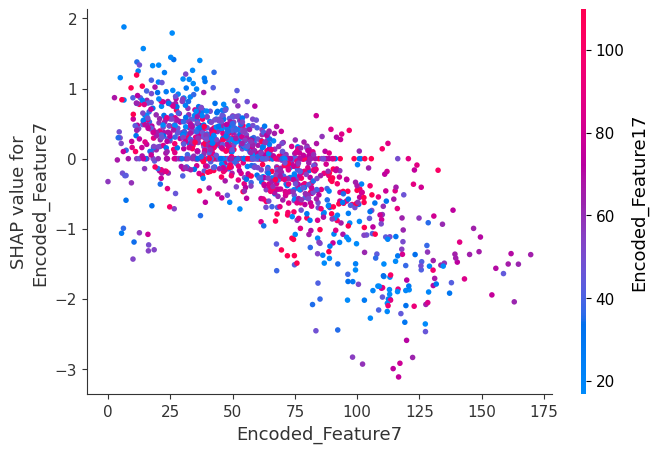

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import shap

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the autoencoder
input_dim = X_train_scaled.shape[1]
encoding_dim = 20  # Number of encoded features

input_layer = Input(shape=(input_dim,))
encoded = Dense(100, activation='relu')(input_layer)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(50, activation='relu')(encoded)
decoded = Dense(100, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Transform the data using the encoder
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Define the MLP model with hyperparameter tuning
mlp = MLPRegressor(random_state=42)
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500, 1000]
}

# Perform grid search with cross-validation
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_mlp.fit(X_train_encoded, y_train)

# Evaluate the model
best_mlp = grid_search_mlp.best_estimator_
mlp_predictions = best_mlp.predict(X_test_encoded)
print(f'MLP - Best Parameters: {grid_search_mlp.best_params_}')
print(f'MLP - RMSE: {np.sqrt(mean_squared_error(y_test, mlp_predictions))}, R2: {r2_score(y_test, mlp_predictions)}')

# Use SHAP to explain the MLP model
explainer = shap.KernelExplainer(best_mlp.predict, X_train_encoded[:100])  # Using a subset for the background data
shap_values = explainer.shap_values(X_test_encoded, nsamples=100)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_encoded, feature_names=[f'Encoded_Feature{i+1}' for i in range(X_test_encoded.shape[1])])

# Plot the SHAP dependence plot for the most important feature
most_important_feature = np.argmax(np.abs(shap_values).mean(0))
shap.dependence_plot(most_important_feature, shap_values, X_test_encoded, feature_names=[f'Encoded_Feature{i+1}' for i in range(X_test_encoded.shape[1])])


### Fully Connected Model for Dimension-Reduced Data (**Mojtaba**)

#### Additional Data Preprocessing

Initially, my plan was to utilize the dataset containing all the gene expressions. Given the comprehensive nature of this dataset, I decided to conduct a thorough examination of its features. This detailed analysis was crucial to understand the underlying data structure and to identify any potential patterns or issues that might influence our model's performance.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import FileLink

In [3]:
# Set random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [4]:
#data_1000 = pd.read_csv('/kaggle/input/601-28-project/final_1000/content/data/final_1000.csv').drop('model_id', axis=1)
data_all = pd.read_csv('/kaggle/input/601-28-project/final_all/content/data/final_all.csv').drop('model_id', axis=1)
data_all = pd.get_dummies(data_all, columns=['SANGER_MODEL_ID', 'DRUG_NAME'], dtype=int)
data_all = data_all[list(data_all.columns[3:])+list(data_all.columns[:3])]

To prevent any data leakage, I first split the data using a 60-20-20 ratio. This specific ratio was chosen due to the relatively small sample size in comparison to the large number of features.

In [5]:
def train_val_test_split(data, train_size=0.6, val_size=0.2, test_size=0.2, random_state=seed_value):
    """
    Split the data into train, validation, and test sets.
    
    Parameters:
    - data: DataFrame or numpy array, the dataset to split.
    - train_size: float, proportion of the dataset to include in the train split (default: 0.6).
    - val_size: float, proportion of the dataset to include in the validation split (default: 0.2).
    - test_size: float, proportion of the dataset to include in the test split (default: 0.2).
    - random_state: int or RandomState instance, controls the shuffling applied to the data (default: None).
    
    Returns:
    - train_data: DataFrame or numpy array, training set.
    - val_data: DataFrame or numpy array, validation set.
    - test_data: DataFrame or numpy array, test set.
    """
    # Split into train and rest
    train_data, rest_data = train_test_split(data, train_size=train_size, random_state=random_state, shuffle=True)
    
    # Calculate remaining sizes after train split
    remaining_size = 1.0 - train_size
    val_relative_size = val_size / remaining_size
    
    # Split rest into validation and test
    val_data, test_data = train_test_split(rest_data, train_size=val_relative_size, random_state=random_state, shuffle=True)
    
    return train_data, val_data, test_data

In [7]:
#del val_data_all
#del train_data_all
#del test_data_all

#train_data_1000, val_data_1000, test_data_1000 = train_val_test_split(data_1000)
train_data_all, val_data_all, test_data_all = train_val_test_split(data_all)

In [8]:
def plot_cumulative_variance(df, min_cumulative=0.99):
    # Calculate variance for each feature
    variances = df.var(axis=0)

    # Sort the variances in descending order
    sorted_variances = np.sort(variances)[::-1]

    # Calculate the cumulative sum of the sorted variances
    cumulative_variances = np.cumsum(sorted_variances)

    # Normalize the cumulative variances
    cumulative_variances_normalized = cumulative_variances / cumulative_variances[-1]

    # Find the earliest index where the cumulative variance is higher than `min_cumulative`
    index_99 = np.argmax(cumulative_variances_normalized > min_cumulative)

    # Plot the cumulative variance
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variances_normalized, label='Cumulative Variance')

    # Add a point for the 99% explained variance
    plt.scatter(index_99, cumulative_variances_normalized[index_99], color='red', zorder=5)
    plt.axhline(y=0.99, color='gray', linestyle='--', label='99% Variance Explained')
    plt.axvline(x=index_99, color='gray', linestyle='--')
    plt.text(index_99 + 5, 0.95, f'Index: {index_99}', color='red', fontsize=12)

    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Variance Explained by Sorted Features')
    plt.grid(True)
    plt.ylim(-0.05, 1.05)
    plt.legend(loc='lower center')
    plt.show()


This plot displays the sorted cumulative explained variance for the 1024 features representing the drug chemical. As illustrated, we need 871 features to explain 99 percent of the variance in the data.

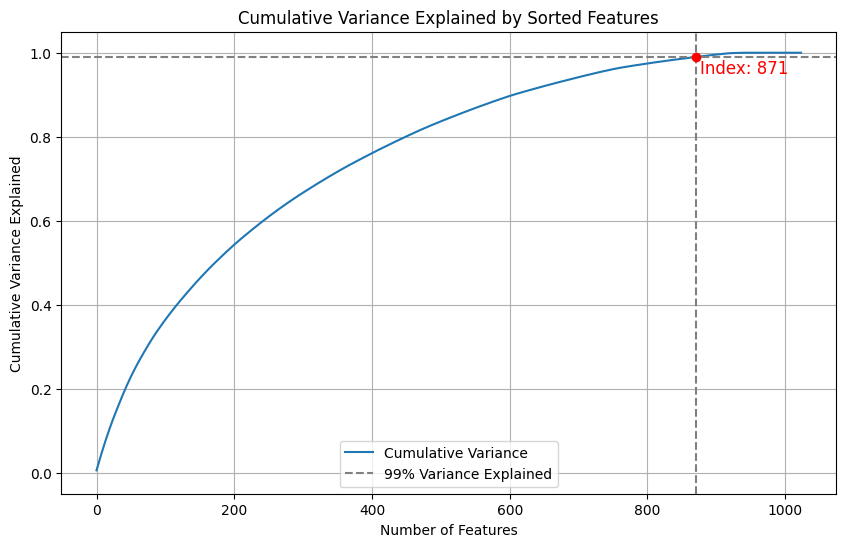

In [9]:
DrugChem_start_idx = list(train_data_all.columns).index('DrugChem_1')
DrugChem_end_idx = list(train_data_all.columns).index('DrugChem_1024')+1

plot_cumulative_variance(train_data_all.iloc[:,DrugChem_start_idx:DrugChem_end_idx])

For the gene expression data, we found that using only 3686 features allows us to explain 99 percent of the variance, instead of utilizing all 38,293 features. Although this represents a significant reduction, 3686 features still constitute a substantial amount, which could pose challenges for model training. Therefore, I decided to apply Principal Component Analysis (PCA) to further decrease the number of features, aiming to make the training process more manageable and efficient.

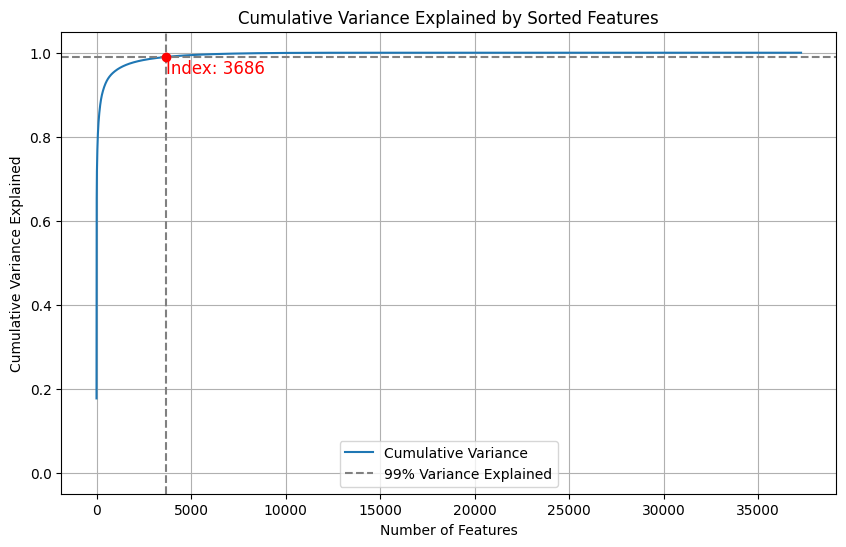

In [10]:
GeneExp_start_idx = list(train_data_all.columns).index('A1BG')
GeneExp_end_idx = list(train_data_all.columns).index('ATP6V1FNB')+1

plot_cumulative_variance(train_data_all.iloc[:,GeneExp_start_idx:GeneExp_end_idx])

In [11]:
def plot_pca_cumulative_variance(df):
    scaler = StandardScaler()
    df_standardized = scaler.fit_transform(df)

    # Perform PCA
    pca = PCA()
    pca.fit(df_standardized)

    # Get the explained variance ratios
    explained_variance_ratios = pca.explained_variance_ratio_

    # Calculate the cumulative variance explained
    cumulative_explained_variance = np.cumsum(explained_variance_ratios)

    # Find the earliest index where the cumulative variance is higher than 0.99
    index_99 = np.argmax(cumulative_explained_variance > 0.99)

    # Plot the cumulative variance explained by the principal components
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_explained_variance, label='Cumulative Variance')

    # Add a point for the 99% explained variance
    plt.scatter(index_99, cumulative_explained_variance[index_99], color='red', zorder=5)
    plt.axhline(y=0.99, color='gray', linestyle='--', label='99% Variance Explained')
    plt.axvline(x=index_99, color='gray', linestyle='--')
    plt.text(index_99 + 1, 0.90, f'Index: {index_99}', color='red', fontsize=12)

    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Variance Explained by Principal Components')
    plt.grid(True)
    plt.ylim(-0.05, 1.05)
    plt.legend(loc='lower center')
    plt.show()
    
    return scaler, pca, index_99

After applying Principal Component Analysis (PCA) to the drug chemical encodings data, I managed to reduce the number of features significantly. By using only 111 principal components, I was able to explain 99 percent of the variance, compared to the 871 features originally needed. This reduction greatly simplifies the data, making the subsequent model training process more efficient and less computationally intensive.

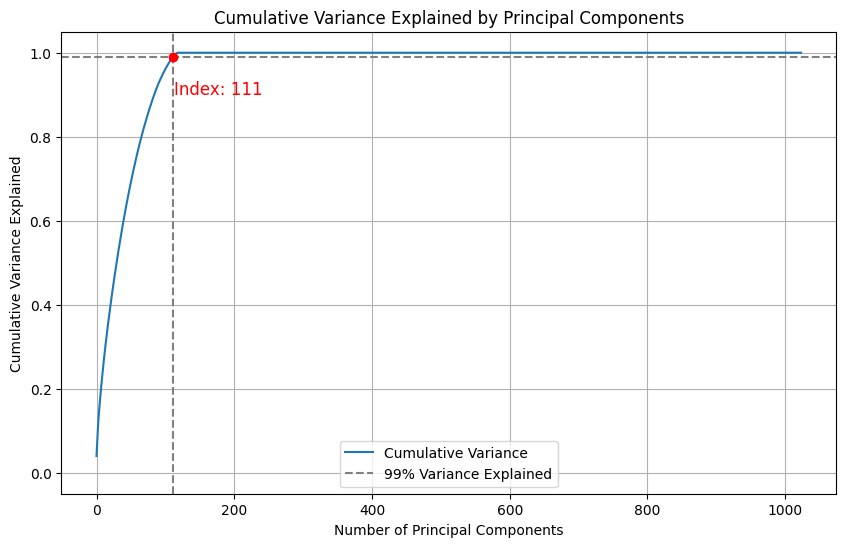

In [12]:
scaler_DrugChem, pca_DrugChem, index_99_DrugChem = plot_pca_cumulative_variance(train_data_all.iloc[:,DrugChem_start_idx:DrugChem_end_idx])

After applying Principal Component Analysis (PCA) to the gene expression data, I achieved a significant reduction in the number of features. Using only 57 principal components, I was able to explain 99 percent of the variance, compared to the 3686 features originally required. This substantial reduction simplifies the dataset, making it much more manageable for model training and improving computational efficiency.

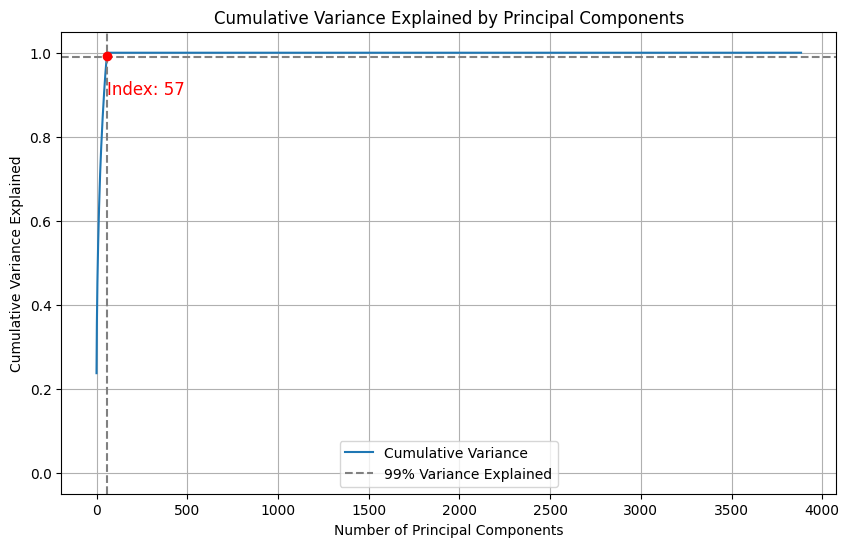

In [13]:
scaler_GeneExp, pca_GeneExp, index_99_GeneExp = plot_pca_cumulative_variance(train_data_all.iloc[:,GeneExp_start_idx:GeneExp_end_idx])

In [14]:
def scale_pca(df, scaler, pca, clipping_idx=-1, column_prefix='PC'):
    scale_transformed = scaler.transform(df)
    scale_pca_transformed = pca.transform(scale_transformed)
    component_names = [f'{column_prefix}{i+1}' for i in range(pca.n_components_)]
    scale_pca_transformed_df = pd.DataFrame(data=scale_pca_transformed, columns=component_names)
    scale_pca_transformed_clipped_df = scale_pca_transformed_df.iloc[:,:clipping_idx if clipping_idx>0 else None]
    scale_pca_transformed_clipped_df.index = df.index
    
    return scale_pca_transformed_clipped_df

In [15]:
def scale(df, scaler):
    scale_transformed = scaler.transform(df)
    scale_transformed_df = pd.DataFrame(scale_transformed, columns=df.columns)
    scale_transformed_df.index = df.index
    
    return scale_transformed_df

In [16]:
def replace_columns(df, columns_to_drop_start_idx, columns_to_drop_end_idx, df_to_concat):
    df = df.drop(df.columns[columns_to_drop_start_idx:columns_to_drop_end_idx], axis=1)
    return pd.concat((df, df_to_concat), axis=1)

At this stage, I used the training data to fit both the scaling and PCA transformers. As previously mentioned, I applied PCA separately to the drug chemical encodings and the gene expression data. For the remaining features, I performed normalization. After fitting the transformers on the training data, I then transformed the test and validation datasets to ensure there was no data leakage.

In [17]:
DrugChem_start_idx = list(train_data_all.columns).index('DrugChem_1')
DrugChem_end_idx = list(train_data_all.columns).index('DrugChem_1024')+1

train_data_all = replace_columns(df = train_data_all,
                                 columns_to_drop_start_idx = DrugChem_start_idx,
                                 columns_to_drop_end_idx = DrugChem_end_idx,
                                 df_to_concat = scale_pca(df = train_data_all.iloc[:,DrugChem_start_idx:DrugChem_end_idx], 
                                                          scaler = scaler_DrugChem, 
                                                          pca = pca_DrugChem, 
                                                          clipping_idx = index_99_DrugChem, 
                                                          column_prefix = 'DrugChemPCA_'))


GeneExp_start_idx = list(train_data_all.columns).index('A1BG')
GeneExp_end_idx = list(train_data_all.columns).index('ATP6V1FNB')+1

train_data_all = replace_columns(df = train_data_all,
                                 columns_to_drop_start_idx = GeneExp_start_idx,
                                 columns_to_drop_end_idx = GeneExp_end_idx,
                                 df_to_concat = scale_pca(df = train_data_all.iloc[:,GeneExp_start_idx:GeneExp_end_idx], 
                                                          scaler = scaler_GeneExp, 
                                                          pca = pca_GeneExp, 
                                                          clipping_idx = index_99_GeneExp, 
                                                          column_prefix = 'GeneExpPCA_'))


Rest_start_idx = list(train_data_all.columns).index('SANGER_MODEL_ID_SIDM00046')
Rest_end_idx = list(train_data_all.columns).index('MAX_CONC')+1

scaler_Rest = StandardScaler()
scaler_Rest.fit(train_data_all.iloc[:,Rest_start_idx:Rest_end_idx])

train_data_all = replace_columns(df = train_data_all,
                                 columns_to_drop_start_idx = Rest_start_idx,
                                 columns_to_drop_end_idx = Rest_end_idx,
                                 df_to_concat = scale(df = train_data_all.iloc[:,Rest_start_idx:Rest_end_idx], 
                                                      scaler = scaler_Rest))

In [34]:
print(train_data_all.shape)
train_data_all.head()

(3884, 353)


LN_IC50  DrugChemPCA_1  DrugChemPCA_2  DrugChemPCA_3  DrugChemPCA_4  \
4198 -1.094024       0.283715       0.171479       0.773537      -0.040928   
3006 -0.482667      -2.485018      -0.170753      -3.147779       0.261259   
6307  2.508572      -0.384045      -2.075713      -1.889531       3.193752   
5756  1.780192      -0.384045      -2.075713      -1.889531       3.193752   
1413  4.288034       0.514077       0.302659      -2.303554       0.658146   

      DrugChemPCA_5  DrugChemPCA_6  DrugChemPCA_7  DrugChemPCA_8  \
4198       3.015265      -2.218279      -0.974514      -2.547288   
3006      -2.700746       7.567769      -1.376771      -2.925563   
6307      -3.027402       1.404861      -3.702134       1.504662   
5756      -3.027402       1.404861      -3.702134       1.504662   
1413       0.571642      -5.616907       3.333534      11.439867   

      DrugChemPCA_9  ...  DRUG_NAME_Vinorelbine  DRUG_NAME_Vismodegib  \
4198       2.665345  ...              -0.089698             -0.105806   
3006      -5.159392  ...              -0.089698             -0.105806   
6307       5.382941  ...              -0.089698             -0.105806   
5756       5.382941  ...              -0.089698             -0.105806   
1413      -5.796119  ...              -0.089698             -0.105806   

      DRUG_NAME_Vorinostat  DRUG_NAME_Wee1 Inhibitor  DRUG_NAME_Wnt-C59  \
4198             -0.100713                 -0.102009           -0.09257   
3006             -0.100713                 -0.102009           -0.09257   
6307             -0.100713                 -0.102009           -0.09257   
5756             -0.100713                 -0.102009           -0.09257   
1413             -0.100713                 -0.102009           -0.09257   

      DRUG_NAME_XAV939  DRUG_NAME_YK-4-279  DRUG_NAME_ZM447439  MIN_CONC  \
4198         -0.083668           -0.095359           -0.096724  0.187832   
3006         -0.083668           -0.095359           -0.096724 -0.591620   
6307         -0.083668           -0.095359           -0.096724 -0.737792   
5756         -0.083668           -0.095359           -0.096724 -0.737792   
1413         -0.083668           -0.095359           -0.096724  0.187832   

      MAX_CONC  
4198  0.122282  
3006 -0.659691  
6307 -0.806311  
5756 -0.806311  
1413  0.122282  

[5 rows x 353 columns]

In [18]:
DrugChem_start_idx = list(test_data_all.columns).index('DrugChem_1')
DrugChem_end_idx = list(test_data_all.columns).index('DrugChem_1024')+1

test_data_all = replace_columns(df = test_data_all,
                                 columns_to_drop_start_idx = DrugChem_start_idx,
                                 columns_to_drop_end_idx = DrugChem_end_idx,
                                 df_to_concat = scale_pca(df = test_data_all.iloc[:,DrugChem_start_idx:DrugChem_end_idx], 
                                                          scaler = scaler_DrugChem, 
                                                          pca = pca_DrugChem, 
                                                          clipping_idx = index_99_DrugChem, 
                                                          column_prefix = 'DrugChemPCA_'))


GeneExp_start_idx = list(test_data_all.columns).index('A1BG')
GeneExp_end_idx = list(test_data_all.columns).index('ATP6V1FNB')+1

test_data_all = replace_columns(df = test_data_all,
                                 columns_to_drop_start_idx = GeneExp_start_idx,
                                 columns_to_drop_end_idx = GeneExp_end_idx,
                                 df_to_concat = scale_pca(df = test_data_all.iloc[:,GeneExp_start_idx:GeneExp_end_idx], 
                                                          scaler = scaler_GeneExp, 
                                                          pca = pca_GeneExp, 
                                                          clipping_idx = index_99_GeneExp, 
                                                          column_prefix = 'GeneExpPCA_'))


Rest_start_idx = list(test_data_all.columns).index('SANGER_MODEL_ID_SIDM00046')
Rest_end_idx = list(test_data_all.columns).index('MAX_CONC')+1

test_data_all = replace_columns(df = test_data_all,
                                 columns_to_drop_start_idx = Rest_start_idx,
                                 columns_to_drop_end_idx = Rest_end_idx,
                                 df_to_concat = scale(df = test_data_all.iloc[:,Rest_start_idx:Rest_end_idx], 
                                                      scaler = scaler_Rest))

In [35]:
print(test_data_all.shape)
test_data_all.head()

(1295, 353)


LN_IC50  DrugChemPCA_1  DrugChemPCA_2  DrugChemPCA_3  DrugChemPCA_4  \
5270  3.018991      -0.000256      -0.762143      -1.154753       0.356505   
3891  2.796646      -2.414773       0.697616       1.178617      -1.186071   
494   4.696283      -1.815888       0.569710       1.743543       0.567556   
6431  3.211273       0.802384       2.260537      -0.954999       0.525627   
3352  5.083860      -0.321338       0.592015      -0.899589      -1.484031   

      DrugChemPCA_5  DrugChemPCA_6  DrugChemPCA_7  DrugChemPCA_8  \
5270      -3.251157      -2.243988      -4.015849       2.267177   
3891      -1.276649       1.114782      -2.028993      -3.416715   
494       -0.955763      -2.686906      -0.417484       2.830427   
6431      -1.954730       4.465715       1.069629       0.384438   
3352      -1.332009      -1.837318       0.057814       2.249259   

      DrugChemPCA_9  ...  DRUG_NAME_Vinorelbine  DRUG_NAME_Vismodegib  \
5270      -3.014359  ...              -0.089698             -0.105806   
3891       2.190462  ...              -0.089698             -0.105806   
494       -0.671210  ...              -0.089698             -0.105806   
6431       1.742057  ...              -0.089698             -0.105806   
3352      -3.514857  ...              -0.089698             -0.105806   

      DRUG_NAME_Vorinostat  DRUG_NAME_Wee1 Inhibitor  DRUG_NAME_Wnt-C59  \
5270             -0.100713                 -0.102009           -0.09257   
3891             -0.100713                 -0.102009           -0.09257   
494              -0.100713                 -0.102009           -0.09257   
6431             -0.100713                 -0.102009           -0.09257   
3352             -0.100713                 -0.102009           -0.09257   

      DRUG_NAME_XAV939  DRUG_NAME_YK-4-279  DRUG_NAME_ZM447439  MIN_CONC  \
5270         -0.083668           -0.095359           -0.096724  0.187832   
3891         -0.083668           -0.095359           -0.096724  0.187832   
494          -0.083668           -0.095359           -0.096724 -0.542929   
6431         -0.083668           -0.095359           -0.096724  0.187832   
3352         -0.083668           -0.095359           -0.096724  0.187832   

      MAX_CONC  
5270  0.122282  
3891  0.122282  
494   0.122282  
6431  0.122282  
3352  0.122282  

[5 rows x 353 columns]

In [19]:
DrugChem_start_idx = list(val_data_all.columns).index('DrugChem_1')
DrugChem_end_idx = list(val_data_all.columns).index('DrugChem_1024')+1

val_data_all = replace_columns(df = val_data_all,
                                 columns_to_drop_start_idx = DrugChem_start_idx,
                                 columns_to_drop_end_idx = DrugChem_end_idx,
                                 df_to_concat = scale_pca(df = val_data_all.iloc[:,DrugChem_start_idx:DrugChem_end_idx], 
                                                          scaler = scaler_DrugChem, 
                                                          pca = pca_DrugChem, 
                                                          clipping_idx = index_99_DrugChem, 
                                                          column_prefix = 'DrugChemPCA_'))


GeneExp_start_idx = list(val_data_all.columns).index('A1BG')
GeneExp_end_idx = list(val_data_all.columns).index('ATP6V1FNB')+1

val_data_all = replace_columns(df = val_data_all,
                                 columns_to_drop_start_idx = GeneExp_start_idx,
                                 columns_to_drop_end_idx = GeneExp_end_idx,
                                 df_to_concat = scale_pca(df = val_data_all.iloc[:,GeneExp_start_idx:GeneExp_end_idx], 
                                                          scaler = scaler_GeneExp, 
                                                          pca = pca_GeneExp, 
                                                          clipping_idx = index_99_GeneExp, 
                                                          column_prefix = 'GeneExpPCA_'))


Rest_start_idx = list(val_data_all.columns).index('SANGER_MODEL_ID_SIDM00046')
Rest_end_idx = list(val_data_all.columns).index('MAX_CONC')+1

val_data_all = replace_columns(df = val_data_all,
                                 columns_to_drop_start_idx = Rest_start_idx,
                                 columns_to_drop_end_idx = Rest_end_idx,
                                 df_to_concat = scale(df = val_data_all.iloc[:,Rest_start_idx:Rest_end_idx], 
                                                      scaler = scaler_Rest))

In [36]:
print(val_data_all.shape)
val_data_all.head()

(1295, 353)


LN_IC50  DrugChemPCA_1  DrugChemPCA_2  DrugChemPCA_3  DrugChemPCA_4  \
2195  2.322620      -1.626918       1.516515      -1.101223      -1.809774   
3316  5.961656      -1.807389      -0.217962      -1.165446      -1.519387   
6052 -0.478547      -1.626918       1.516515      -1.101223      -1.809774   
3475  2.346200       1.361051      -0.674994      -0.494637      -1.371444   
5576  4.209138      -2.272652       0.327082      -1.608954      -1.912944   

      DrugChemPCA_5  DrugChemPCA_6  DrugChemPCA_7  DrugChemPCA_8  \
2195      -0.241080      -3.133211       0.090212       0.503274   
3316       0.516949      -3.672853       0.347103       0.001768   
6052      -0.241080      -3.133211       0.090212       0.503274   
3475      -1.069209      -2.556184      -0.102868       1.427246   
5576      -0.966222      -2.734905       1.892340      -0.262649   

      DrugChemPCA_9  ...  DRUG_NAME_Vinorelbine  DRUG_NAME_Vismodegib  \
2195       1.910706  ...              -0.089698             -0.105806   
3316      -2.010015  ...              -0.089698             -0.105806   
6052       1.910706  ...              -0.089698             -0.105806   
3475       1.089083  ...              -0.089698             -0.105806   
5576       3.119314  ...              -0.089698             -0.105806   

      DRUG_NAME_Vorinostat  DRUG_NAME_Wee1 Inhibitor  DRUG_NAME_Wnt-C59  \
2195             -0.100713                 -0.102009          -0.092570   
3316             -0.100713                 -0.102009          -0.092570   
6052             -0.100713                 -0.102009          -0.092570   
3475             -0.100713                 -0.102009          -0.092570   
5576             -0.100713                 -0.102009          10.802637   

      DRUG_NAME_XAV939  DRUG_NAME_YK-4-279  DRUG_NAME_ZM447439  MIN_CONC  \
2195         -0.083668           -0.095359           -0.096724  0.187832   
3316         -0.083668           -0.095359           -0.096724  0.187832   
6052         -0.083668           -0.095359           -0.096724 -0.689003   
3475         -0.083668           -0.095359           -0.096724 -0.689003   
5576         -0.083668           -0.095359           -0.096724  0.187832   

      MAX_CONC  
2195  0.122282  
3316  0.122282  
6052 -0.659691  
3475 -0.757438  
5576  0.122282  

[5 rows x 353 columns]

In [25]:
train_data_all.to_csv('train_pca.csv', index=False)
test_data_all.to_csv('test_pca.csv', index=False)
val_data_all.to_csv('val_pca.csv', index=False)

After these preprocessing steps, the number of features was reduced to just 352, while retaining a significant amount of the variance in the data.

#### Hyperparameter tuning and Evaluation

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
import random 
import os

from sklearn.linear_model import LinearRegression
from scipy import stats
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, Callback, History
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error
from tensorflow.keras.optimizers import Adam

In [2]:
train = pd.read_csv('/kaggle/input/601-28-project-datapca/train_pca.csv')
test = pd.read_csv('/kaggle/input/601-28-project-datapca/test_pca.csv')
val = pd.read_csv('/kaggle/input/601-28-project-datapca/val_pca.csv')

X_train, y_train = train.drop('LN_IC50', axis=1), train['LN_IC50']
X_test,  y_test  = test.drop('LN_IC50', axis=1),  test['LN_IC50']
X_val,   y_val   = val.drop('LN_IC50', axis=1),   val['LN_IC50']

In [3]:
# Verify if GPU is being used
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Done")
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass
    
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Num GPUs Available:  2
Done
2 Physical GPUs, 2 Logical GPUs


In [86]:
def set_seed(seed=42):
    # Set seeds for reproducibility
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [5]:
def evaluation(true, predicted, title='Evaluation'):
    print(f"{title}")
    print(f"- MSE : {mean_squared_error(true, predicted)}")
    print(f"- R2 : {r2_score(true, predicted)}")
    print('')

To establish a baseline for comparing the performance of more complex models, I initially trained a simple linear regression on the dataset. Given that validation data is unnecessary for creating a basic linear regression model, I combined the training and validation datasets for training purposes. Here are the performance results of the model:

In [6]:
reg = LinearRegression().fit(np.concatenate((X_train, X_val), axis=0), 
                             np.concatenate((y_train, y_val), axis=0))

evaluation(y_train, list(reg.predict(X_train)), title="train")
evaluation(y_test,  list(reg.predict(X_test)),  title="test")
evaluation(y_val,   list(reg.predict(X_val)),   title="val")

train
- MSE : 1.4411276478405508
- R2 : 0.8184959085729755

test
- MSE : 1.4174099567692908
- R2 : 0.8203964952155374

val
- MSE : 1.5374146823633768
- R2 : 0.817247286966376



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


I decided to use a fully connected neural network (FCNN) structure because in my opinion this dataset doesn't have any temporal or spatial properties that would benefit from recurrent neural networks (RNNs) or convolutional neural networks (CNNs). FCNNs are ideal for tabular data like this, where each sample is independent and features are not related in a sequential or spatial manner.

I opted for stacking multiple dense layers with batch normalization and dropout regularization because this approach allows the model to learn hierarchical representations of features. Batch normalization helps in stabilizing and accelerating the training process by normalizing the inputs to each layer. Dropout regularization prevents overfitting by randomly dropping connections between layers during training, ensuring that the model doesn't rely too heavily on specific features.

To find the best model configuration, I systematically tuned hyperparameters such as the number of layers, units per layer, dropout ratio, and learning rate using Keras Tuner. This iterative process ensures that the model is finely tuned to achieve optimal performance metrics, particularly minimizing mean squared error (MSE) for my regression task.

I evaluated the models based on their performance on a separate validation dataset. Early stopping based on validation loss helped me prevent overfitting and identify the optimal number of training epochs, ensuring that the model generalizes well to new, unseen data.

In summary, the FCNN structure with batch normalization, dropout regularization, and systematic hyperparameter tuning was chosen to maximize model performance and generalization capability for this specific dataset characteristics and modeling goals.

I initially attempted methods like random search and Bayesian estimation to find the optimal parameter combinations for my model. However, lacking clear intuition on the task's complexity and which parameters to focus on, I shifted my approach to gain a deeper understanding of how different parameter settings affect model performance.

I began with a simple model comprising a few nodes in one layer and closely monitored the training and validation loss per epoch. At each step, I iteratively adjusted the model based on observed trends:

- **Addressing Underfitting**: When encountering underfitting, I enhanced the model complexity by:
  - Adding additional layers to deepen the neural network.
  - Increasing the number of units per layer to allow for more complex feature representation.
  - Decreasing the dropout ratio to reduce regularization effects.
  - Increasing the batch size to facilitate more stable updates during training.

- **Addressing Overfitting**: In response to overfitting, I simplified the model by:
  - Removing unnecessary layers to reduce model complexity.
  - Decreasing the number of units per layer to limit the capacity of the model.
  - Increasing the dropout ratio to enhance regularization and prevent the model from memorizing noise in the training data.
  - Decreasing the batch size to introduce more stochasticity and prevent the model from fitting too closely to the training data.

- **Managing Unstable Performance**: If the model's performance showed instability, I adjusted by:
  - Reducing the learning rate to allow for more gradual updates and smoother convergence.

Through this iterative process of adjusting model parameters based on observed performance metrics, I aimed to strike a balance between underfitting and overfitting while maximizing the model's predictive capability. This methodical approach allowed me to gain insights into how each parameter setting influences the model's behavior and performance, ultimately guiding the refinement of the model architecture for improved results.

In [113]:
def model_structure_1(num_layers_par, num_units_par, dropout_ratio_par, learning_rate_par, num_epochs, batch_size, patience=100):
    set_seed()
    
    tuner_dir = 'my_dir/kt'
    log_dir = 'my_dir/logs'
    os.makedirs(tuner_dir, exist_ok=True)
    os.makedirs(log_dir, exist_ok=True)

    # Check if there's only one combination in the parameter grid
    if len(num_layers_par) == 1 and len(num_units_par) == 1 and len(dropout_ratio_par) == 1 and len(learning_rate_par) == 1:
        num_layers = num_layers_par[0]
        num_units = num_units_par[0]
        dropout_ratio = dropout_ratio_par[0]
        learning_rate = learning_rate_par[0]

        print(f"Using fixed hyperparameters: num_layers={num_layers}, num_units={num_units}, dropout={dropout_ratio}, learning_rate={learning_rate}")

        # Build the model
        model = Sequential()
        
        # Input layer
        model.add(Dense(units=num_units, activation='relu', input_shape=(352,)))
        model.add(BatchNormalization()) 
        model.add(Dropout(dropout_ratio))

        # Hidden layers
        for i in range(num_layers):
            model.add(Dense(units=num_units, activation='relu'))
            model.add(BatchNormalization())
            model.add(Dropout(dropout_ratio))

        # Output layer
        model.add(Dense(1))

        # Compile model
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

        # Train the model
        history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)])

        # Evaluate the model
        print("Train Evaluation:")
        train_loss = model.evaluate(X_train, y_train)
        print("Test Evaluation:")
        test_loss = model.evaluate(X_test, y_test)
        print("Validation Evaluation:")
        val_loss = model.evaluate(X_val, y_val)

        # Plot training and validation loss
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

        return history, None, model  # Return None for tuner object when not using Keras Tuner

    else:
        # Function to build the model
        def build_model(hp):
            model = Sequential()
            
            num_layers = hp.Choice('num_layers', num_layers_par)
            num_units = hp.Choice('num_units', num_units_par)
            dropout_ratio = hp.Choice('dropout', dropout_ratio_par)
            learning_rate = hp.Choice('learning_rate', learning_rate_par)

            # Input layer
            model.add(Dense(units=num_units, activation='relu', input_shape=(352,)))
            model.add(BatchNormalization()) 
            model.add(Dropout(dropout_ratio))

            # Hidden layers
            for i in range(num_layers):
                model.add(Dense(units=num_units, activation='relu'))
                model.add(BatchNormalization())
                model.add(Dropout(dropout_ratio))

            # Output layer
            model.add(Dense(1))

            # Compile model
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

            return model

        # Instantiate the tuner
        tuner = kt.RandomSearch(
            build_model,
            objective='val_loss',
            max_trials=20,
            executions_per_trial=1,
            directory=tuner_dir,
            project_name='intro_to_kt',
            overwrite=True,
        )

        # Define callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)
        
        # Run the tuner
        tuner.search(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val),
                     callbacks=[early_stopping])

        # Get the best model
        best_trial = tuner.oracle.get_best_trials(1)[0]
        best_model = tuner.hypermodel.build(best_trial.hyperparameters)  # Build the model from the best trial's hyperparameters

        # Compile the best model
        best_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')

        # Train the best model again on the entire dataset
        history = best_model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early_stopping])

        # Evaluate the best model
        print("Train Evaluation:")
        train_loss = best_model.evaluate(X_train, y_train)
        print("Test Evaluation:")
        test_loss = best_model.evaluate(X_test, y_test)
        print("Validation Evaluation:")
        val_loss = best_model.evaluate(X_val, y_val)

        # Plot training and validation loss
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

        return history, tuner, best_model


Using fixed hyperparameters: num_layers=1, num_units=5, dropout=0.0, learning_rate=0.01
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 11.1896 - val_loss: 6.5247
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1027 - val_loss: 5.0105
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3542 - val_loss: 2.9511
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0831 - val_loss: 2.4759
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9536 - val_loss: 2.2593
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8654 - val_loss: 2.2510
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8095 - val_loss: 2.2448
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7717 - val_loss: 2.1877
Epoch 9/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7276 - val_loss: 2.1824
Epoch 10/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6891 - val_loss: 2.1185
Restoring model weights from the end of the best epoch: 10.
Train Evaluation:
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4380
Test Evaluatio

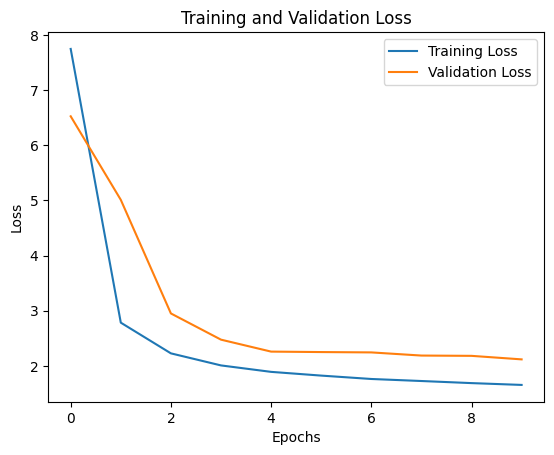

In [89]:
history, tuner, best_model = model_structure_1(num_layers_par=[1], 
                                               num_units_par=[5], 
                                               dropout_ratio_par=[0.0], 
                                               learning_rate_par=[0.01], 
                                               num_epochs=10)

Using fixed hyperparameters: num_layers=2, num_units=5, dropout=0.5, learning_rate=0.01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 14.8805 - val_loss: 8.2623
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5875 - val_loss: 8.1173
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1002 - val_loss: 7.8979
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7093 - val_loss: 7.0540
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1933 - val_loss: 5.6314
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4832 - val_loss: 4.6424
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9659 - val_loss: 4.2098
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8040 - val_loss: 3.9371
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1724 - val_loss: 3.7681
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2486 - val_loss: 3.2488
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2737 - val_loss: 3.3697
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

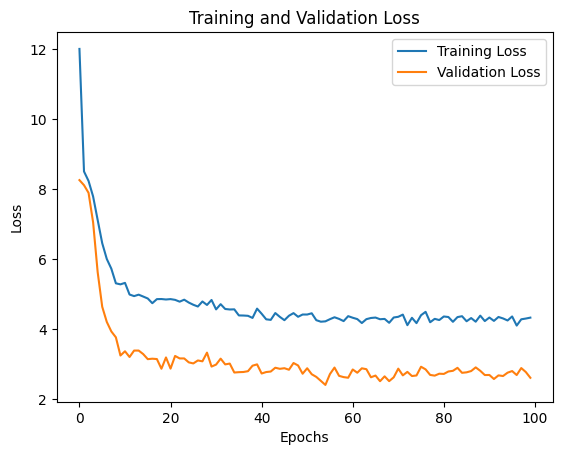

In [90]:
history, tuner, best_model = model_structure_1(num_layers_par=[2], 
                                               num_units_par=[5], 
                                               dropout_ratio_par=[0.5], 
                                               learning_rate_par=[0.01], 
                                               num_epochs=100)

Using fixed hyperparameters: num_layers=5, num_units=5, dropout=0.5, learning_rate=0.01


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - loss: 14.0517 - val_loss: 8.5244
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7906 - val_loss: 8.4283
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3265 - val_loss: 8.4131
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0700 - val_loss: 8.4095
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9829 - val_loss: 8.4153
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8153 - val_loss: 8.4151
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8107 - val_loss: 8.4205
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8273 - val_loss: 8.4183
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7872 - val_loss: 8.4181
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7641 - val_loss: 8.4183
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7582 - val_loss: 8.4213
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━

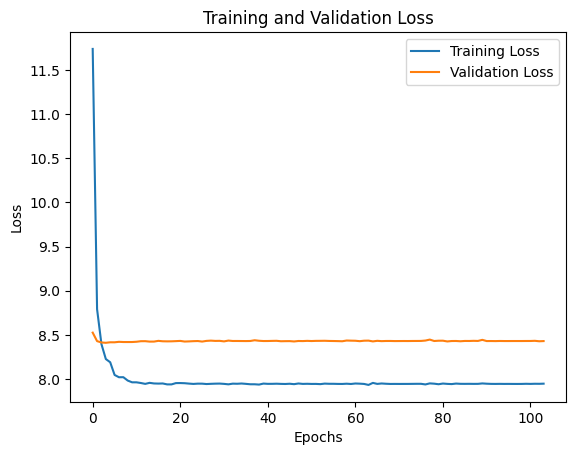

In [91]:
history, tuner, best_model = model_structure_1(num_layers_par=[5], 
                                               num_units_par=[5], 
                                               dropout_ratio_par=[0.5], 
                                               learning_rate_par=[0.01], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=5, num_units=5, dropout=0.5, learning_rate=0.05


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - loss: 10.6859 - val_loss: 8.4133
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8538 - val_loss: 8.4699
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7868 - val_loss: 8.4556
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7587 - val_loss: 8.4654
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7516 - val_loss: 8.4641
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7545 - val_loss: 8.4544
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7480 - val_loss: 8.4557
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7492 - val_loss: 8.4552
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7523 - val_loss: 8.4538
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7468 - val_loss: 8.4519
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7486 - val_loss: 8.4709
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━

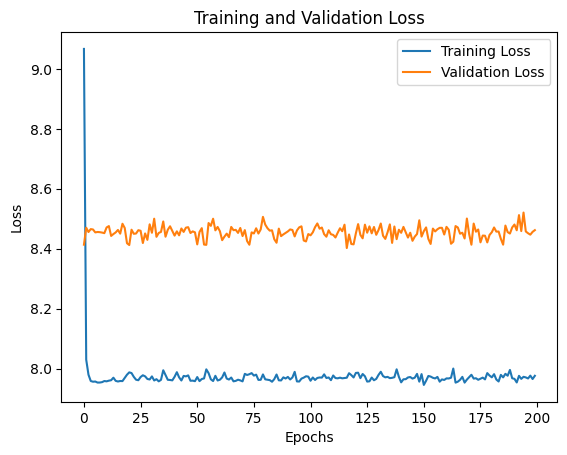

In [92]:
history, tuner, best_model = model_structure_1(num_layers_par=[5], 
                                               num_units_par=[5], 
                                               dropout_ratio_par=[0.5], 
                                               learning_rate_par=[0.05], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=10, num_units=5, dropout=0.5, learning_rate=0.05


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 44s 172ms/step - loss: 10.2915 - val_loss: 8.4305
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8621 - val_loss: 8.4650
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7642 - val_loss: 8.4529
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7477 - val_loss: 8.4582
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7447 - val_loss: 8.4498
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7440 - val_loss: 8.4495
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7467 - val_loss: 8.4623
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7524 - val_loss: 8.4490
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7489 - val_loss: 8.4462
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7752 - val_loss: 8.4621
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7623 - val_loss: 8.4594
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━

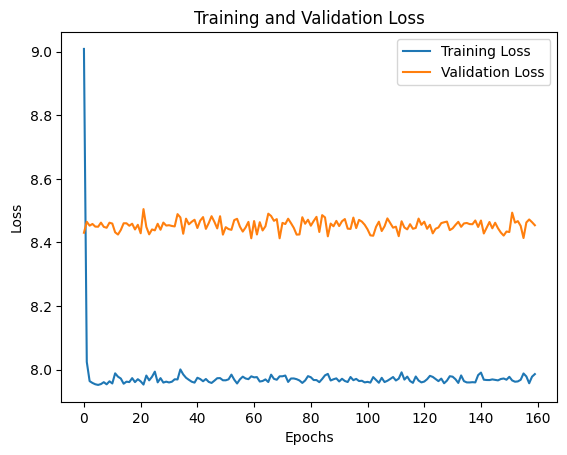

In [93]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[5], 
                                               dropout_ratio_par=[0.5], 
                                               learning_rate_par=[0.05], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=10, num_units=20, dropout=0.5, learning_rate=0.05


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 44s 163ms/step - loss: 9.9615 - val_loss: 8.4334
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8416 - val_loss: 8.4159
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8441 - val_loss: 8.4132
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7657 - val_loss: 8.4859
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7716 - val_loss: 8.4692
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7666 - val_loss: 8.4537
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7585 - val_loss: 8.4299
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7621 - val_loss: 8.4186
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7796 - val_loss: 8.4190
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7893 - val_loss: 8.4294
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7811 - val_loss: 8.4516
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━

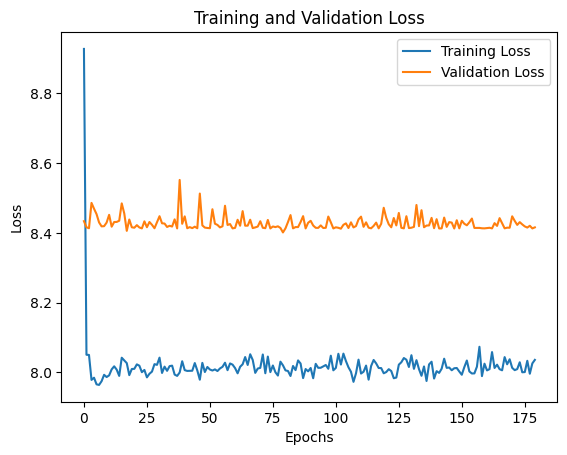

In [94]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[20], 
                                               dropout_ratio_par=[0.5], 
                                               learning_rate_par=[0.05], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=10, num_units=20, dropout=0.5, learning_rate=0.1


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 43s 159ms/step - loss: 9.6025 - val_loss: 8.4472
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8080 - val_loss: 8.4257
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8273 - val_loss: 8.4423
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.9568 - val_loss: 8.4172
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8268 - val_loss: 8.4189
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8403 - val_loss: 8.4138
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.0078 - val_loss: 8.4448
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8656 - val_loss: 8.4118
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9268 - val_loss: 8.5273
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9833 - val_loss: 8.4170
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8955 - val_loss: 8.4439
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━

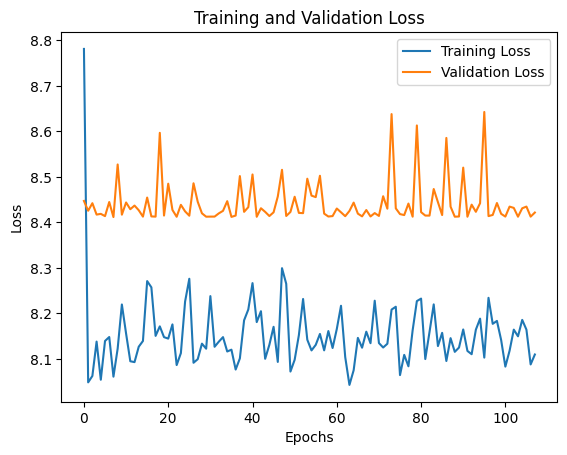

In [95]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[20], 
                                               dropout_ratio_par=[0.5], 
                                               learning_rate_par=[0.1], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=10, num_units=20, dropout=0.3, learning_rate=0.1


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 46s 169ms/step - loss: 9.2845 - val_loss: 8.4218
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8599 - val_loss: 8.4328
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7937 - val_loss: 8.4272
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7840 - val_loss: 8.4510
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8527 - val_loss: 8.4677
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8181 - val_loss: 8.4216
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8254 - val_loss: 8.4349
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8172 - val_loss: 8.4709
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8671 - val_loss: 8.4168
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8528 - val_loss: 8.4133
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7871 - val_loss: 8.5768
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━

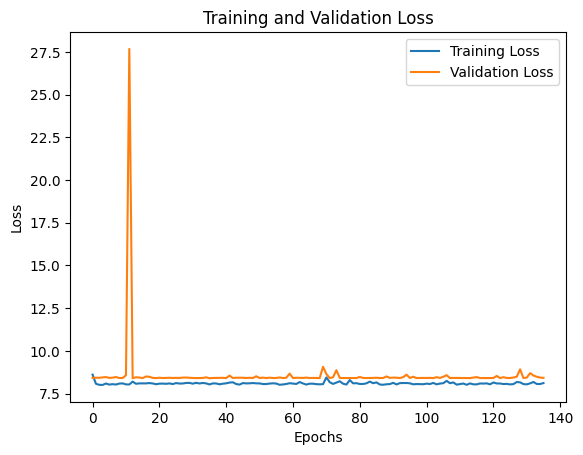

In [96]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[20], 
                                               dropout_ratio_par=[0.3], 
                                               learning_rate_par=[0.1], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=10, num_units=64, dropout=0.3, learning_rate=0.01


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - loss: 11.9713 - val_loss: 9.8957
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.2369 - val_loss: 8.9388
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9977 - val_loss: 8.8636
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7479 - val_loss: 8.3346
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.6807 - val_loss: 8.1737
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.3296 - val_loss: 6.6126
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0924 - val_loss: 7.9831
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5807 - val_loss: 4.0992
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7525 - val_loss: 2.3828
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2456 - val_loss: 2.3922
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0964 - val_loss: 2.4053
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━

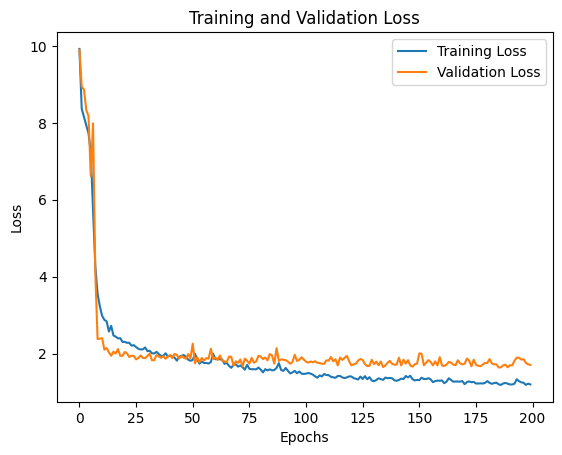

In [99]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[64], 
                                               dropout_ratio_par=[0.3], 
                                               learning_rate_par=[0.01], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=10, num_units=64, dropout=0.5, learning_rate=0.01


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 45s 171ms/step - loss: 12.1584 - val_loss: 8.4043
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.4372 - val_loss: 8.3873
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1134 - val_loss: 8.4247
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.0393 - val_loss: 8.4442
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9733 - val_loss: 8.4206
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.9198 - val_loss: 8.4262
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8076 - val_loss: 8.4136
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9079 - val_loss: 8.4132
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8714 - val_loss: 8.4218
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9165 - val_loss: 8.4202
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8240 - val_loss: 8.4588
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━

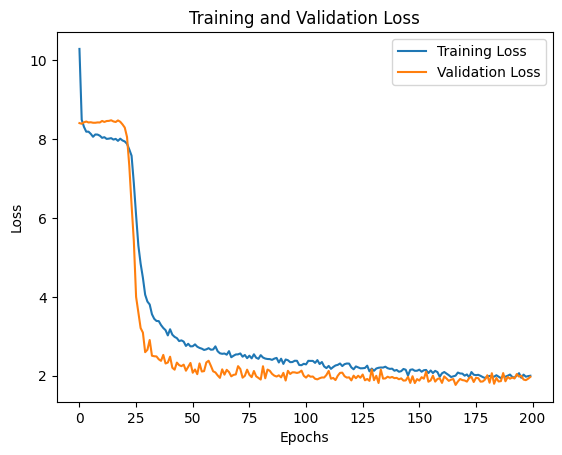

In [100]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[64], 
                                               dropout_ratio_par=[0.5], 
                                               learning_rate_par=[0.01], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=15, num_units=64, dropout=0.4, learning_rate=0.01


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 69s 260ms/step - loss: 11.8805 - val_loss: 8.4946
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.3565 - val_loss: 8.4179
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.0072 - val_loss: 8.4673
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9722 - val_loss: 8.4253
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9474 - val_loss: 8.3933
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.9046 - val_loss: 8.4343
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9473 - val_loss: 8.4504
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9474 - val_loss: 8.4254
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.7686 - val_loss: 8.4711
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.7927 - val_loss: 8.4632
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8891 - val_loss: 8.3890
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━

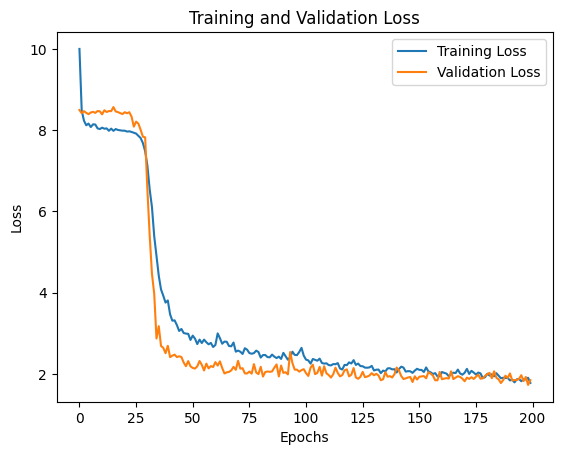

In [103]:
history, tuner, best_model = model_structure_1(num_layers_par=[15], 
                                               num_units_par=[64], 
                                               dropout_ratio_par=[0.4], 
                                               learning_rate_par=[0.01], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=20, num_units=64, dropout=0.3, learning_rate=0.01


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 92s 346ms/step - loss: 11.3302 - val_loss: 8.7431
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.2455 - val_loss: 8.6511
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.0370 - val_loss: 8.5179
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9163 - val_loss: 8.3769
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8804 - val_loss: 8.4388
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8691 - val_loss: 8.3754
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9014 - val_loss: 8.3963
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8358 - val_loss: 8.4161
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8138 - val_loss: 8.4518
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8085 - val_loss: 8.4430
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8354 - val_loss: 8.4332
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━

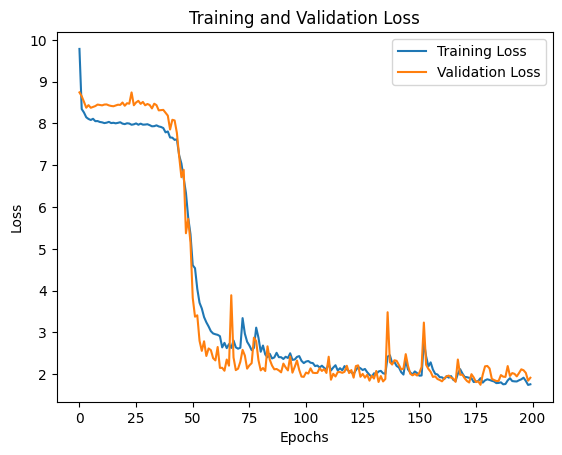

In [105]:
history, tuner, best_model = model_structure_1(num_layers_par=[20], 
                                               num_units_par=[64], 
                                               dropout_ratio_par=[0.3], 
                                               learning_rate_par=[0.01], 
                                               num_epochs=200)

Using fixed hyperparameters: num_layers=20, num_units=100, dropout=0.3, learning_rate=0.01


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 94s 355ms/step - loss: 11.5925 - val_loss: 12.4735
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1246 - val_loss: 10.0080
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1569 - val_loss: 8.5899
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.0151 - val_loss: 8.7559
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.9752 - val_loss: 8.4549
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8997 - val_loss: 8.3693
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8746 - val_loss: 8.3824
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8343 - val_loss: 8.4122
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8346 - val_loss: 8.6022
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8113 - val_loss: 8.4323
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7899 - val_loss: 8.4132
Epoch 12/400
122/122 ━━━━━━━━━━━━━━

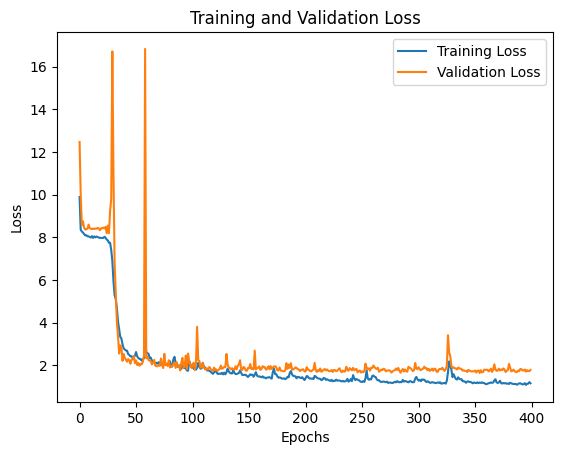

In [107]:
history, tuner, best_model = model_structure_1(num_layers_par=[20], 
                                               num_units_par=[100], 
                                               dropout_ratio_par=[0.3], 
                                               learning_rate_par=[0.01], 
                                               num_epochs=400)

Using fixed hyperparameters: num_layers=20, num_units=100, dropout=0.35, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 97s 352ms/step - loss: 10.9518 - val_loss: 3291.5884
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1711 - val_loss: 21.6785
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.0173 - val_loss: 8.4599
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.9030 - val_loss: 8.3871
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8807 - val_loss: 8.4330
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8037 - val_loss: 8.4222
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8170 - val_loss: 8.4183
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7696 - val_loss: 8.4244
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8250 - val_loss: 8.3777
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8357 - val_loss: 8.3859
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7957 - val_loss: 8.4325
Epoch 12/400
122/122 ━━━━━━━━━━━━

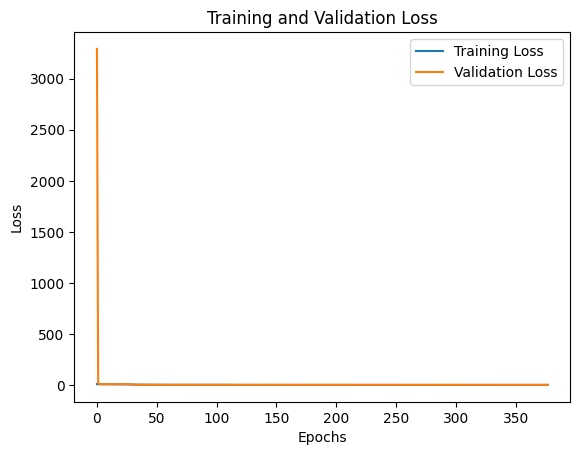

In [110]:
history, tuner, best_model = model_structure_1(num_layers_par=[20], 
                                               num_units_par=[100], 
                                               dropout_ratio_par=[0.35], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400)

Using fixed hyperparameters: num_layers=20, num_units=100, dropout=0.45, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 95s 356ms/step - loss: 11.3162 - val_loss: 10.4121
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.2517 - val_loss: 8.5011
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.0357 - val_loss: 8.3861
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9366 - val_loss: 8.4196
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8442 - val_loss: 8.4803
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8959 - val_loss: 8.4206
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8136 - val_loss: 8.4242
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8166 - val_loss: 8.4042
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8270 - val_loss: 8.4616
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8777 - val_loss: 8.4545
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.7795 - val_loss: 8.4155
Epoch 12/400
122/122 ━━━━━━━━━━━━━━━

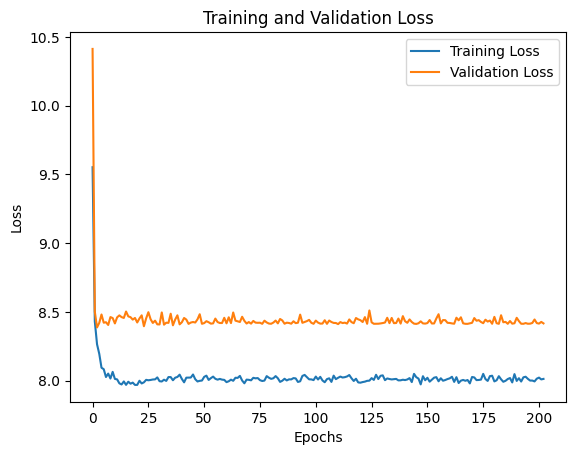

In [115]:
history, tuner, best_model = model_structure_1(num_layers_par=[20], 
                                               num_units_par=[100], 
                                               dropout_ratio_par=[0.45], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

Using fixed hyperparameters: num_layers=15, num_units=100, dropout=0.45, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 70s 266ms/step - loss: 11.6626 - val_loss: 31.9446
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.3175 - val_loss: 8.5018
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9986 - val_loss: 8.4881
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9660 - val_loss: 8.5559
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8928 - val_loss: 8.4107
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8949 - val_loss: 8.4582
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8879 - val_loss: 8.4238
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8469 - val_loss: 8.4937
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8332 - val_loss: 8.3923
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8744 - val_loss: 8.4546
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8127 - val_loss: 8.4051
Epoch 12/400
122/122 ━━━━━━━━━━━━━━━

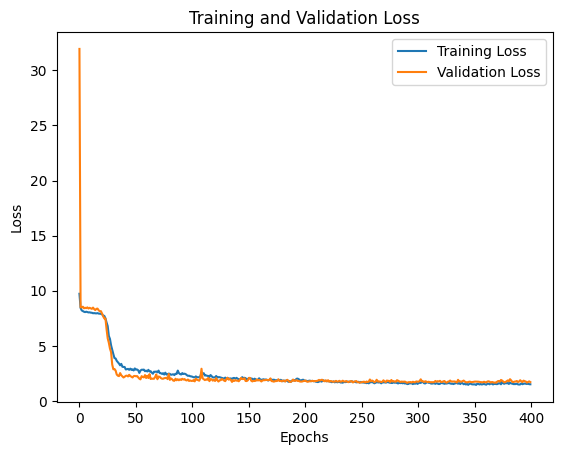

In [116]:
history, tuner, best_model = model_structure_1(num_layers_par=[15], 
                                               num_units_par=[100], 
                                               dropout_ratio_par=[0.45], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

Using fixed hyperparameters: num_layers=10, num_units=100, dropout=0.45, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 186ms/step - loss: 11.2014 - val_loss: 29.8898
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.2044 - val_loss: 8.8966
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.0552 - val_loss: 8.3593
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.9012 - val_loss: 8.3695
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8512 - val_loss: 8.3072
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7927 - val_loss: 7.9896
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.6785 - val_loss: 7.2871
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.2885 - val_loss: 6.4615
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.0489 - val_loss: 27.9391
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6984 - val_loss: 6.2192
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7967 - val_loss: 3.0289
Epoch 12/400
122/122 ━━━━━━━━━━━━━━

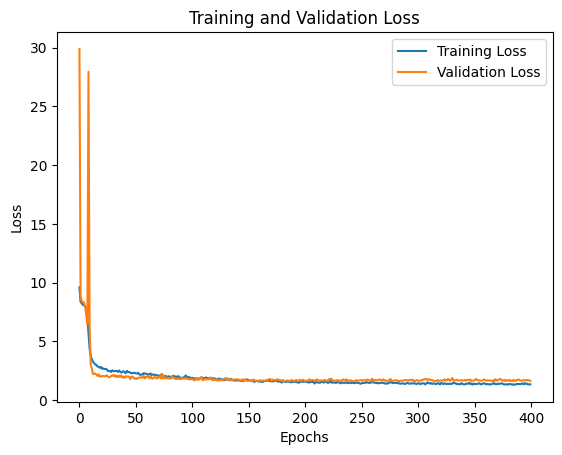

In [118]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[100], 
                                               dropout_ratio_par=[0.45], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

Using fixed hyperparameters: num_layers=10, num_units=80, dropout=0.45, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 187ms/step - loss: 11.0387 - val_loss: 8.9532
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.1581 - val_loss: 8.4381
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9286 - val_loss: 8.4031
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9087 - val_loss: 8.4389
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9283 - val_loss: 8.4193
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8292 - val_loss: 8.4349
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7910 - val_loss: 8.4499
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8289 - val_loss: 8.4236
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8145 - val_loss: 8.3797
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8216 - val_loss: 8.3942
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.7298 - val_loss: 8.6055
Epoch 12/400
122/122 ━━━━━━━━━━━━━━━━

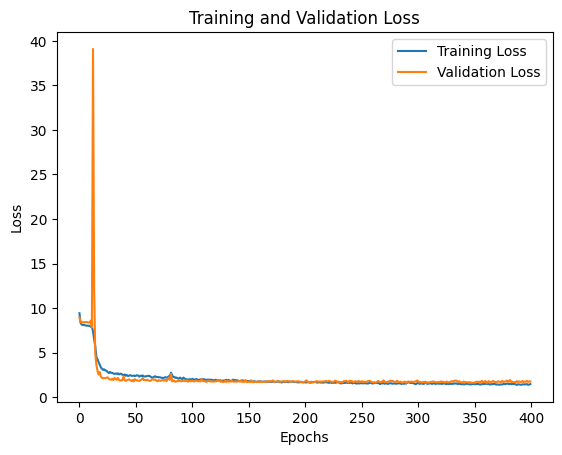

In [120]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[80], 
                                               dropout_ratio_par=[0.45], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

Using fixed hyperparameters: num_layers=10, num_units=60, dropout=0.45, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 188ms/step - loss: 10.6255 - val_loss: 10.0239
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1285 - val_loss: 8.5269
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9512 - val_loss: 8.4760
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9415 - val_loss: 8.4860
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8690 - val_loss: 8.4264
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8639 - val_loss: 8.4539
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8734 - val_loss: 8.4283
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8468 - val_loss: 8.4140
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7946 - val_loss: 8.4638
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7980 - val_loss: 8.5431
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8159 - val_loss: 8.4482
Epoch 12/400
122/122 ━━━━━━━━━━━━━━━

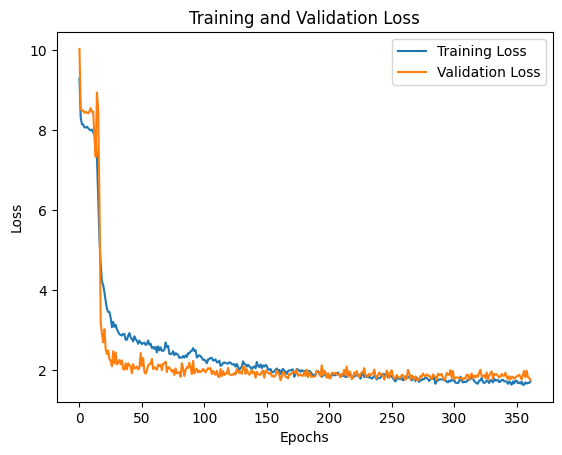

In [121]:
history, tuner, best_model = model_structure_1(num_layers_par=[10], 
                                               num_units_par=[60], 
                                               dropout_ratio_par=[0.45], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

Using fixed hyperparameters: num_layers=5, num_units=80, dropout=0.45, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - loss: 11.0787 - val_loss: 10.2598
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8845 - val_loss: 7.7037
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9409 - val_loss: 10.7191
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0683 - val_loss: 4.4561
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7800 - val_loss: 2.9685
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4700 - val_loss: 2.0922
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1353 - val_loss: 2.0331
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8964 - val_loss: 2.0068
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7541 - val_loss: 2.0704
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5811 - val_loss: 2.0427
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6679 - val_loss: 1.9499
Epoch 12/400
122/122 ━━━━━━━━━━━━━━

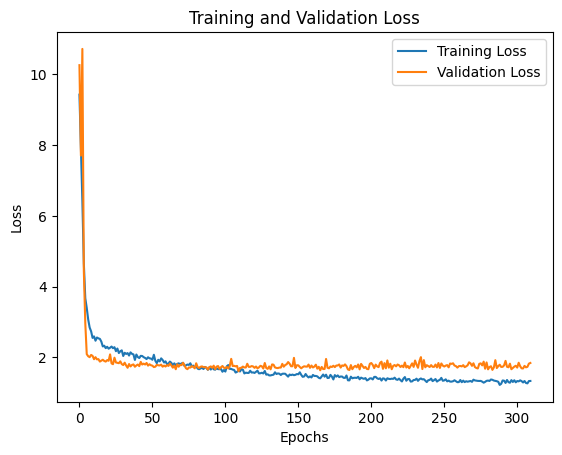

In [122]:
history, tuner, best_model = model_structure_1(num_layers_par=[5], 
                                               num_units_par=[80], 
                                               dropout_ratio_par=[0.45], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

Using fixed hyperparameters: num_layers=5, num_units=200, dropout=0.45, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - loss: 12.2837 - val_loss: 15.9551
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0677 - val_loss: 7.1809
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5518 - val_loss: 8.6920
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7298 - val_loss: 4.3635
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2946 - val_loss: 3.0405
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8713 - val_loss: 2.2367
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5686 - val_loss: 2.0742
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4734 - val_loss: 1.9655
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5140 - val_loss: 1.8933
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1913 - val_loss: 1.9809
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2152 - val_loss: 2.0450
Epoch 12/400
122/122 ━━━━━━━━━━━━━━━

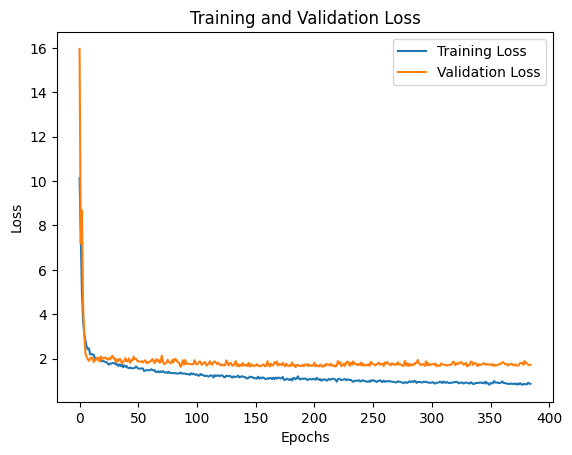

In [123]:
history, tuner, best_model = model_structure_1(num_layers_par=[5], 
                                               num_units_par=[200], 
                                               dropout_ratio_par=[0.45], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

Using fixed hyperparameters: num_layers=5, num_units=200, dropout=0.6, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - loss: 12.6314 - val_loss: 15.0809
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5273 - val_loss: 8.0878
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1791 - val_loss: 7.7652
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6601 - val_loss: 6.3297
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6734 - val_loss: 5.8140
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0849 - val_loss: 3.7901
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0973 - val_loss: 2.6673
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7201 - val_loss: 2.4249
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2445 - val_loss: 2.0937
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9887 - val_loss: 2.1174
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8609 - val_loss: 2.1251
Epoch 12/400
122/122 ━━━━━━━━━━━━━━━

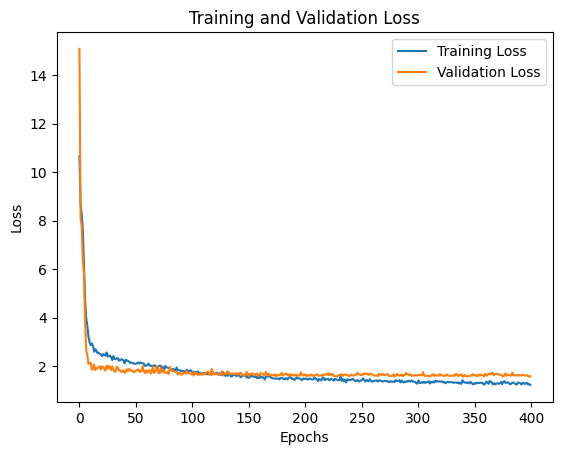

In [124]:
history, tuner, best_model = model_structure_1(num_layers_par=[5], 
                                               num_units_par=[200], 
                                               dropout_ratio_par=[0.6], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

Using fixed hyperparameters: num_layers=5, num_units=200, dropout=0.7, learning_rate=0.02


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - loss: 13.4598 - val_loss: 10.8143
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6781 - val_loss: 8.4054
Epoch 3/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4856 - val_loss: 8.3852
Epoch 4/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0095 - val_loss: 8.3206
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9303 - val_loss: 8.2466
Epoch 6/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8811 - val_loss: 8.1482
Epoch 7/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8270 - val_loss: 8.1931
Epoch 8/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8175 - val_loss: 7.6417
Epoch 9/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6003 - val_loss: 6.1194
Epoch 10/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9232 - val_loss: 4.2112
Epoch 11/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9234 - val_loss: 3.6265
Epoch 12/400
122/122 ━━━━━━━━━━━━━━━

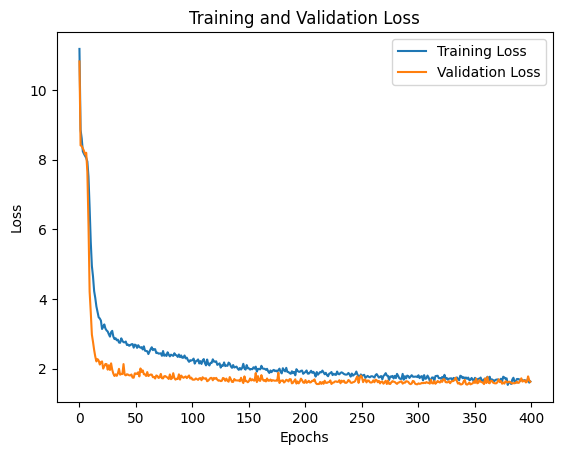

In [126]:
history, tuner, best_model = model_structure_1(num_layers_par=[5], 
                                               num_units_par=[200], 
                                               dropout_ratio_par=[0.7], 
                                               learning_rate_par=[0.02], 
                                               num_epochs=400, 
                                               patience=200)

The best model I discovered through this iterative method achieved an MSE of 1.21. However, a recurring issue observed across these models is the challenge of overfitting. Attempts to mitigate overfitting by increasing the dropout ratio often resulted in the model struggling to achieve a low MSE even on the training data, indicating signs of underfitting.

To address this issue, I explored a new model structure by incorporating kernel regularizers. The goal was to leverage these regularization techniques alongside dropout to potentially enhance the model's ability to generalize while maintaining low training and validation errors.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError

def build_model(input_size, hidden_sizes, output_size, learning_rate=0.001,
                activation='relu', dropout_rate=0.2, kernel_regularizer=None,
                batch_normalization=False, optimizer='adam', loss='mse', batch_size=32):
    
    set_seed()
    
    model = Sequential()
    
    # Input layer
    model.add(Dense(hidden_sizes[0], input_dim=input_size, activation=activation,
                    kernel_initializer='he_normal', kernel_regularizer=kernel_regularizer))
    
    if batch_normalization:
        model.add(BatchNormalization())
    
    # Hidden layers
    for size in hidden_sizes[1:]:
        model.add(Dense(size, activation=activation, kernel_regularizer=kernel_regularizer))
        model.add(Dropout(dropout_rate))
        if batch_normalization:
            model.add(BatchNormalization())
    
    # Output layer
    model.add(Dense(output_size, activation='linear'))  # Linear activation for regression
    
    # Select optimizer
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError(f"Optimizer '{optimizer}' not supported.")
    
    # Select loss function
    if loss == 'mse':
        loss_function = MeanSquaredError()
    elif loss == 'huber':
        loss_function = Huber()
    else:
        raise ValueError(f"Loss function '{loss}' not supported.")
    
    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])
    
    return model


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 256)            │        90,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,377 (521.00 KB)

 Trainable params: 132,481 (517.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/400
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.0575 - mae: 3.4693

W0000 00:00:1718597712.305305     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 15.7645 - mae: 3.4386
Epoch 1: val_loss improved from inf to 7.81490, saving model to best_model.keras


W0000 00:00:1718597716.271297     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 15.7454 - mae: 3.4366 - val_loss: 7.8149 - val_mae: 2.3190 - learning_rate: 0.0010
Epoch 2/400
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4621 - mae: 2.7813
Epoch 2: val_loss improved from 7.81490 to 4.76187, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2029 - mae: 2.7385 - val_loss: 4.7619 - val_mae: 1.7723 - learning_rate: 0.0010
Epoch 3/400
50/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6747 - mae: 1.9448
Epoch 3: val_loss improved from 4.76187 to 2.97464, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5804 - mae: 1.9241 - val_loss: 2.9746 - val_mae: 1.3322 - learning_rate: 0.0010
Epoch 4/400
50/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5442 - mae: 1.4981
Epoch 4: val_loss improved from 2.97464 to 2.75024, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5006 - mae: 1.4856 - val_loss: 2.7502 - val_mae: 1.2473 - learni

W0000 00:00:1718597801.967713     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1772 - mae: 0.3219
Test Evaluation:
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3193 - mae: 0.8824
Validation Evaluation:
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6236 - mae: 0.9470


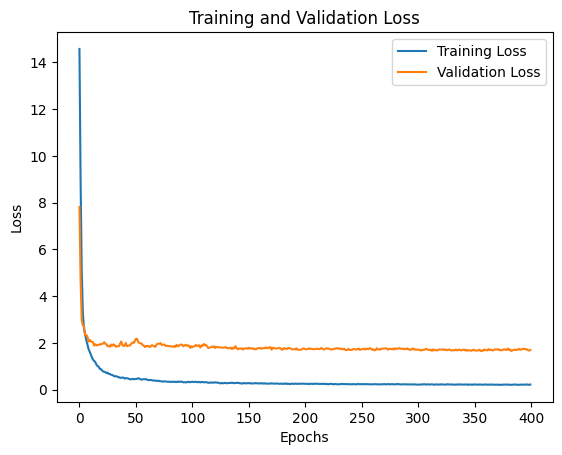

In [30]:
input_size = 352
hidden_sizes = [256, 128, 64]  # hidden layer sizes
output_size = 1

# Hyperparameters
learning_rate = 0.001
activation = 'relu'
dropout_rate = 0.2
kernel_regularizer = None  # l2(0.01)
batch_normalization = True  # Set to True to use Batch Normalization
loss = 'mse'  # Options: 'mse'
batch_size = 64 

set_seed()
# Build the model
model = build_model(input_size, hidden_sizes, output_size, learning_rate=learning_rate,
                    activation=activation, dropout_rate=dropout_rate,
                    kernel_regularizer=kernel_regularizer,
                    batch_normalization=batch_normalization,
                    optimizer=optimizer, loss=loss)

# Display model architecture
model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=150, verbose=1),  # Early stopping with patience of 5 epochs
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),  # Save best model weights
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, min_lr=1e-6, verbose=1)  # Reduce learning rate on plateau
]


# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=400,
                    validation_data=(X_val, y_val), callbacks=callbacks)

# Load the best weights
model.load_weights('best_model.keras')

# Evaluate the best model
print("Train Evaluation:")
train_loss = model.evaluate(X_train, y_train)
print("Test Evaluation:")
test_loss = model.evaluate(X_test, y_test)
print("Validation Evaluation:")
val_loss = model.evaluate(X_val, y_val)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │        90,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,377 (521.00 KB)

 Trainable params: 132,481 (517.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/400
23/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.0349 - mae: 3.5225 

W0000 00:00:1718593854.835156     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 23.7701 - mae: 3.5062
Epoch 1: val_loss improved from inf to 14.38758, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 23.7410 - mae: 3.5043 - val_loss: 14.3876 - val_mae: 2.2141 - learning_rate: 0.0010
Epoch 2/400
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7361 - mae: 3.1637 
Epoch 2: val_loss improved from 14.38758 to 12.53391, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.5250 - mae: 3.1401 - val_loss: 12.5339 - val_mae: 2.1430 - learning_rate: 0.0010
Epoch 3/400
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.5457 - mae: 2.6693 
Epoch 3: val_loss improved from 12.53391 to 10.19679, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.2650 - mae: 2.6259 - val_loss: 10.1968 - val_mae: 1.7685 - learning_rate: 0.0010
Epoch 4/400
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1720 - mae: 2.1427 
Epoch 4: val_loss improved from

W0000 00:00:1718593915.497011     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4533 - mae: 0.3890
Test Evaluation:
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7768 - mae: 0.9669
Validation Evaluation:
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0374 - mae: 0.9994


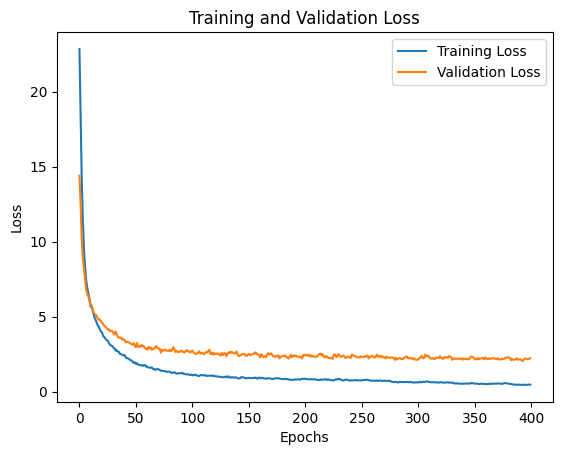

In [16]:

# Hyperparameters
learning_rate = 0.001
activation = 'relu'
dropout_rate = 0.2
kernel_regularizer = l2(0.01)  #l2(0.01)
batch_normalization = True  # Set to True to use Batch Normalization
loss = 'mse'  # Options: 'mse'
batch_size = 128
epochs = 400

set_seed()
# Build the model
model = build_model(input_size, hidden_sizes, output_size, learning_rate=learning_rate,
                    activation=activation, dropout_rate=dropout_rate,
                    kernel_regularizer=kernel_regularizer,
                    batch_normalization=batch_normalization,
                    optimizer=optimizer, loss=loss)

# Display model architecture
model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=150, verbose=1),  # Early stopping with patience of 5 epochs
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),  # Save best model weights
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, min_lr=1e-6, verbose=1)  # Reduce learning rate on plateau
]


# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val), callbacks=callbacks)

# Load the best weights
model.load_weights('best_model.keras')

# Evaluate the best model
print("Train Evaluation:")
train_loss = model.evaluate(X_train, y_train)
print("Test Evaluation:")
test_loss = model.evaluate(X_test, y_test)
print("Validation Evaluation:")
val_loss = model.evaluate(X_val, y_val)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │        90,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,553 (529.50 KB)

 Trainable params: 134,593 (525.75 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/400
19/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.4986 - mae: 3.5441 

W0000 00:00:1718594293.411430     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 20.3626 - mae: 3.5354
Epoch 1: val_loss improved from inf to 19.82384, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - loss: 20.3488 - mae: 3.5341 - val_loss: 19.8238 - val_mae: 3.5529 - learning_rate: 0.0010
Epoch 2/400
20/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.7874 - mae: 3.2721 
Epoch 2: val_loss improved from 19.82384 to 16.58225, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6370 - mae: 3.2614 - val_loss: 16.5823 - val_mae: 3.1833 - learning_rate: 0.0010
Epoch 3/400
20/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.2174 - mae: 2.9881 
Epoch 3: val_loss improved from 16.58225 to 13.27212, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9871 - mae: 2.9554 - val_loss: 13.2721 - val_mae: 2.7603 - learning_rate: 0.0010
Epoch 4/400
21/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.1397 - mae: 2.5475 
Epoch 4: val_loss improved from

W0000 00:00:1718594362.690955     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4592 - mae: 0.3989
Test Evaluation:
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7080 - mae: 0.9582
Validation Evaluation:
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8618 - mae: 0.9754


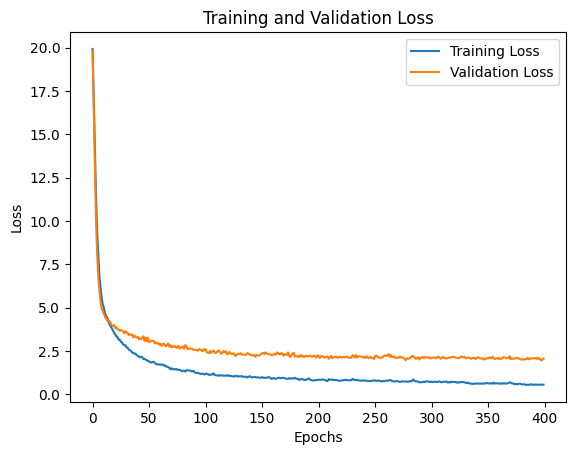

In [17]:
input_size = 352
hidden_sizes = [256, 128, 64, 32]  # Example hidden layer sizes
output_size = 1

# Hyperparameters
learning_rate = 0.001
activation = 'relu'
dropout_rate = 0.2
kernel_regularizer = l2(0.005)
batch_normalization = True
loss = 'mse'
batch_size = 128
epochs = 400

set_seed()
# Build the model
model = build_model(input_size, hidden_sizes, output_size, learning_rate=learning_rate,
                    activation=activation, dropout_rate=dropout_rate,
                    kernel_regularizer=kernel_regularizer,
                    batch_normalization=batch_normalization,
                    optimizer=optimizer, loss=loss)

# Display model architecture
model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=150, verbose=1),  # Early stopping with patience of 150 epochs
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),  # Save best model weights
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, min_lr=1e-6, verbose=1)  # Reduce learning rate on plateau
]


# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val), callbacks=callbacks)

# Load the best weights
model.load_weights('best_model.keras')

# Evaluate the best model
print("Train Evaluation:")
train_loss = model.evaluate(X_train, y_train)
print("Test Evaluation:")
test_loss = model.evaluate(X_test, y_test)
print("Validation Evaluation:")
val_loss = model.evaluate(X_val, y_val)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/600


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.1525 - mae: 3.5370

W0000 00:00:1718595255.348421     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 16.9404 - mae: 3.5160
Epoch 1: val_loss improved from inf to 10.92678, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 16.9251 - mae: 3.5144 - val_loss: 10.9268 - val_mae: 2.7957 - learning_rate: 0.0010
Epoch 2/600
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9174 - mae: 3.0775
Epoch 2: val_loss improved from 10.92678 to 9.01727, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.7777 - mae: 3.0554 - val_loss: 9.0173 - val_mae: 2.5390 - learning_rate: 0.0010
Epoch 3/600
50/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1477 - mae: 2.4942
Epoch 3: val_loss improved from 9.01727 to 5.09401, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9823 - mae: 2.4657 - val_loss: 5.0940 - val_mae: 1.8042 - learning_rate: 0.0010
Epoch 4/600
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1352 - mae: 1.9499
Epoch 4: val_loss improved from 5.09401 to 3

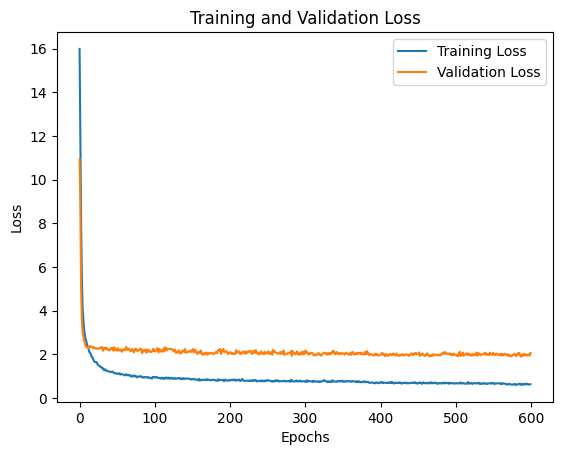

In [24]:
# Adjusting hyperparameters for further experimentation
hidden_sizes = [128, 64, 32]
kernel_regularizer = l2(0.001)
dropout_rate = 0.3

model = build_model(input_size, hidden_sizes, output_size,
                    learning_rate=learning_rate, activation=activation,
                    dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer,
                    batch_normalization=batch_normalization, optimizer=optimizer, loss=loss)

epochs = 600
callbacks = [
    EarlyStopping(monitor='val_loss', patience=200, verbose=1),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=100, min_lr=1e-6, verbose=1)
]

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate the best model
model.load_weights('best_model.keras')
print("Train Evaluation:")
train_loss = model.evaluate(X_train, y_train)
print("Test Evaluation:")
test_loss = model.evaluate(X_test, y_test)
print("Validation Evaluation:")
val_loss = model.evaluate(X_val, y_val)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/600


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.6349 - mae: 3.6350 

W0000 00:00:1718595756.058764     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 17.5053 - mae: 3.6214
Epoch 1: val_loss improved from inf to 10.55284, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 17.4913 - mae: 3.6199 - val_loss: 10.5528 - val_mae: 2.7827 - learning_rate: 0.0010
Epoch 2/600
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.5482 - mae: 3.3278 
Epoch 2: val_loss did not improve from 10.55284
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.5298 - mae: 3.3209 - val_loss: 10.5837 - val_mae: 2.8179 - learning_rate: 0.0010
Epoch 3/600
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.8852 - mae: 3.1127 
Epoch 3: val_loss improved from 10.55284 to 9.76761, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.8265 - mae: 3.1042 - val_loss: 9.7676 - val_mae: 2.7135 - learning_rate: 0.0010
Epoch 4/600
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8540 - mae: 2.8164 
Epoch 4: val_loss improved from 9.76761 to 7.53316, saving model to best

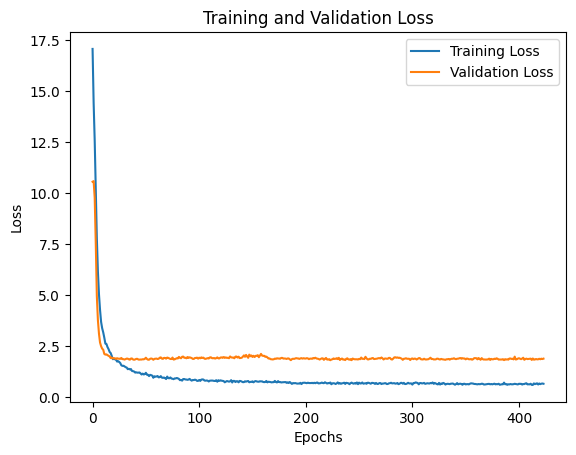

In [25]:
input_size = 352
hidden_sizes = [128, 64, 32]
output_size = 1

learning_rate = 0.001
activation = 'relu'
dropout_rate = 0.4
kernel_regularizer = l2(0.0001)
batch_normalization = True
optimizer = 'adam'
loss = 'mse'
batch_size = 128
epochs = 600


model = build_model(input_size, hidden_sizes, output_size,
                    learning_rate=learning_rate, activation=activation,
                    dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer,
                    batch_normalization=batch_normalization, optimizer=optimizer, loss=loss)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=200, verbose=1),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=100, min_lr=1e-6, verbose=1)
]

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate the best model
model.load_weights('best_model.keras')
print("Train Evaluation:")
train_loss = model.evaluate(X_train, y_train)
print("Test Evaluation:")
test_loss = model.evaluate(X_test, y_test)
print("Validation Evaluation:")
val_loss = model.evaluate(X_val, y_val)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/600


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.5283 - mae: 3.6472 

W0000 00:00:1718596760.828891     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 21.3810 - mae: 3.6373
Epoch 1: val_loss improved from inf to 14.40161, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 21.3657 - mae: 3.6360 - val_loss: 14.4016 - val_mae: 2.8333 - learning_rate: 0.0010
Epoch 2/600
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3765 - mae: 3.3636 
Epoch 2: val_loss improved from 14.40161 to 14.04417, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.3266 - mae: 3.3579 - val_loss: 14.0442 - val_mae: 2.8515 - learning_rate: 0.0010
Epoch 3/600
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.3985 - mae: 3.1509 
Epoch 3: val_loss improved from 14.04417 to 13.38868, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.3715 - mae: 3.1501 - val_loss: 13.3887 - val_mae: 2.8090 - learning_rate: 0.0010
Epoch 4/600
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8348 - mae: 2.9601 
Epoch 4: val_loss improved from

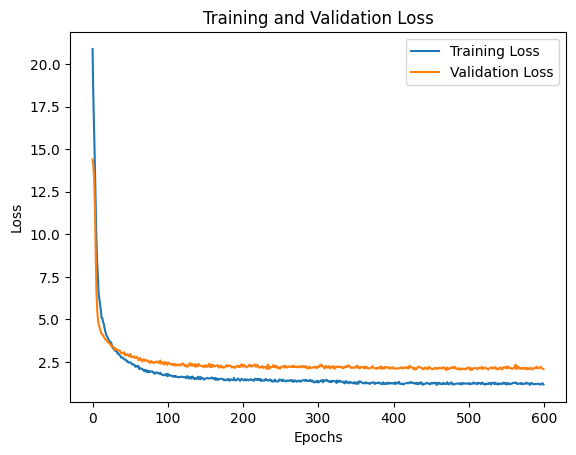

In [26]:

input_size = 352
hidden_sizes = [128, 64, 32]
output_size = 1

learning_rate = 0.001
activation = 'relu'
dropout_rate = 0.5  # Increased dropout rate
kernel_regularizer = l2(0.01)  # Increased regularization strength
batch_normalization = True
optimizer = 'adam'
loss = 'mse'
batch_size = 128
epochs = 600

model = build_model(input_size, hidden_sizes, output_size,
                    learning_rate=learning_rate, activation=activation,
                    dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer,
                    batch_normalization=batch_normalization, optimizer=optimizer, loss=loss)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=200, verbose=1),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=100, min_lr=1e-6, verbose=1)
]

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate the best model
model.load_weights('best_model.keras')
print("Train Evaluation:")
train_loss = model.evaluate(X_train, y_train)
print("Test Evaluation:")
test_loss = model.evaluate(X_test, y_test)
print("Validation Evaluation:")
val_loss = model.evaluate(X_val, y_val)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/600


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5195 - mae: 3.6469 

W0000 00:00:1718597290.477101     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 21.3810 - mae: 3.6373
Epoch 1: val_loss improved from inf to 14.40161, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 21.3657 - mae: 3.6360 - val_loss: 14.4016 - val_mae: 2.8333 - learning_rate: 0.0010
Epoch 2/600
23/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3817 - mae: 3.3640 
Epoch 2: val_loss improved from 14.40161 to 14.04417, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.3266 - mae: 3.3579 - val_loss: 14.0442 - val_mae: 2.8515 - learning_rate: 0.0010
Epoch 3/600
21/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.3987 - mae: 3.1496 
Epoch 3: val_loss improved from 14.04417 to 13.38868, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.3715 - mae: 3.1501 - val_loss: 13.3887 - val_mae: 2.8090 - learning_rate: 0.0010
Epoch 4/600
20/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.8960 - mae: 2.9686  
Epoch 4: val_loss improved fro

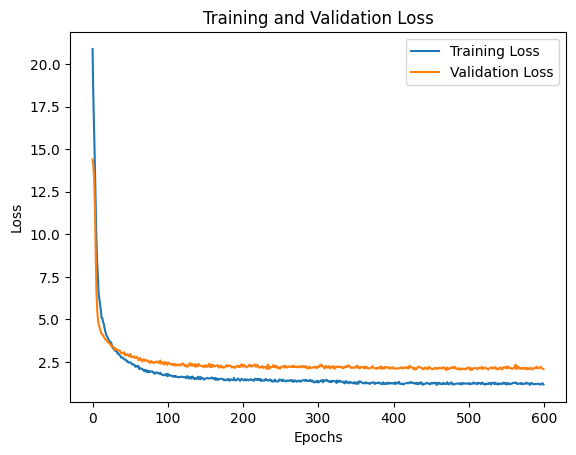

In [27]:
input_size = 352
hidden_sizes = [64, 32]  # Simplified model architecture
output_size = 1

learning_rate = 0.001
activation = 'relu'
dropout_rate = 0.3  # Fine-tuned dropout rate
kernel_regularizer = l2(0.01)  # Keep regularization strength high
batch_normalization = True
optimizer = 'adam'
loss = 'mse'
batch_size = 64  # Smaller batch size
epochs = 800

model = build_model(input_size, hidden_sizes, output_size,
                    learning_rate=learning_rate, activation=activation,
                    dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer,
                    batch_normalization=batch_normalization, optimizer=optimizer, loss=loss)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=200, verbose=1),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=100, min_lr=1e-6, verbose=1)
]

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate the best model
model.load_weights('best_model.keras')
print("Train Evaluation:")
train_loss = model.evaluate(X_train, y_train)
print("Test Evaluation:")
test_loss = model.evaluate(X_test, y_test)
print("Validation Evaluation:")
val_loss = model.evaluate(X_val, y_val)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
input_size = 352
hidden_sizes = [64, 32]  # Simplified model architecture
output_size = 1

learning_rate = 0.0001
activation = 'relu'
dropout_rate = 0.6  # Increased dropout rate
kernel_regularizer = l2(0.1)  # Increased regularization strength
batch_normalization = True
optimizer = 'adam'
loss = 'huber'  # Changed to Huber loss
batch_size = 64  # Smaller batch size
epochs = 800


model = build_model(input_size, hidden_sizes, output_size,
                    learning_rate=learning_rate, activation=activation,
                    dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer,
                    batch_normalization=batch_normalization, optimizer=optimizer, loss=loss)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=200, verbose=1),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=100, min_lr=1e-6, verbose=1)
]

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate the best model
model.load_weights('best_model.keras')
print("Train Evaluation:")
train_loss = model.evaluate(X_train, y_train)
print("Test Evaluation:")
test_loss = model.evaluate(X_test, y_test)
print("Validation Evaluation:")
val_loss = model.evaluate(X_val, y_val)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/800


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 19.9056 - mae: 3.6145
Epoch 1: val_loss improved from inf to 18.13339, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 19.8992 - mae: 3.6149 - val_loss: 18.1334 - val_mae: 3.1153 - learning_rate: 1.0000e-04
Epoch 2/800
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2537 - mae: 3.6167

W0000 00:00:1718598012.687628     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 2: val_loss improved from 18.13339 to 16.79536, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.2362 - mae: 3.6178 - val_loss: 16.7954 - val_mae: 3.3039 - learning_rate: 1.0000e-04
Epoch 3/800
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7312 - mae: 3.5900
Epoch 3: val_loss improved from 16.79536 to 15.50005, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.7259 - mae: 3.5901 - val_loss: 15.5000 - val_mae: 3.3679 - learning_rate: 1.0000e-04
Epoch 4/800
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.3543 - mae: 3.5304
Epoch 4: val_loss improved from 15.50005 to 14.29429, saving model to best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3495 - mae: 3.5305 - val_loss: 14.2943 - val_mae: 3.3788 - learning_rate: 1.0000e-04
Epoch 5/800
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.1236 - mae: 3.4772
Epoch 5: val_loss improved from 14.29429 to 13.19565, saving model to best_model.keras
61/

I also explored models that treat drug-related features and gene expression data separately from the rest of the features. The rationale behind this approach is to allow the model to learn more specialized weights for each type of feature, potentially improving its ability to capture distinct patterns and relationships within each dataset subset.

By processing drug-related features and gene expression data separately, the model can focus on the unique characteristics and dependencies within these subsets. This segregation can lead to more targeted feature representations and more effective learning of relevant information specific to each type of data.

The investigation involved designing separate branches or pathways within the neural network architecture for drug-related features, gene expression data, and other features. Each pathway could then have its own set of layers, activations, and regularization techniques tailored to the characteristics of its respective feature set.

This approach aims to optimize the model's performance by allowing it to extract and utilize the most pertinent information from each data subset independently. By enhancing the model's ability to discern and process diverse types of information effectively, it seeks to mitigate issues such as overfitting and improve overall predictive accuracy.

In [ ]:
def model_structure_3(num_layers_par, num_units_par, dropout_ratio_par, learning_rate_par, num_epochs, batch_size=32, patience=100):
    set_seed()
    
    tuner_dir = 'my_dir/kt'
    log_dir = 'my_dir/logs'
    os.makedirs(tuner_dir, exist_ok=True)
    os.makedirs(log_dir, exist_ok=True)
    
    model_checkpoint_path = os.path.join(log_dir, "best_model.h5")

    # Define the cosine decay schedule
    learning_rate_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=learning_rate_par[0],
        decay_steps=num_epochs * (len(X_train) // batch_size)
    )

    # Inputs
    drug_input = Input(shape=(111,))
    gene_input = Input(shape=(57,))
    general_input = Input(shape=(X_train.shape[1] - 111 - 57,))

    # Drug subnetwork
    drug_net = Dense(units=num_units_par[0], activation='relu')(drug_input)
    drug_net = BatchNormalization()(drug_net)
    drug_net = Dropout(dropout_ratio_par[0])(drug_net)
    for _ in range(num_layers_par[0] - 1):
        drug_net = Dense(units=num_units_par[0], activation='relu')(drug_net)
        drug_net = BatchNormalization()(drug_net)
        drug_net = Dropout(dropout_ratio_par[0])(drug_net)

    # Gene subnetwork
    gene_net = Dense(units=num_units_par[0], activation='relu')(gene_input)
    gene_net = BatchNormalization()(gene_net)
    gene_net = Dropout(dropout_ratio_par[0])(gene_net)
    for _ in range(num_layers_par[0] - 1):
        gene_net = Dense(units=num_units_par[0], activation='relu')(gene_net)
        gene_net = BatchNormalization()(gene_net)
        gene_net = Dropout(dropout_ratio_par[0])(gene_net)

    # General subnetwork
    general_net = Dense(units=num_units_par[0], activation='relu')(general_input)
    general_net = BatchNormalization()(general_net)
    general_net = Dropout(dropout_ratio_par[0])(general_net)
    for _ in range(num_layers_par[0] - 1):
        general_net = Dense(units=num_units_par[0], activation='relu')(general_net)
        general_net = BatchNormalization()(general_net)
        general_net = Dropout(dropout_ratio_par[0])(general_net)

    # Concatenate
    combined = Concatenate()([drug_net, gene_net, general_net])

    # Attention mechanism
    attention_output = Dense(num_units_par[0], activation='relu')(combined)
    attention_output = Attention()([combined, combined])
    attention_output = LayerNormalization()(attention_output)

    # Final layers after attention
    for _ in range(num_layers_par[0]):
        attention_output = Dense(units=num_units_par[0], activation='relu')(attention_output)
        attention_output = BatchNormalization()(attention_output)
        attention_output = Dropout(dropout_ratio_par[0])(attention_output)

    # Output layer
    output = Dense(1)(attention_output)

    # Compile model
    model = Model(inputs=[drug_input, gene_input, general_input], outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule), loss='mean_squared_error')

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(model_checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

    # Train the model
    history = model.fit([X_train[:, :111], X_train[:, 111:168], X_train[:, 168:]], y_train,
                        epochs=num_epochs, batch_size=batch_size, validation_data=([X_val[:, :111], X_val[:, 111:168], X_val[:, 168:]], y_val),
                        callbacks=[early_stopping, model_checkpoint])

    # Load the best weights
    model.load_weights(model_checkpoint_path)

    # Evaluate the model
    print("Train Evaluation:")
    train_loss = model.evaluate([X_train[:, :111], X_train[:, 111:168], X_train[:, 168:]], y_train)
    print("Test Evaluation:")
    test_loss = model.evaluate([X_test[:, :111], X_test[:, 111:168], X_test[:, 168:]], y_test)
    print("Validation Evaluation:")
    val_loss = model.evaluate([X_val[:, :111], X_val[:, 111:168], X_val[:, 168:]], y_val)

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    return history, None, model


Using fixed hyperparameters: num_layers=5, num_units=50, dropout=0.2, learning_rate=0.001
Epoch 1/400


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 15.5413

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Epoch 1: val_loss improved from inf to 10.54115, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 89s 349ms/step - loss: 15.5324 - val_loss: 10.5411
Epoch 2/400
121/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0799
Epoch 2: val_loss improved from 10.54115 to 8.22744, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11.0707 - val_loss: 8.2274
Epoch 3/400
117/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9520
Epoch 3: val_loss improved from 8.22744 to 6.90553, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.9476 - val_loss: 6.9055
Epoch 4/400
114/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8339
Epoch 4: val_loss improved from 6.90553 to 5.99038, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.8324 - val_loss: 5.9904
Epoch 5/400
118/122 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2062
Epoch 5: val_loss improved from 5

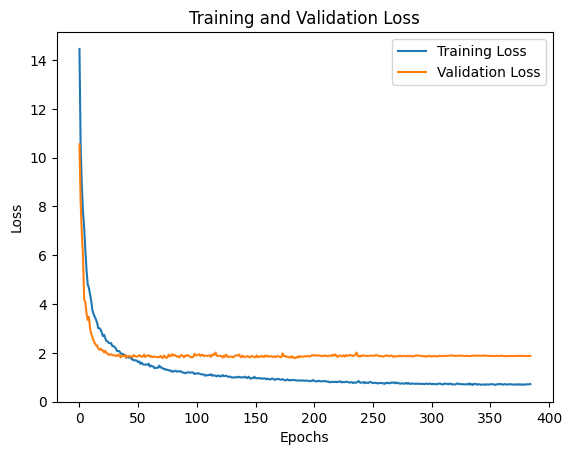

In [31]:
history, tuner, best_model = model_structure_3(num_layers_par=[5],
                                               num_units_par=[50],
                                               dropout_ratio_par=[0.2],
                                               learning_rate_par=[0.001],
                                               num_epochs=400,
                                               patience=200,
                                               batch_size=32)

Using fixed hyperparameters: num_layers=5, num_units=50, dropout=0.4, learning_rate=0.001
Epoch 1/400


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 16.8680

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Epoch 1: val_loss improved from inf to 11.02892, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 88s 305ms/step - loss: 16.8590 - val_loss: 11.0289
Epoch 2/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9042
Epoch 2: val_loss improved from 11.02892 to 9.30963, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 11.9022 - val_loss: 9.3096
Epoch 3/400
115/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8684
Epoch 3: val_loss improved from 9.30963 to 8.45034, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.8610 - val_loss: 8.4503
Epoch 4/400
121/122 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4285
Epoch 4: val_loss improved from 8.45034 to 8.37222, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.4284 - val_loss: 8.3722
Epoch 5/400
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9247
Epoch 5: val_loss did not impro

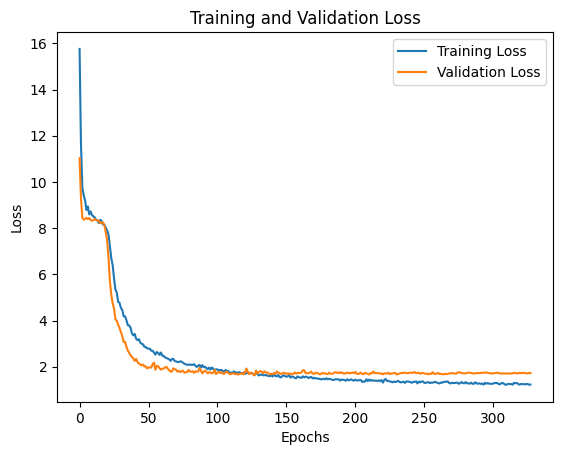

In [32]:
history, tuner, best_model = model_structure_3(num_layers_par=[5],
                                               num_units_par=[50],
                                               dropout_ratio_par=[0.4],
                                               learning_rate_par=[0.001],
                                               num_epochs=400,
                                               patience=200,
                                               batch_size=32)

Using fixed hyperparameters: num_layers=5, num_units=50, dropout=0.4, learning_rate=0.001
Epoch 1/400


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 16.8680

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Epoch 1: val_loss improved from inf to 11.02892, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 92s 349ms/step - loss: 16.8590 - val_loss: 11.0289
Epoch 2/400
120/122 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9084
Epoch 2: val_loss improved from 11.02892 to 9.30963, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 11.9022 - val_loss: 9.3096
Epoch 3/400
119/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8643
Epoch 3: val_loss improved from 9.30963 to 8.45034, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.8610 - val_loss: 8.4503
Epoch 4/400
118/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4290
Epoch 4: val_loss improved from 8.45034 to 8.37222, saving model to my_dir/logs/best_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.4284 - val_loss: 8.3722
Epoch 5/400
115/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9078
Epoch 5: val_loss did not impro

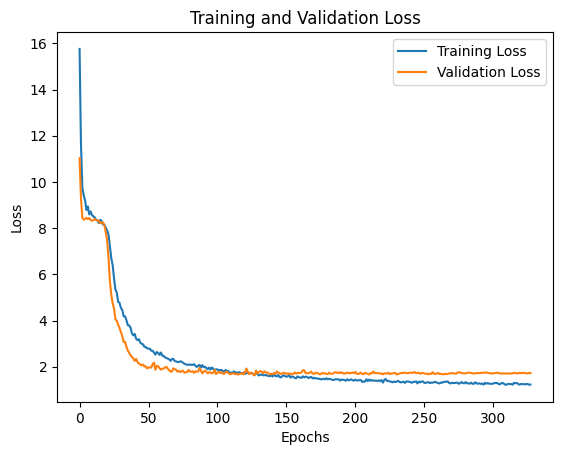

In [33]:
history, tuner, best_model = model_structure_3(num_layers_par=[5],
                                               num_units_par=[50],
                                               dropout_ratio_par=[0.4],
                                               learning_rate_par=[0.001],
                                               num_epochs=400,
                                               patience=200,
                                               batch_size=32)

Using fixed hyperparameters: num_layers=5, num_units=50, dropout=0.4, learning_rate=0.001
Epoch 1/400


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - loss: 17.8461

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Epoch 1: val_loss improved from inf to 12.74549, saving model to my_dir/logs/best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 90s 682ms/step - loss: 17.8335 - val_loss: 12.7455
Epoch 2/400
55/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.9873
Epoch 2: val_loss improved from 12.74549 to 10.75310, saving model to my_dir/logs/best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 13.9698 - val_loss: 10.7531
Epoch 3/400
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.3567
Epoch 3: val_loss improved from 10.75310 to 9.40852, saving model to my_dir/logs/best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 12.3283 - val_loss: 9.4085
Epoch 4/400
55/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8776
Epoch 4: val_loss improved from 9.40852 to 8.92613, saving model to my_dir/logs/best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 10.8955 - val_loss: 8.9261
Epoch 5/400
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9037
Epoch 5: val_loss improved from 8.92613 

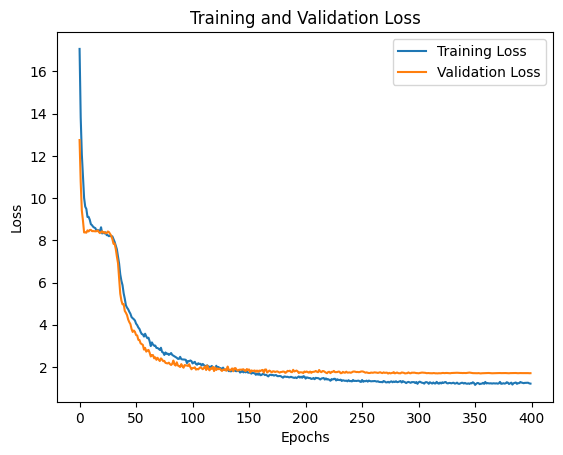

In [34]:
history, tuner, best_model = model_structure_3(num_layers_par=[5],
                                               num_units_par=[50],
                                               dropout_ratio_par=[0.4],
                                               learning_rate_par=[0.001],
                                               num_epochs=400,
                                               patience=200,
                                               batch_size=64)

Among all the models I experimented with, the best performance I achieved was using the initial model structure, which resulted in an MSE of 1.21.

# Summary

### Performance comparison

Of all the models compared, David's CNN model was the best performing with an MSE of 1.1598.
The study evaluated various models for predicting drug sensitivity using Mean Squared Error (MSE) and R² score metrics. The Random Forest model and an optimized Multi-Layer Perceptron (MLP) showed promising results, indicating the value of combining genetic and drug response data.

Key Results:
- **Optimized CNN**: MSE = 1.1598, R² = 0.8316, Mean Absolute Error = 0.8099
- **Optimized MLP**: MSE = 1.3339, R² = 0.8063
- **Random Forest**: MSE = 1.2844, R² = 0.8135
- **Multiple Linear Regression**: MSE = 1.3561, R² = 0.8031

The optimized CNN, with specific convolutional and dense layers detailed in the `build_large_cnn` function, performed the best in terms of R² score, followed by the Random Forest and optimized MLP models.

### Future work

This model can be extended to include other cancers.

# Acknowledgment
**We are deeply grateful to Dr. Zhang for their invaluable guidance, insightful feedback, and unwavering support throughout this project.**